In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import researchpy as rp
import numpy as np
from scipy import stats

datadf = pd.read_csv('data/visual-search-study-data-live-analyze.csv')
dataMetricsdf = pd.read_csv('data/metrics.csv')
list(datadf.columns) 



['uuid',
 'datestamp',
 'answer',
 'hadtarget',
 'timetaken',
 'targetmapurl',
 'searchmapurl',
 'entrymethod',
 'screentype',
 'mobile',
 'correct',
 'target',
 'distractor',
 'basemap',
 'color',
 'distractorlevel',
 'distractorcat',
 'distractorcat-nobm']

In [3]:
datadf1000 = datadf.loc[datadf['timetaken'] >= 5000]
len(datadf1000.index)


3046

In [4]:

datadf = datadf.loc[datadf['timetaken'] < 10000]
datadf = datadf.loc[datadf['timetaken'] > 250]
datadf = datadf.loc[datadf['uuid'] != '']
datadf['timetaken-log'] = np.log(datadf['timetaken'])
datadf['posthoccat'] = datadf['distractor'] + '-' + datadf['distractorlevel'] + '-' + datadf['color'] + '-' + datadf['target'].replace(' ' ,'_', regex=True)
datadf['posthoccat2'] = datadf['distractor'] + '-' + datadf['distractorlevel'] + '-' + datadf['color']
datadf['posthoccat3'] = datadf['distractor'] + '-' + datadf['color'] + '-' + datadf['target'].replace(' ' ,'_', regex=True)

dataMetricsdf['noplog'] = np.log(dataMetricsdf['number_of_patches'])
dataMetricsdf['contagionlog'] = np.log(dataMetricsdf['contagion'])
dataMetricsdf['shapeindexlog'] = np.log(dataMetricsdf['shape_index_mn'])
dataMetricsdf['fracdimlog'] = np.log(dataMetricsdf['fractal_dimension_mn'])
dataMetricsdf['ennlog'] = np.log(dataMetricsdf['euclidean_nearest_neighbor_mn'])
dataMetricsdf['patchensitylog'] = np.log(dataMetricsdf['patch_density'])
dataMetricsdf['areamnlog'] = np.log(dataMetricsdf['area_mn'])



datadf['grpcat'] = datadf['target'] + "-" + datadf['distractorcat'] 
datadf['category'] = datadf['distractorcat'] 


/Users/daveism/.pyenv/versions/3.8.6/lib/python3.8/site-packages/pandas/core/arraylike.py:274: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [5]:

# datadf = datadf.join(dataMetricsdf, lsuffix='', rsuffix='', how='left', on='distractorcat')
datadf =  pd.merge(datadf, dataMetricsdf, on="distractorcat", how="left")

datadf.to_csv('data/merged.csv')
# datadfm = datadf.loc[datadf['contagionlog'] < 0]
# datadfm['contagion']
# datadfm = datadf
list(datadf.columns) 


['uuid',
 'datestamp',
 'answer',
 'hadtarget',
 'timetaken',
 'targetmapurl',
 'searchmapurl',
 'entrymethod',
 'screentype',
 'mobile',
 'correct',
 'target',
 'distractor',
 'basemap',
 'color',
 'distractorlevel',
 'distractorcat',
 'distractorcat-nobm',
 'timetaken-log',
 'posthoccat',
 'posthoccat2',
 'posthoccat3',
 'grpcat',
 'category',
 'ignore',
 'total_area',
 'number_of_patches',
 'patch_density',
 'effective_mesh_size',
 'contagion',
 'area_mn',
 'perimeter_mn',
 'perimeter_area_ratio_mn',
 'shape_index_mn',
 'fractal_dimension_mn',
 'euclidean_nearest_neighbor_mn',
 'file',
 'start',
 'finish',
 'targetmet',
 'distractormet',
 'basemapmet',
 'colormet',
 'distractorlevelmet',
 'noplog',
 'contagionlog',
 'shapeindexlog',
 'fracdimlog',
 'ennlog',
 'patchensitylog',
 'areamnlog']

In [6]:
grouped_single = datadf.groupby(['uuid','category']).agg({'timetaken': ['mean'],'correct': ['mean']})
grouped_single.columns = ['timetaken_mean', 'correct_mean']

grouped_single = grouped_single.reset_index()
grouped_single

uuid  \
0      1004337241-690709208-855920406-2006280917   
1      1004337241-690709208-855920406-2006280917   
2      1004337241-690709208-855920406-2006280917   
3      1004337241-690709208-855920406-2006280917   
4      1004337241-690709208-855920406-2006280917   
...                                          ...   
33722    9966039-1697949675-976543735-1409477400   
33723    9966039-1697949675-976543735-1409477400   
33724    9966039-1697949675-976543735-1409477400   
33725    9966039-1697949675-976543735-1409477400   
33726    9966039-1697949675-976543735-1409477400   

                                 category  timetaken_mean  correct_mean  
0         clustered-blue-large rough-dark     1484.000000           1.0  
1      clustered-blue-large rough-imagery     1320.000000           1.0  
2         clustered-blue-large rough-none     1214.000000           1.0  
3      clustered-blue-large rough-streets     1513.250000           1.0  
4        clustered-blue-large smooth-dark     1124.000000           1.0  
...                                   ...             ...           ...  
33722              random-red-low-streets      955.333333           1.0  
33723              random-red-medium-dark      608.750000           1.0  
33724           random-red-medium-imagery      750.000000           1.0  
33725              random-red-medium-none      611.000000           1.0  
33726           random-red-medium-streets      795.000000           1.0  

[33727 rows x 4 columns]

In [154]:
# randomdf = datadf.loc[(datadf['distractor'] == 'no distractor') | (datadf['distractor'] == 'random')]
# randomdf = randomdf.loc[datadf['color'] == 'blue']
# randomdf = randomdf.loc[datadf['basemap'] == 'none']

randomdf = datadf[(datadf['distractor'] == 'random')]
#                   & (datadf['color'] == 'blue')]
#                   & (datadf['basemap'] == 'none')]
#                  & (datadf['target'] == 'gestalt')]

# grouped_single = randomdf.groupby(['uuid','number_of_patches']).agg({'timetaken': ['mean'],'correct': ['mean']})
grouped_single = datadf.groupby(['contagionlog', 'target','distractor']).agg({'timetaken': ['mean'],'correct': ['mean']})
# grouped_single
# grouped_single.columns = ['timetaken_mean', 'correct_mean']
grouped_single = grouped_single.reset_index()
grouped_single.columns = ['contagionlog', 'target','distractor','timetaken_mean', 'correct_mean']
grouped_single

# # randomdfpv = pd.pivot_table(grouped_single, values=['timetaken_mean'], index=['uuid'], columns=['distractorcat'], aggfunc=np.mean)
# # randomdfpv = randomdfpv.rename_axis(None, axis=0)
# # randomdfpv.columns = randomdfpv.columns.get_level_values(1)
# # randomdfpv




contagionlog        target distractor  timetaken_mean  correct_mean
0       -7.377349       gestalt     random     1466.814634      0.917073
1       -7.377349     no target     random     1716.256281      0.974874
2        0.795067       gestalt     random     1420.113115      0.919672
3        0.795067  less gestalt     random     1596.563218      0.858785
4        0.795067     no target     random     1730.973466      0.960199
..            ...           ...        ...             ...           ...
312      4.506193  less gestalt     random     1169.024631      0.960591
313      4.506193     no target     random     1437.997423      0.987113
314      4.605170       gestalt     random     1136.520101      0.962312
315      4.605170  less gestalt     random     1876.929907      0.065421
316      4.605170     no target     random     1675.862520      0.929624

[317 rows x 5 columns]

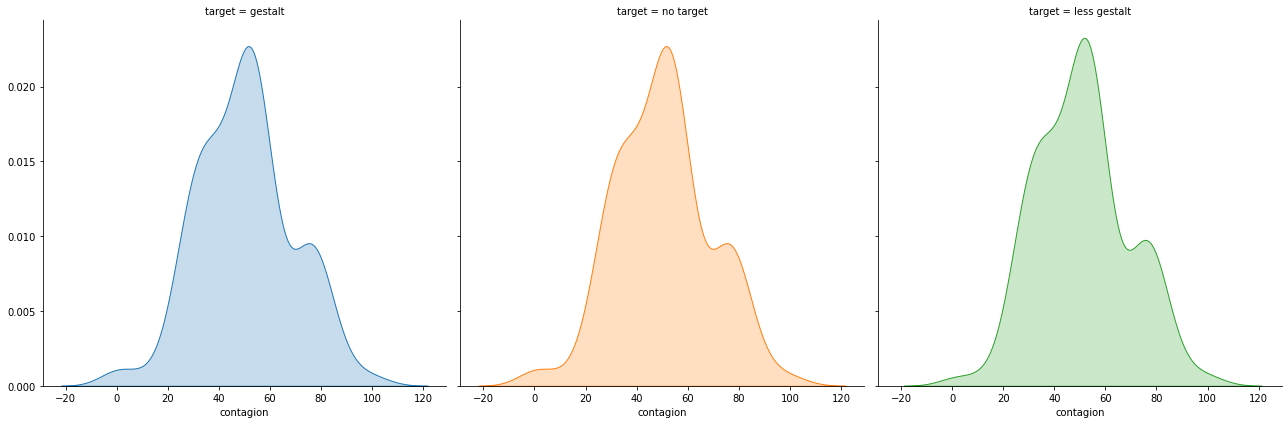

In [7]:
grouped_single = datadf.groupby(['contagion', 'target','distractor']).agg({'timetaken': ['mean'],'correct': ['mean']})
grouped_single = grouped_single.reset_index()
grouped_single.columns = ['contagion', 'target','distractor','timetaken_mean', 'correct_mean']
grouped_single

g = sns.FacetGrid(grouped_single, col="target", height=6, hue="target")
g.map(sns.kdeplot, "contagion",fill=True )



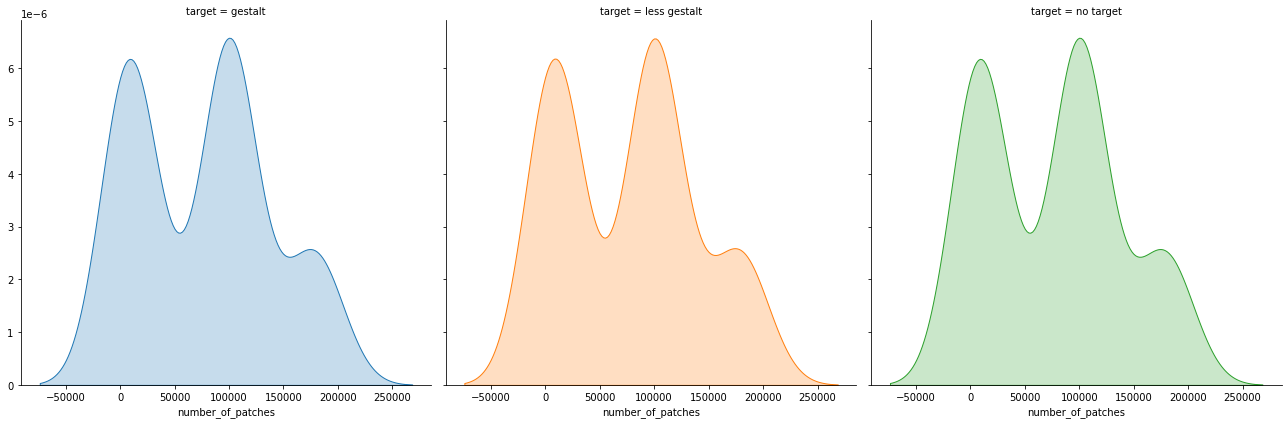

In [8]:
grouped_single = datadf.groupby(['number_of_patches', 'target','distractor']).agg({'timetaken': ['mean'],'correct': ['mean']})
grouped_single = grouped_single.reset_index()
grouped_single.columns = ['number_of_patches', 'target','distractor','timetaken_mean', 'correct_mean']
grouped_single

g = sns.FacetGrid(grouped_single, col="target", height=6, hue="target")
g.map(sns.kdeplot, "number_of_patches",fill=True )



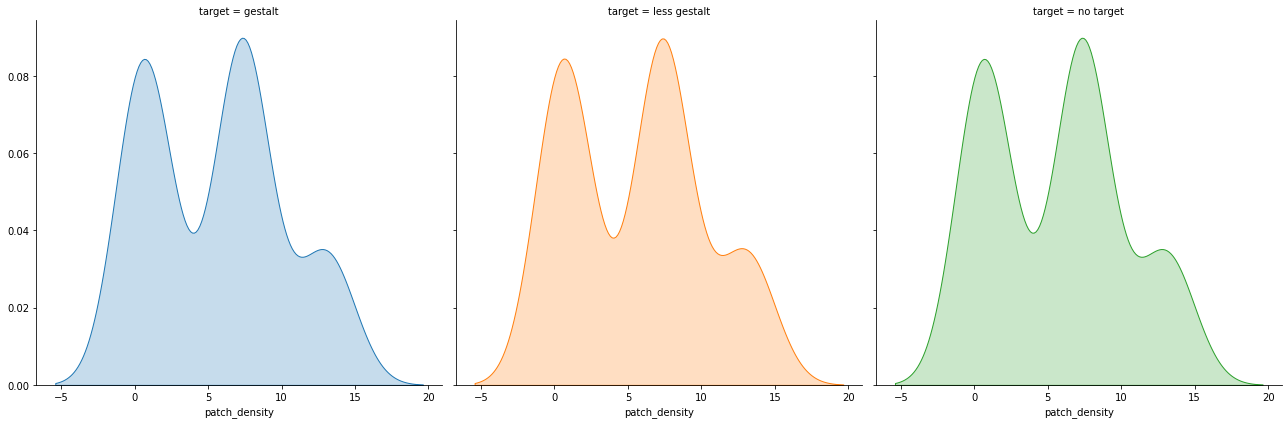

In [9]:
grouped_single = datadf.groupby(['patch_density', 'target','distractor']).agg({'timetaken': ['mean'],'correct': ['mean']})
grouped_single = grouped_single.reset_index()
grouped_single.columns = ['patch_density', 'target','distractor','timetaken_mean', 'correct_mean']
grouped_single

g = sns.FacetGrid(grouped_single, col="target", height=6, hue="target")
g.map(sns.kdeplot, "patch_density",fill=True )



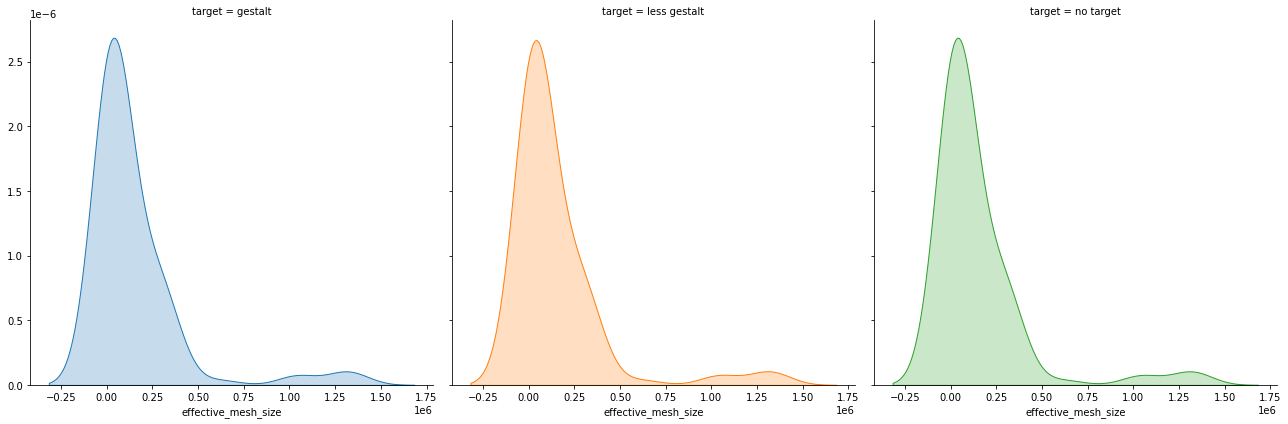

In [10]:
grouped_single = datadf.groupby(['effective_mesh_size', 'target','distractor']).agg({'timetaken': ['mean'],'correct': ['mean']})
grouped_single = grouped_single.reset_index()
grouped_single.columns = ['effective_mesh_size', 'target','distractor','timetaken_mean', 'correct_mean']
grouped_single

g = sns.FacetGrid(grouped_single, col="target", height=6, hue="target")
g.map(sns.kdeplot, "effective_mesh_size",fill=True )



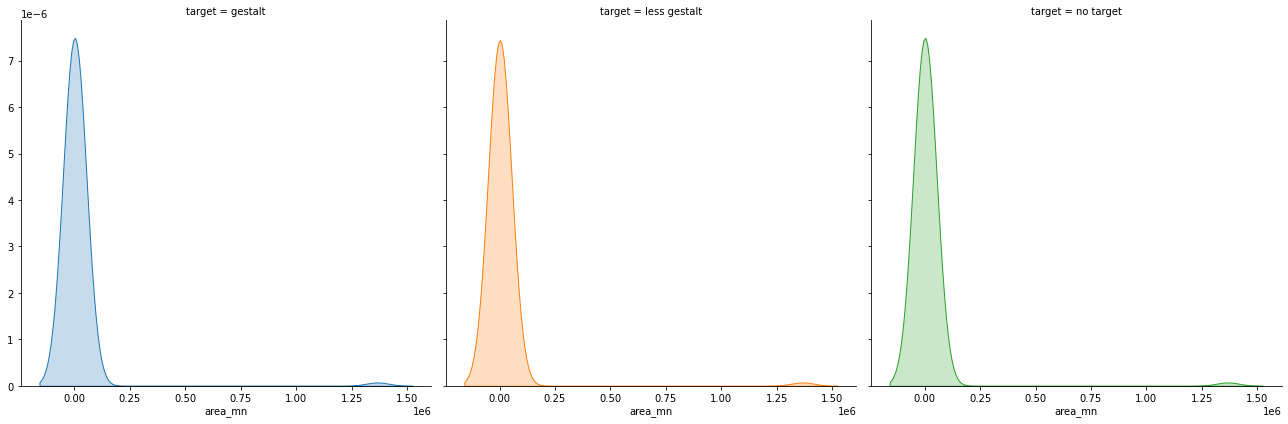

In [11]:
grouped_single = datadf.groupby(['area_mn', 'target','distractor']).agg({'timetaken': ['mean'],'correct': ['mean']})
grouped_single = grouped_single.reset_index()
grouped_single.columns = ['area_mn', 'target','distractor','timetaken_mean', 'correct_mean']
grouped_single

g = sns.FacetGrid(grouped_single, col="target", height=6, hue="target")
g.map(sns.kdeplot, "area_mn",fill=True )

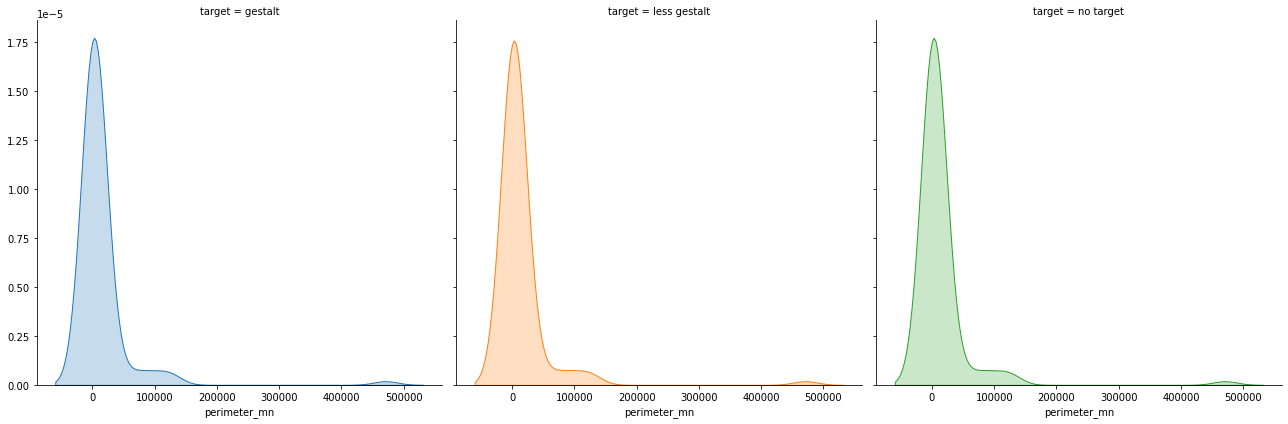

In [12]:
grouped_single = datadf.groupby(['perimeter_mn', 'target','distractor']).agg({'timetaken': ['mean'],'correct': ['mean']})
grouped_single = grouped_single.reset_index()
grouped_single.columns = ['perimeter_mn', 'target','distractor','timetaken_mean', 'correct_mean']
grouped_single

g = sns.FacetGrid(grouped_single, col="target", height=6, hue="target")
g.map(sns.kdeplot, "perimeter_mn",fill=True )


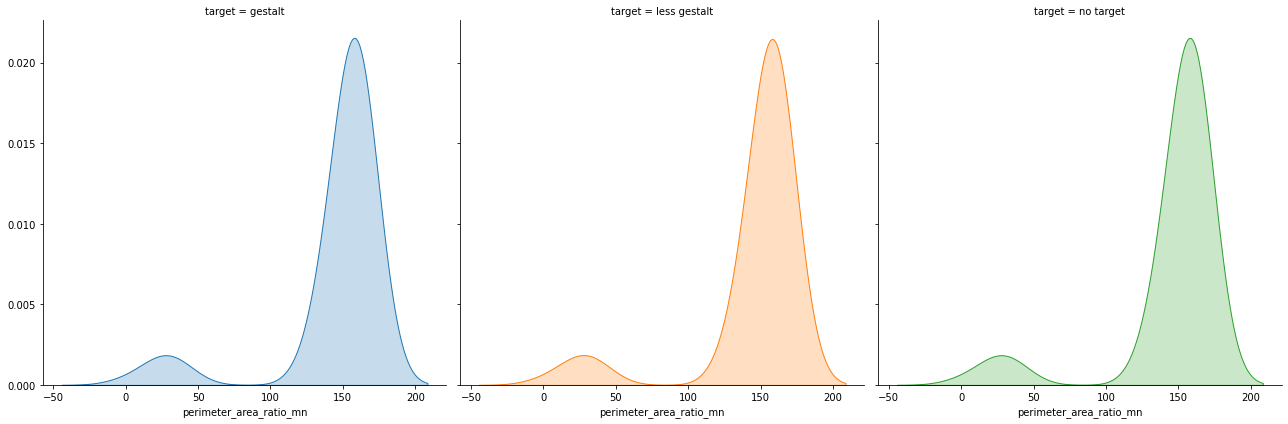

In [13]:
grouped_single = datadf.groupby(['perimeter_area_ratio_mn', 'target','distractor']).agg({'timetaken': ['mean'],'correct': ['mean']})
grouped_single = grouped_single.reset_index()
grouped_single.columns = ['perimeter_area_ratio_mn', 'target','distractor','timetaken_mean', 'correct_mean']
grouped_single

g = sns.FacetGrid(grouped_single, col="target", height=6, hue="target")
g.map(sns.kdeplot, "perimeter_area_ratio_mn",fill=True )


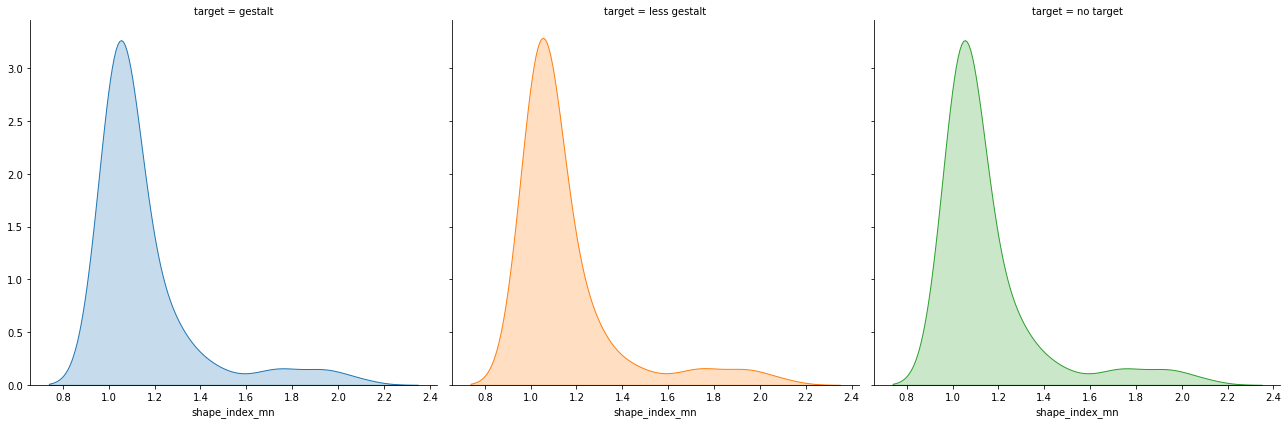

In [14]:
grouped_single = datadf.groupby(['shape_index_mn', 'target','distractor']).agg({'timetaken': ['mean'],'correct': ['mean']})
grouped_single = grouped_single.reset_index()
grouped_single.columns = ['shape_index_mn', 'target','distractor','timetaken_mean', 'correct_mean']
grouped_single

g = sns.FacetGrid(grouped_single, col="target", height=6, hue="target")
g.map(sns.kdeplot, "shape_index_mn",fill=True )


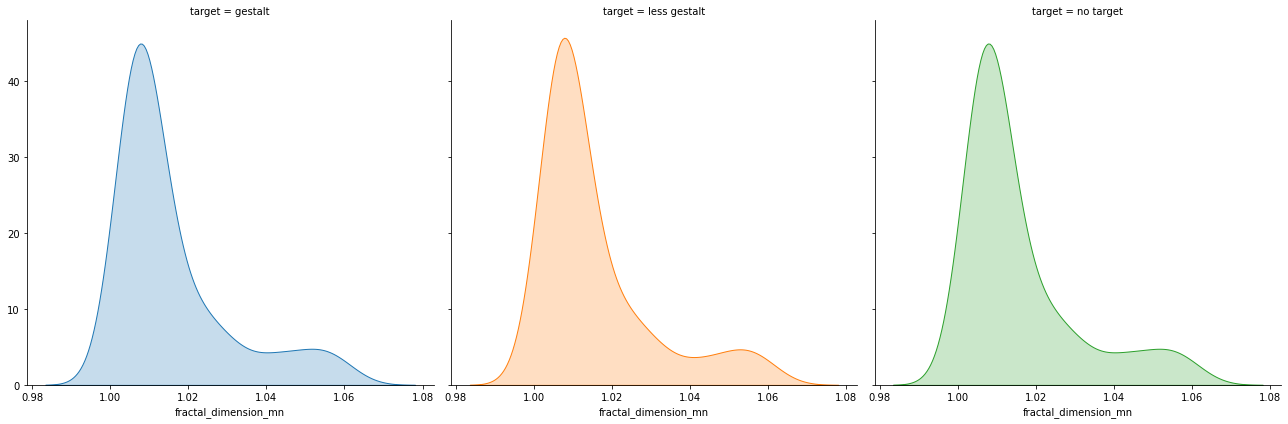

In [15]:
grouped_single = datadf.groupby(['fractal_dimension_mn', 'target','distractor']).agg({'timetaken': ['mean'],'correct': ['mean']})
grouped_single = grouped_single.reset_index()
grouped_single.columns = ['fractal_dimension_mn', 'target','distractor','timetaken_mean', 'correct_mean']
grouped_single

g = sns.FacetGrid(grouped_single, col="target", height=6, hue="target")
g.map(sns.kdeplot, "fractal_dimension_mn",fill=True )



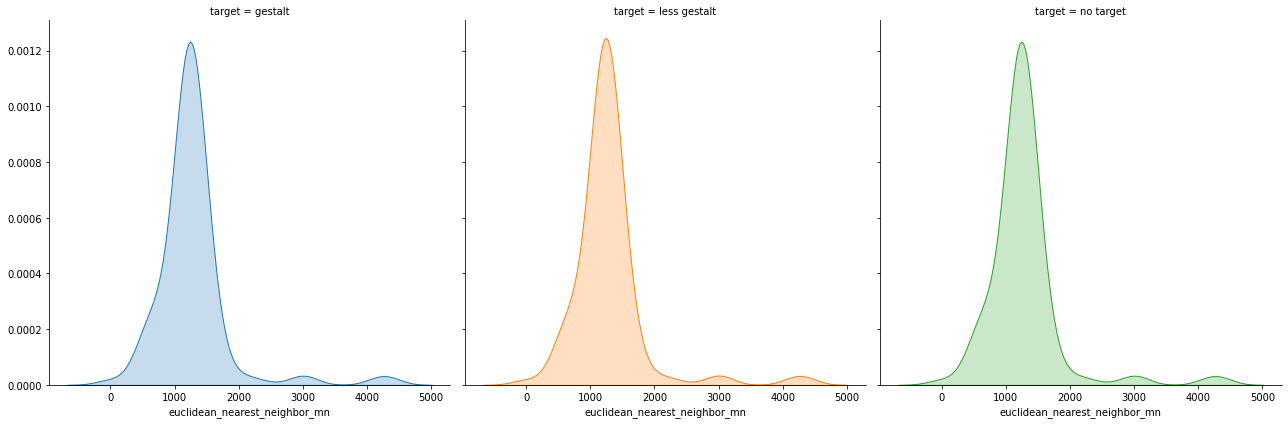

In [16]:
grouped_single = datadf.groupby(['euclidean_nearest_neighbor_mn', 'target','distractor']).agg({'timetaken': ['mean'],'correct': ['mean']})
grouped_single = grouped_single.reset_index()
grouped_single.columns = ['euclidean_nearest_neighbor_mn', 'target','distractor','timetaken_mean', 'correct_mean']
grouped_single

g = sns.FacetGrid(grouped_single, col="target", height=6, hue="target")
g.map(sns.kdeplot, "euclidean_nearest_neighbor_mn",fill=True )


<Figure size 1080x360 with 0 Axes>

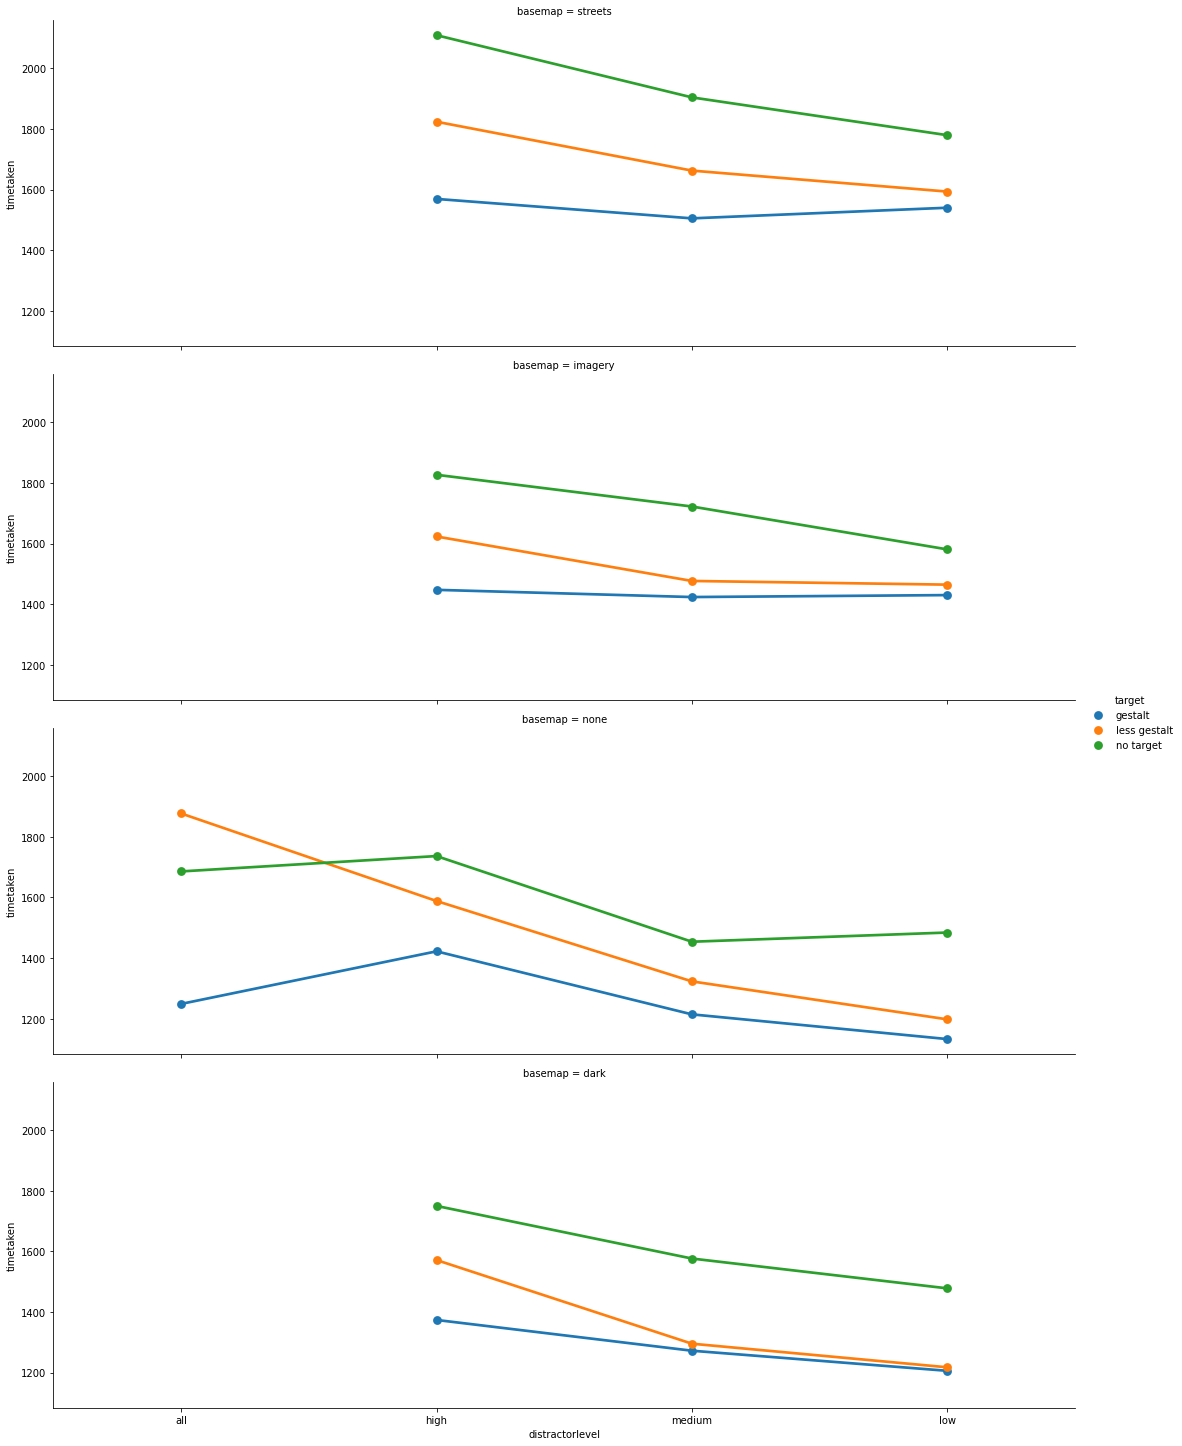

In [261]:
dflim = datadf.loc[datadf['distractor'] == 'random']

plt.figure(figsize=(15,5))
chart = sns.catplot(x="distractorlevel", y="timetaken", hue="target", row="basemap", data=dflim, kind="point",
                      hue_order=["gestalt","less gestalt","no target"],
                      order=["all","high","medium","low"],
                      ci=None,height=5, aspect=3)
#                      hue_order=["gestalt","less gestalt","no target"],
#                      hue_order=["all","high","medium","low"],
#                      markers=True, estimator='mean', ci=None, sort=True, data=dflim)
sns.reset_orig()



<Figure size 1080x360 with 0 Axes>

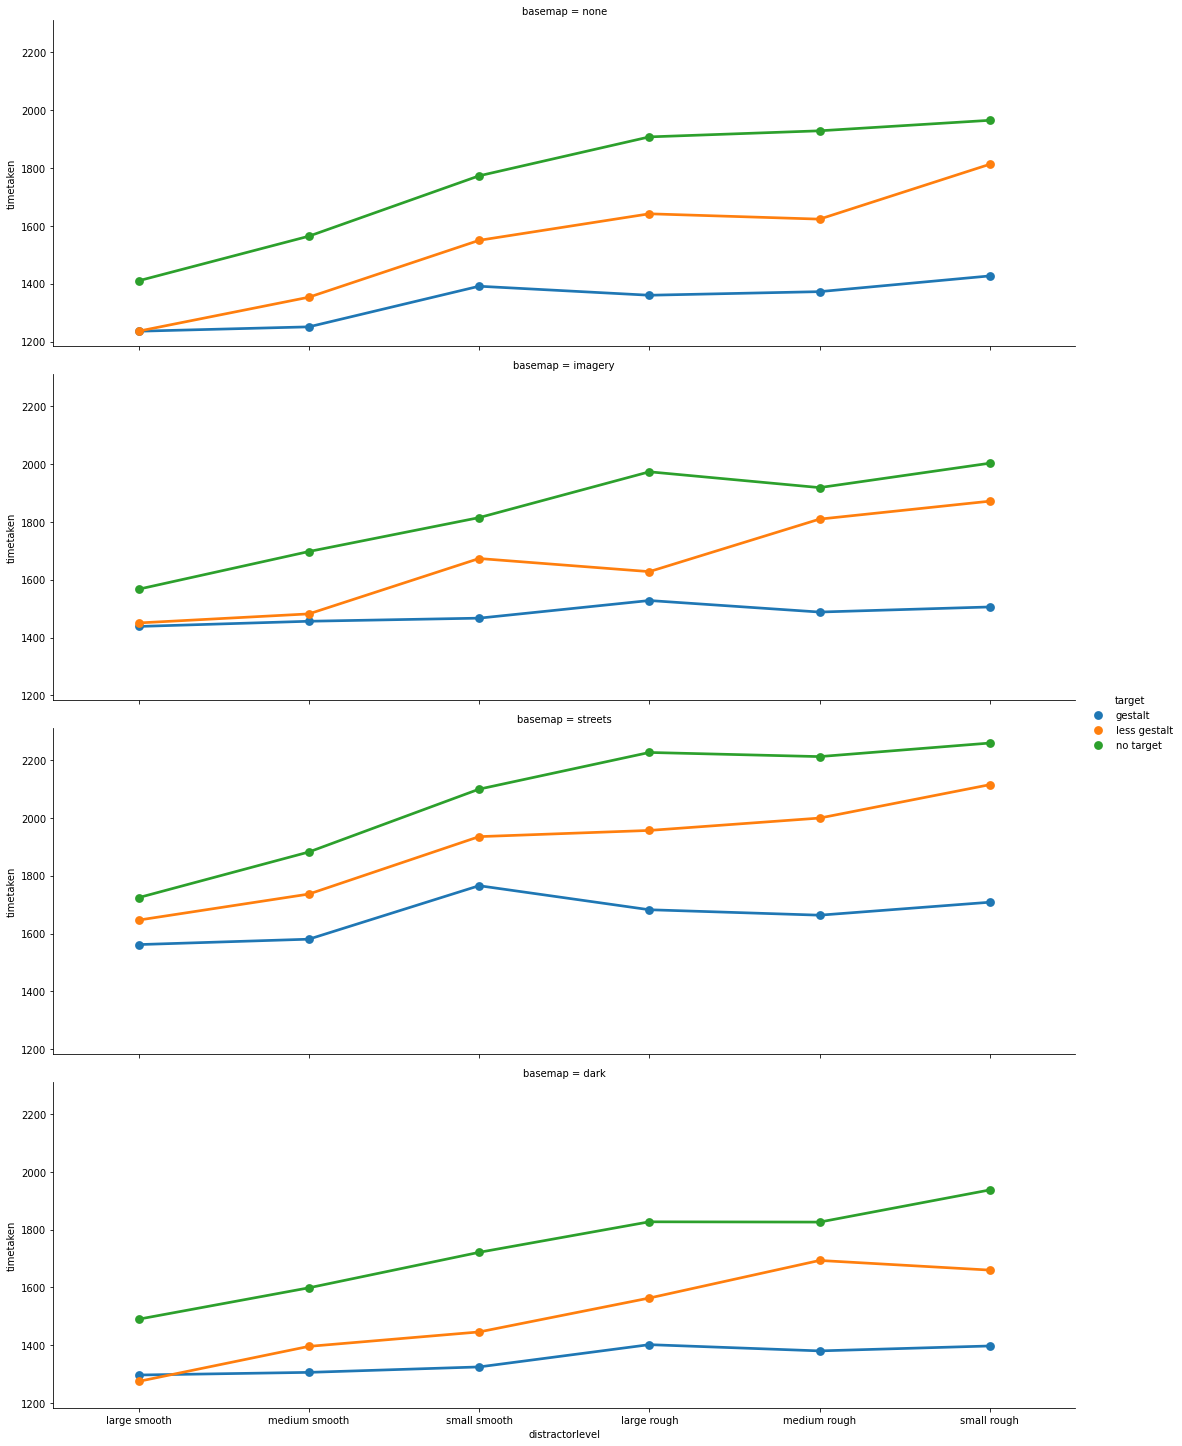

In [231]:
dflim = datadf.loc[datadf['distractor'] == 'clustered']
plt.figure(figsize=(15,5))
chart = sns.catplot(x="distractorlevel", y="timetaken", hue="target", data=dflim, row="basemap", kind="point",
                      hue_order=["gestalt","less gestalt","no target"],
                      order=["large smooth","medium smooth","small smooth","large rough","medium rough","small rough"],
                      ci=None,height=5, aspect=3)
#                      hue_order=["gestalt","less gestalt","no target"],
#                      hue_order=["all","high","medium","low"],
#                      markers=True, estimator='mean', ci=None, sort=True, data=dflim)
sns.reset_orig()


<Figure size 1080x360 with 0 Axes>

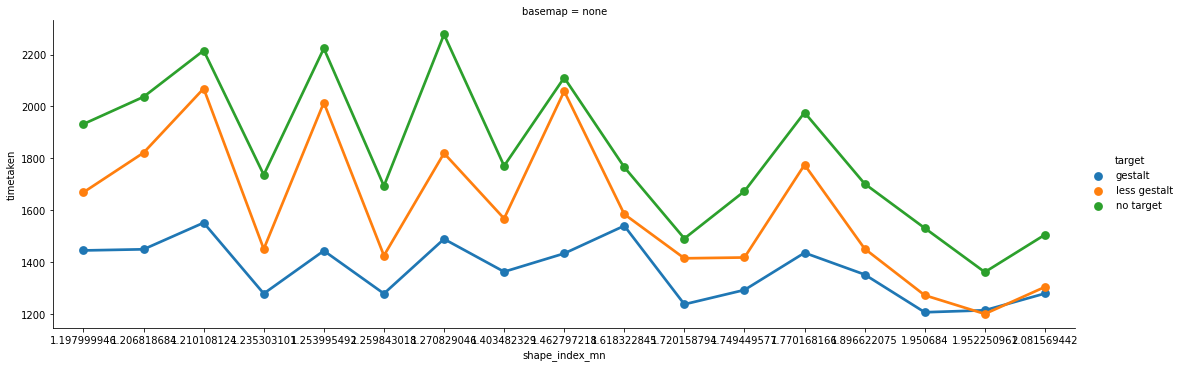

In [268]:
dflim = datadf.loc[datadf['distractor'] == 'clustered']
dflim = dflim.loc[dflim['basemap'] == 'none']

plt.figure(figsize=(15,5))
chart = sns.catplot(x="shape_index_mn", y="timetaken", hue="target", data=dflim, row="basemap", kind="point",
                      hue_order=["gestalt","less gestalt","no target"],
#                       order=["large smooth","medium smooth","small smooth","large rough","medium rough","small rough"],
                      ci=None,height=5, aspect=3)
#                      hue_order=["gestalt","less gestalt","no target"],
#                      hue_order=["all","high","medium","low"],
#                      markers=True, estimator='mean', ci=None, sort=True, data=dflim)
sns.reset_orig()


<Figure size 1080x360 with 0 Axes>

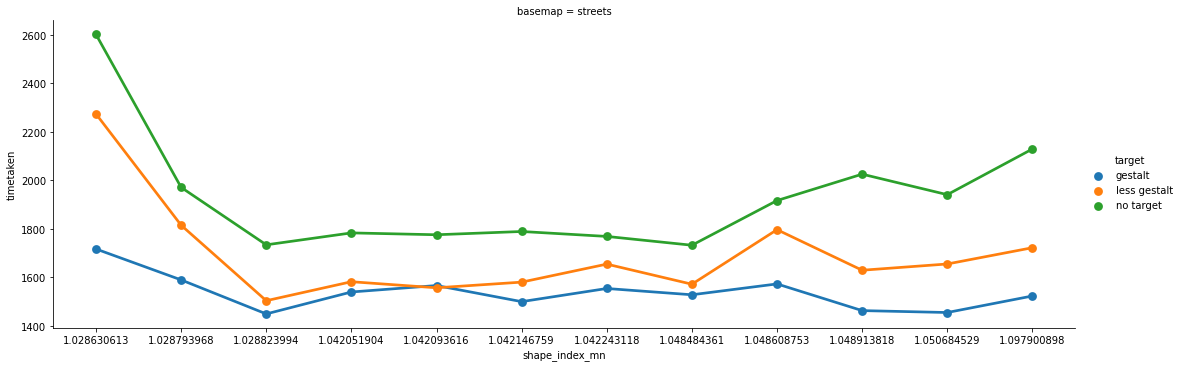

In [260]:
dflim = datadf.loc[datadf['distractor'] == 'random']
dflim = dflim.loc[dflim['basemap'] == 'streets']

plt.figure(figsize=(15,5))
chart = sns.catplot(x="shape_index_mn", y="timetaken", hue="target", data=dflim, row="basemap", kind="point",
                      hue_order=["gestalt","less gestalt","no target"],
#                       order=["large smooth","medium smooth","small smooth","large rough","medium rough","small rough"],
                      ci=None,height=5, aspect=3)
#                      hue_order=["gestalt","less gestalt","no target"],
#                      hue_order=["all","high","medium","low"],
#                      markers=True, estimator='mean', ci=None, sort=True, data=dflim)
sns.reset_orig()


<Figure size 1080x360 with 0 Axes>

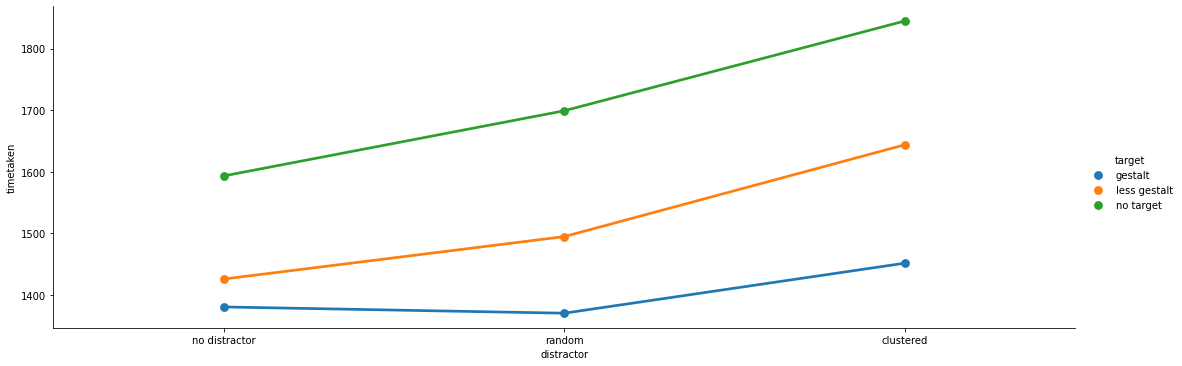

In [274]:
plt.figure(figsize=(15,5))
chart = sns.catplot(x="distractor", y="timetaken", hue="target", data=datadf, kind="point",
                      order=["no distractor","random","clustered"],
                      hue_order=["gestalt","less gestalt","no target"], ci=None, height=5, aspect=3)



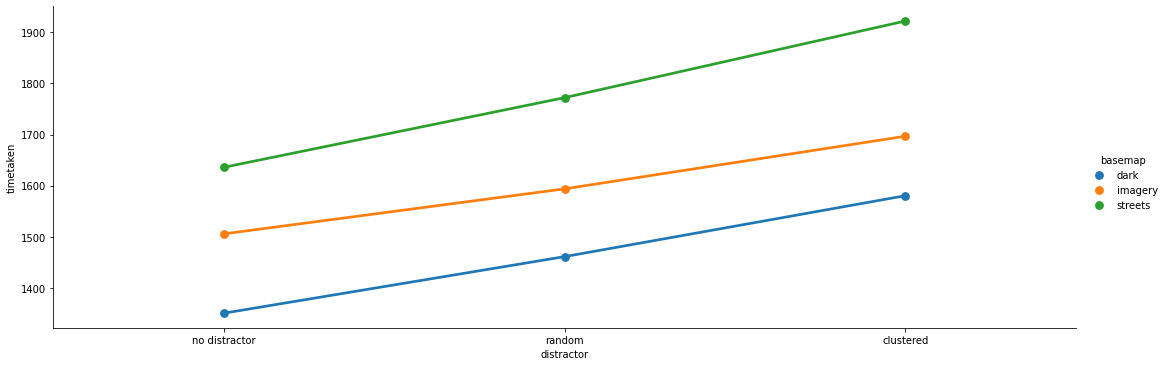

In [317]:
dflim = datadf.loc[datadf['basemap'] != 'none']

chart = sns.catplot(x="distractor", y="timetaken", hue="basemap", data=dflim, kind="point", 
                    order=["no distractor","random","clustered"],
                    hue_order=["dark","imagery","streets"],
                    ci=None, height=5, aspect=3)

<Figure size 1080x360 with 0 Axes>

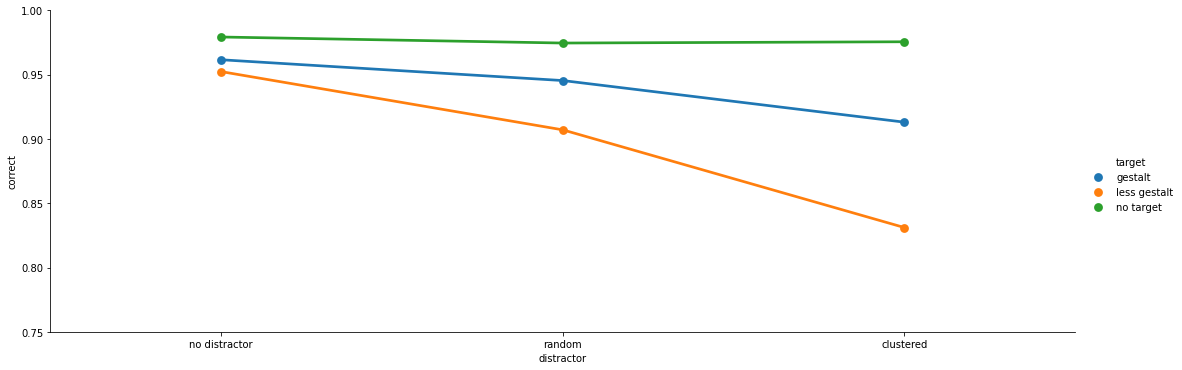

In [332]:
plt.figure(figsize=(15,5))
chart = sns.catplot(x="distractor", y="correct", hue="target", data=datadf, kind="point",
                      order=["no distractor","random","clustered"],
                      hue_order=["gestalt","less gestalt","no target"], ci=None, height=5, aspect=3)

chart.set(ylim=((.75, 1)))



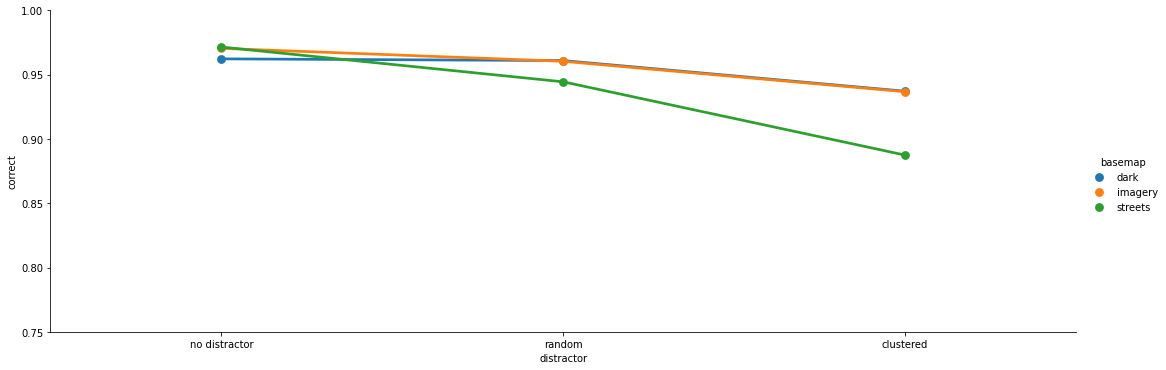

In [331]:
# grouped_single = datadf.groupby(['contagionlog', 'basemap','distractor']).agg({'timetaken': ['mean'],'correct': ['mean']})
# grouped_single = grouped_single.reset_index()
# grouped_single.columns = ['contagionlog', 'basemap','distractor','timetaken_mean', 'correct_mean']
# grouped_single

# sns.lineplot(x="distractor", y="correct_mean",
#              hue="basemap",
#              data=grouped_single)

dflim = datadf # datadf.loc[datadf['basemap'] != 'none']

chart = sns.catplot(x="distractor", y="correct", hue="basemap", data=dflim, kind="point", 
                    order=["no distractor","random","clustered"],
#                     hue_order=["none", "dark","imagery","streets"],
                    hue_order=["dark","imagery","streets"],
                    ci=None, height=5, aspect=3)
chart.set(ylim=((.75, 1)))



<AxesSubplot:xlabel='contagion', ylabel='timetaken'>

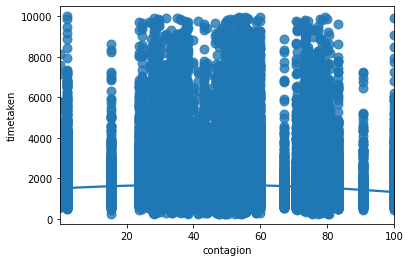

In [93]:
# sns.regplot(x="x", y="y", data=ans.loc[ans.dataset == "II"], scatter_kws={"s": 80}, order=2, ci=None)
sns.regplot(x="contagion", y="timetaken", data=datadf, scatter_kws={"s": 80}, order=2, ci=None)


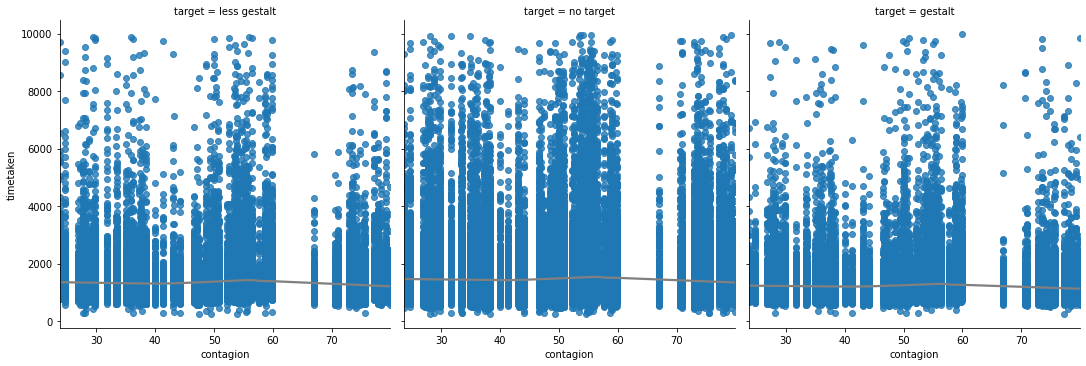

In [26]:
sns.reset_orig()
datadfLim = datadf.loc[datadf['contagion'] >= 20]
datadfLim = datadfLim.loc[datadf['contagion'] <= 80]
sns.lmplot(x="contagion", y="timetaken",col="target", lowess=True, data=datadfLim,  line_kws={"color": 'grey'})


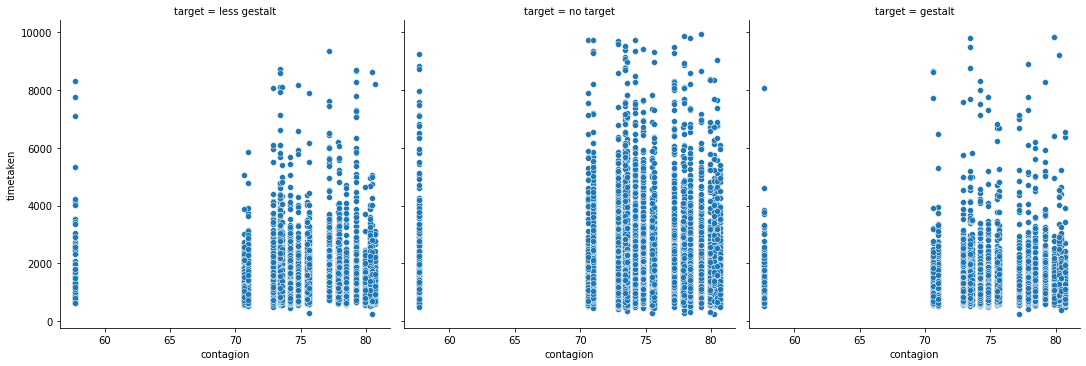

In [97]:
dflim = datadf.loc[datadf['basemap'] == 'dark']
sns.relplot(x="contagion", y="timetaken",col="target", data=dflim)


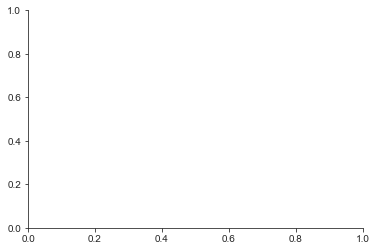

In [139]:
def kde_plot(df, conditions, dv, col_name, save_file=False):
    sns.set_style('white')
    sns.set_style('ticks')
    fig, ax = plt.subplots()

    for condition in conditions:
        condition_data = df[(df[col_name] == condition)][dv]
        sns.kdeplot(condition_data, shade=True, label=condition)
        
    sns.despine()
    
    if save_file:
        plt.savefig("kernel_density_estimate_seaborn_python_response"
                     "-time.png")
    plt.show()

# Plot the response time distributions by condition/groups:
kde_plot(datadf, ['contagion'], 'timetaken', 'distractor', save_file=False)


         gestalt  less gestalt        Diff      Average
0.1   993.674194   1023.961733   30.287539  1008.817963
0.2  1085.259498   1123.220939   37.961440  1104.240218
0.3  1165.007168   1211.216245   46.209077  1188.111707
0.4  1243.099642   1303.842599   60.742958  1273.471120
0.5  1324.646953   1403.111913   78.464960  1363.879433
0.6  1423.728315   1516.899639   93.171324  1470.313977
0.7  1541.409677   1671.512635  130.102958  1606.461156
0.8  1718.667384   1904.942960  186.275577  1811.805172
0.9  2058.802867   2370.116606  311.313739  2214.459737


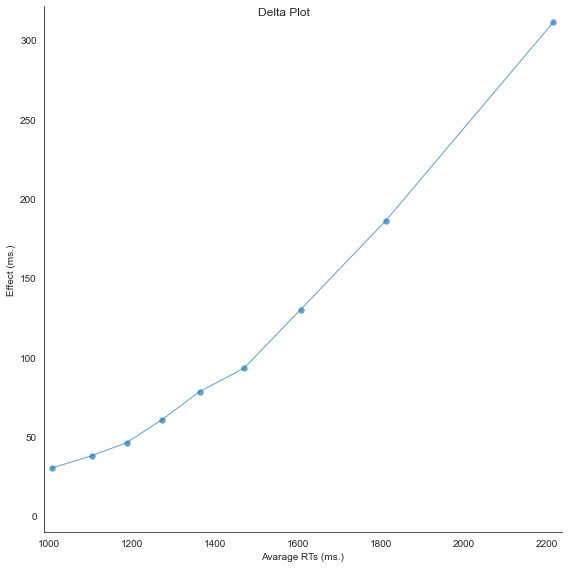

In [161]:
def calc_delta_data(df, subid, dv, condition, conditions=['incongruent',
                                                   'congruent']):
  
    subjects = pd.Series(df[subid].values.ravel()).unique().tolist()
    subjects.sort()

    deciles = np.arange(0.1, 1., 0.1)

    cond_one = conditions[0]
    cond_two = conditions[1]

    # Frame to store the data (per subject)
    arrays = [np.array([cond_one, cond_two]).repeat(len(deciles)),
              np.array(deciles).tolist() * 2]
    data_delta = pd.DataFrame(columns=subjects, index=arrays)

    for subject in subjects:

        sub_data_inc = df.loc[(df[subid] == subject) & (df[condition] ==
                                                        cond_one)]
        sub_data_con = df.loc[(df[subid] == subject) & (df[condition] ==
                                                        cond_two)]

        inc_q = sub_data_inc[dv].quantile(q=deciles).values
        con_q = sub_data_con[dv].quantile(q=deciles).values
        for i, dec in enumerate(deciles):
            data_delta.loc[(cond_one, dec)][subject] = inc_q[i]
            data_delta.loc[(cond_two, dec)][subject] = con_q[i]


    # Aggregate deciles
    data_delta = data_delta.mean(axis=1).unstack(level=0)
    # Calculate difference
    data_delta['Diff'] = data_delta[cond_one] - data_delta[cond_two]
    # Calculate average
    data_delta['Average'] = (data_delta[cond_one] + data_delta[cond_two]) / 2

    return data_delta

def delta_plot(delta_data, save_file=False):

    ymax = delta_data['Diff'].max() + 10
    ymin = -10
    xmin = delta_data['Average'].min() - 20
    xmax = delta_data['Average'].max() + 20
    
    sns.set_style('white')
    g = sns.FacetGrid(delta_data, ylim=(ymin, ymax), xlim=(xmin, xmax), height=8)
    g.map(plt.scatter, "Average", "Diff", s=50, alpha=.7, linewidth=1,
          edgecolor="white")
    g.map(plt.plot, "Average", "Diff", alpha=.7, linewidth=1)
    g.set_axis_labels("Avarage RTs (ms.)", "Effect (ms.)")
    g.fig.suptitle('Delta Plot')
    if save_file:
        g.savefig("delta_plot_seaborn_python_response-time.png")

    plt.show()

#     sns.plt.show()
    

# Calculate delta plot data and plot it
d_data = calc_delta_data(datadf, "uuid", "timetaken", "target", ['less gestalt', 'gestalt'])
print(d_data)
delta_plot(d_data)

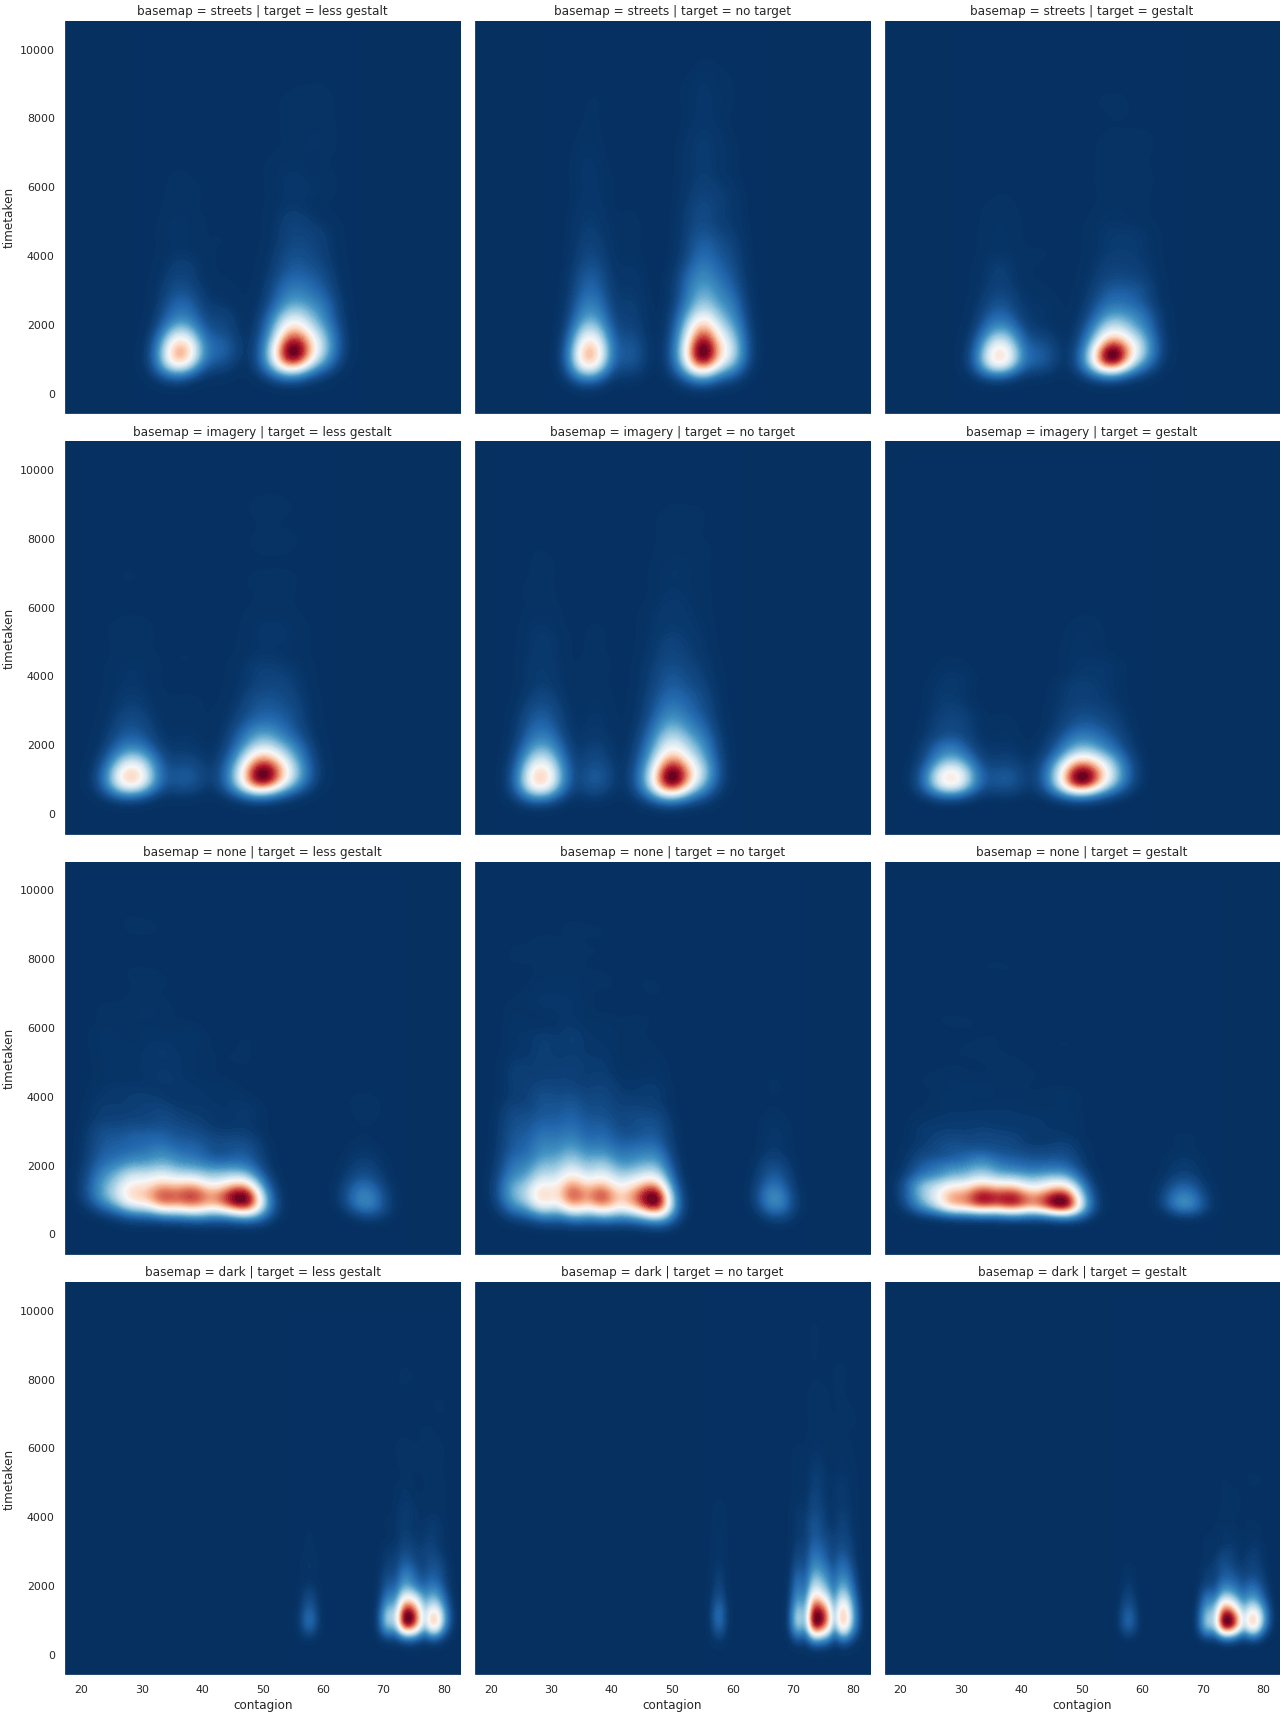

In [100]:
datadfLim = datadf.loc[datadf['contagion'] >= 20]
datadfLim = datadfLim.loc[datadf['contagion'] <= 80]


sns.reset_orig()
sns.set(rc={'axes.facecolor':'#053060', 'axes.grid' : False})
g = sns.FacetGrid(datadfLim, col="target", row="basemap", height=6)
g.map(sns.kdeplot, "contagion","timetaken", fill=True, thresh=0, levels=100, cmap="RdBu_r" )
sns.reset_orig()

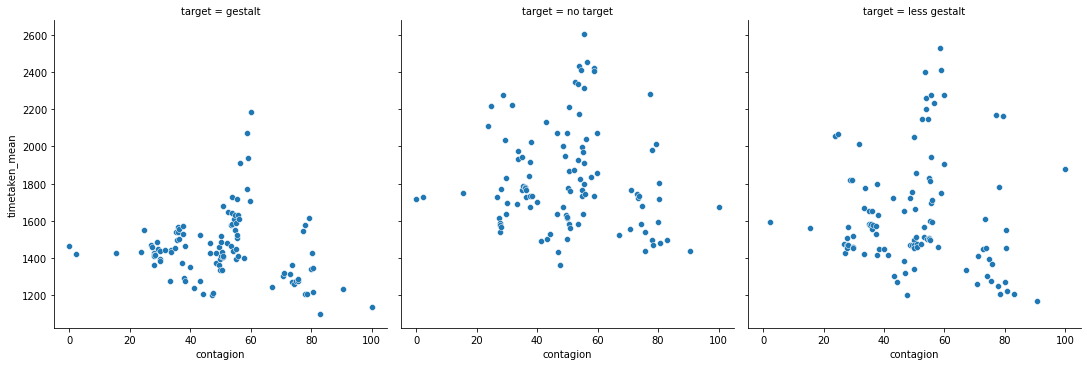

In [84]:
grouped_single = datadf.groupby(['contagion', 'target', 'basemap','distractor']).agg({'timetaken': ['mean'],'correct': ['mean']})
grouped_single = grouped_single.reset_index()
grouped_single.columns = ['contagion', 'target', 'basemap','distractor','timetaken_mean', 'correct_mean']
grouped_single_limited = grouped_single.loc[grouped_single['contagion'] > 0]

slope, intercept, r_value, p_value, std_err = stats.linregress(grouped_single_limited['contagion'],grouped_single_limited['timetaken_mean'])
# sns.lmplot(x="contagionlog", y="timetaken_mean",col="target", lowess=True, data=grouped_single_limited,  line_kws={"color": 'grey'})
sns.relplot(x="contagion", y="timetaken_mean",col="target", data=grouped_single_limited)




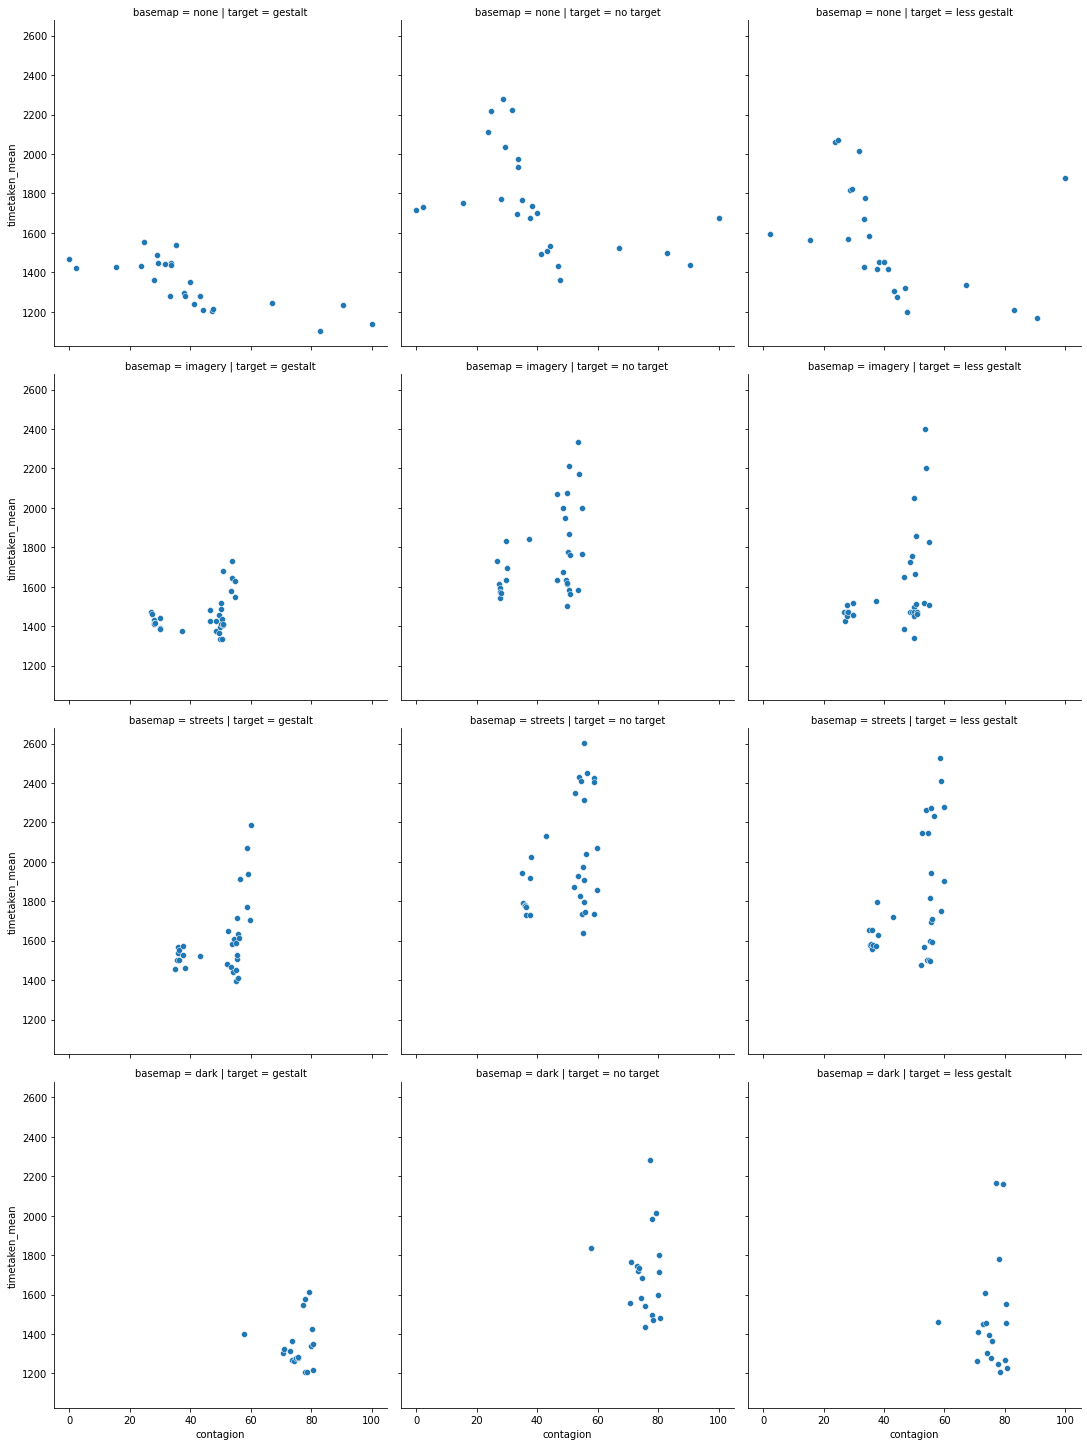

In [85]:
slope, intercept, r_value, p_value, std_err = stats.linregress(grouped_single_limited['contagion'],grouped_single_limited['timetaken_mean'])
# sns.lmplot(x="contagionlog", y="timetaken_mean",col="target", lowess=True, data=grouped_single_limited,  line_kws={"color": 'grey'})
sns.relplot(x="contagion", y="timetaken_mean",col="target", row="basemap", data=grouped_single_limited)


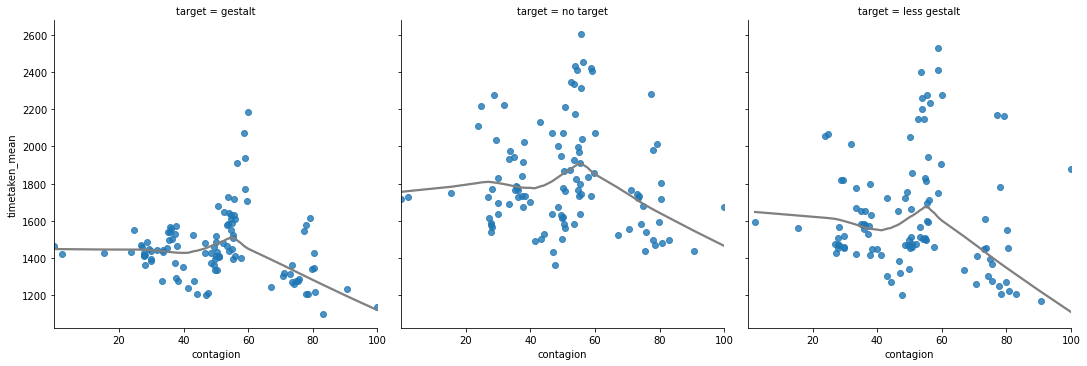

In [22]:
grouped_single = datadf.groupby(['contagion', 'target','basemap']).agg({'timetaken': ['mean'],'correct': ['mean']})
grouped_single = grouped_single.reset_index()
grouped_single.columns = ['contagion', 'target','basemap','timetaken_mean', 'correct_mean']

slope, intercept, r_value, p_value, std_err = stats.linregress(grouped_single['contagion'],grouped_single['timetaken_mean'])
sns.lmplot(x="contagion", y="timetaken_mean",col="target", lowess=True, data=grouped_single,  line_kws={"color": 'grey'})



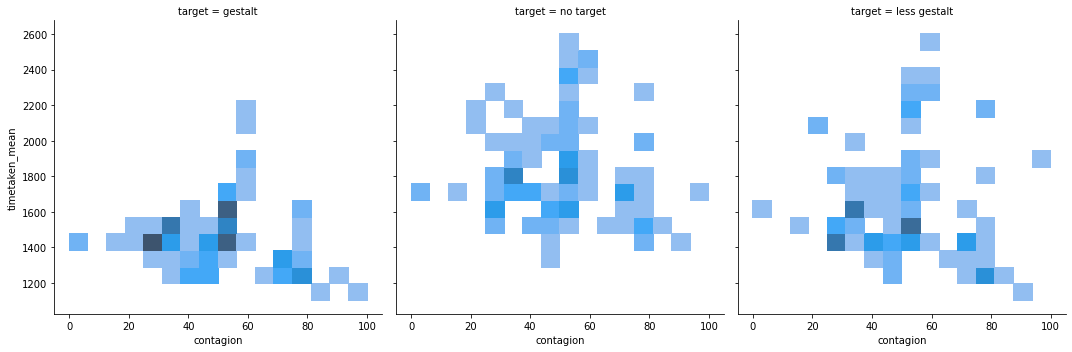

In [78]:
grouped_single = datadf.groupby(['contagion', 'target','basemap']).agg({'timetaken': ['mean'],'correct': ['mean']})
grouped_single = grouped_single.reset_index()
grouped_single.columns = ['contagion', 'target','basemap','timetaken_mean', 'correct_mean']
sns.displot(x="contagion", y='timetaken_mean', data=grouped_single, col='target')



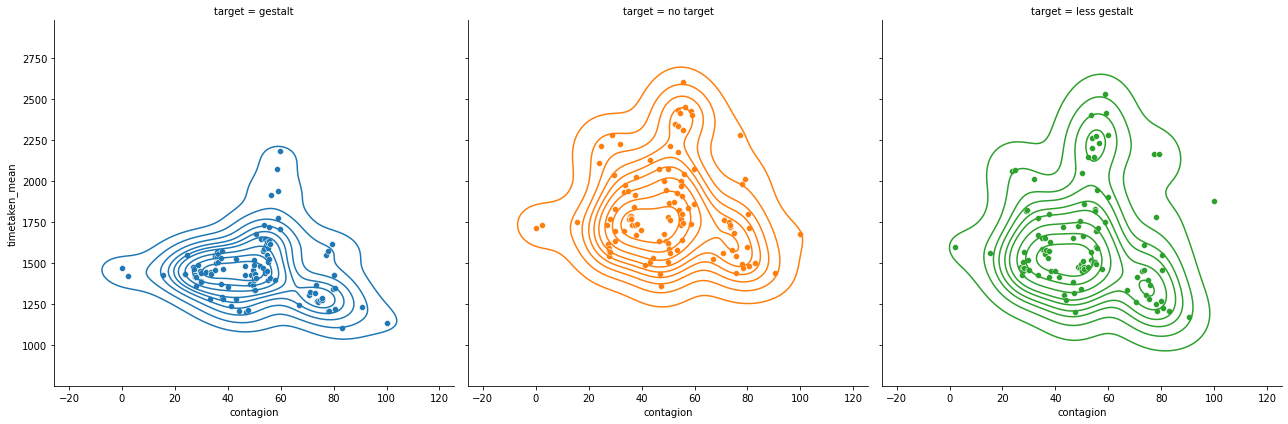

In [79]:
sns.reset_orig()

g = sns.FacetGrid(grouped_single, col="target", hue='target', height=6)
g.map(sns.kdeplot, "contagion","timetaken_mean" )
g.map(sns.scatterplot, "contagion","timetaken_mean" )


# sns.lmplot(x="contagion", y="timetaken_mean",col="target", lowess=True, data=grouped_single,  line_kws={"color": 'grey'})


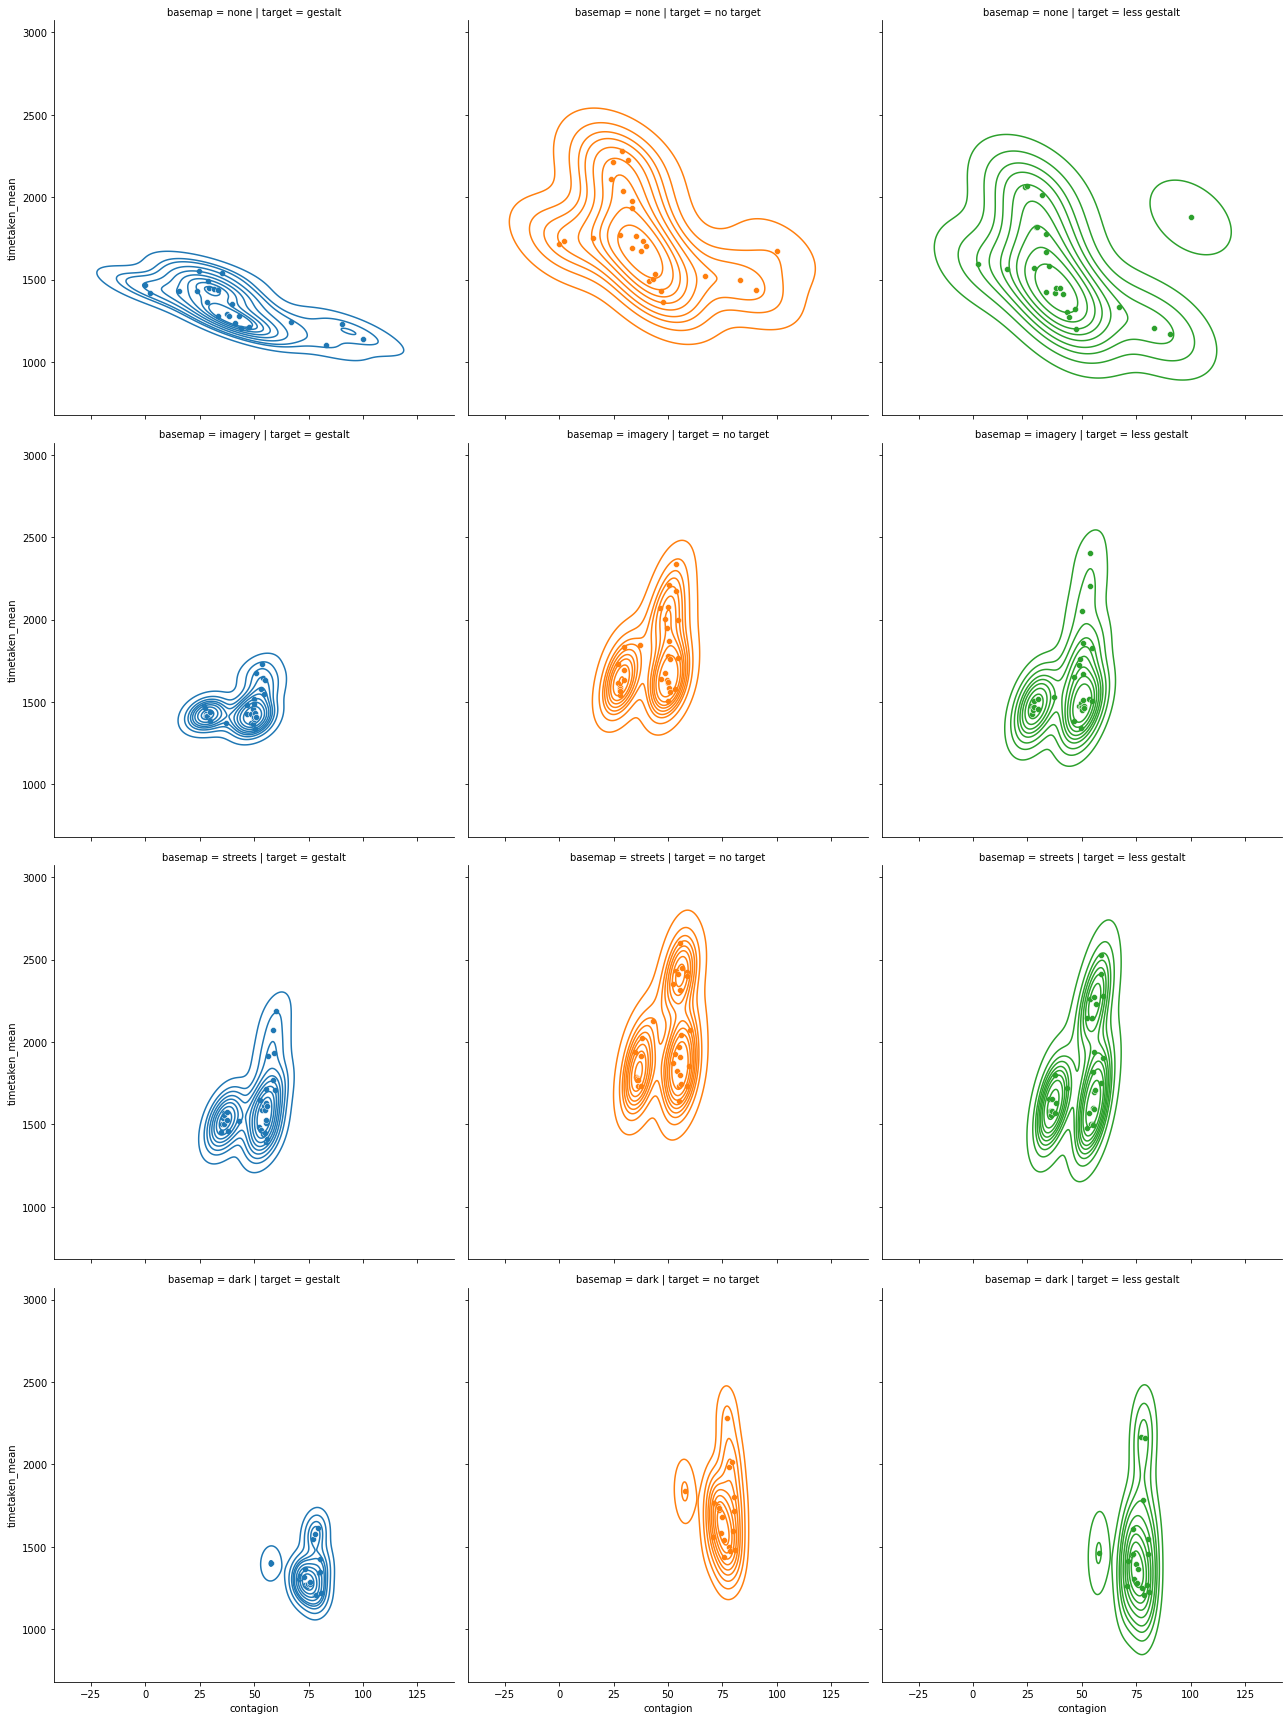

In [99]:
sns.reset_orig()

g = sns.FacetGrid(grouped_single, col="target", row="basemap", hue='target', height=6)
g.map(sns.kdeplot, "contagion","timetaken_mean" )
g.map(sns.scatterplot, "contagion","timetaken_mean" )


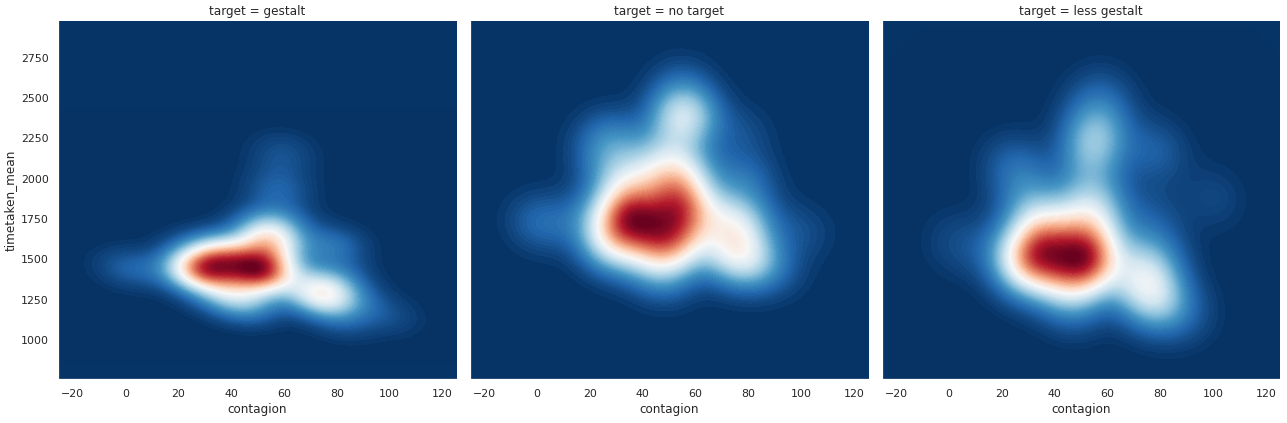

In [25]:
# facet.set(axis_bgcolor='#073467')
# sns.set_style("darkgrid")
grouped_single = datadf.groupby(['contagion', 'target']).agg({'timetaken': ['mean'],'correct': ['mean']})
grouped_single = grouped_single.reset_index()
grouped_single.columns = ['contagion', 'target','timetaken_mean', 'correct_mean']

sns.reset_orig()
sns.set(rc={'axes.facecolor':'#073467', 'axes.grid' : False})
g = sns.FacetGrid(grouped_single, col="target", height=6)
g.map(sns.kdeplot, "contagion","timetaken_mean", fill=True, thresh=0, levels=100, cmap="RdBu_r" )
sns.reset_orig()

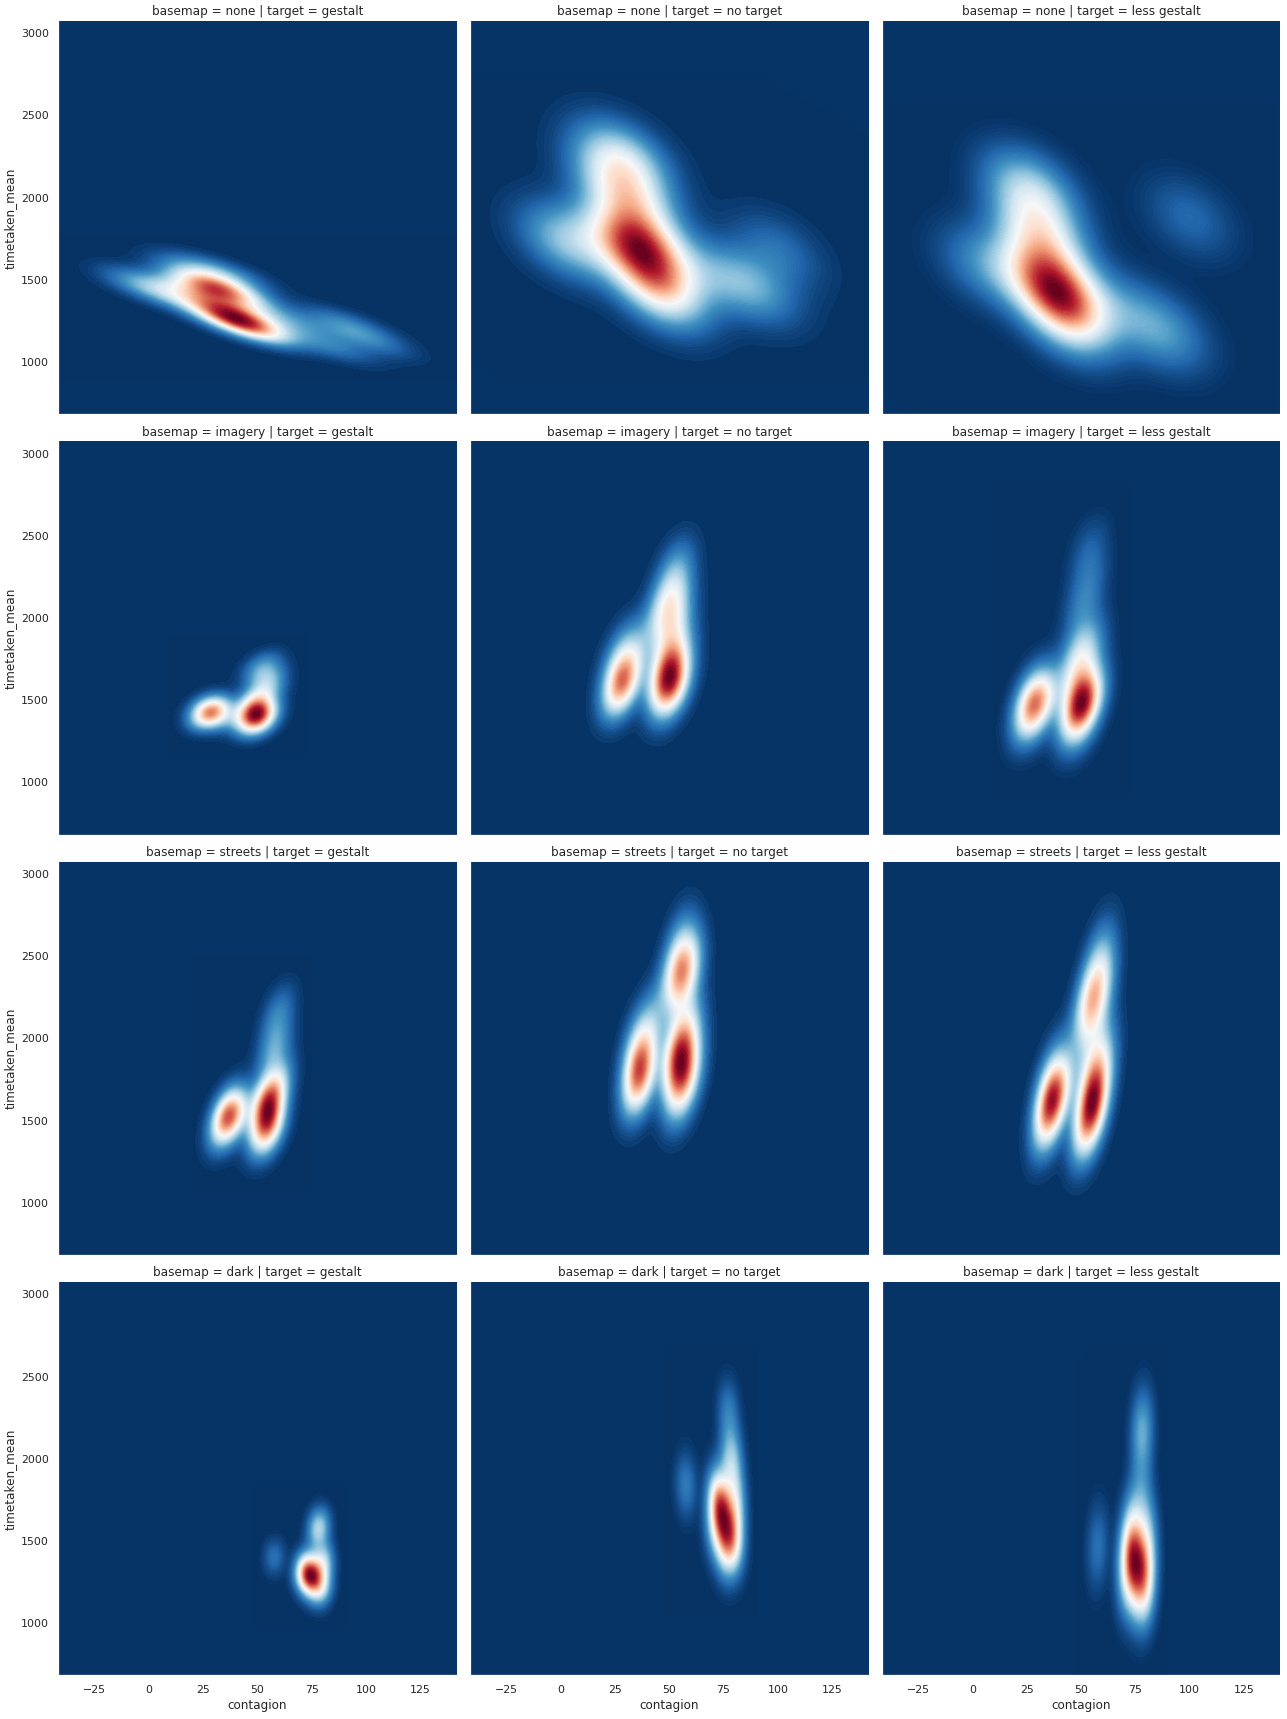

In [101]:
# facet.set(axis_bgcolor='#073467')
# sns.set_style("darkgrid")
grouped_single = datadf.groupby(['contagion', 'target', 'basemap']).agg({'timetaken': ['mean'],'correct': ['mean']})
grouped_single = grouped_single.reset_index()
grouped_single.columns = ['contagion', 'target', 'basemap','timetaken_mean', 'correct_mean']

sns.reset_orig()
sns.set(rc={'axes.facecolor':'#073467', 'axes.grid' : False})
g = sns.FacetGrid(grouped_single, col="target", row="basemap", height=6)
g.map(sns.kdeplot, "contagion","timetaken_mean", fill=True, thresh=0, levels=100, cmap="RdBu_r" )
sns.reset_orig()

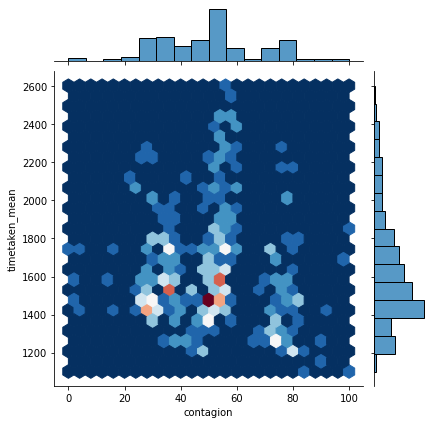

In [28]:
# sns.set(rc={'axes.facecolor':'#073467', 'axes.grid' : False})

# g = sns.FacetGrid(grouped_single, col="target", height=6)

grouped_single = datadf.groupby(['contagion', 'target']).agg({'timetaken': ['mean'],'correct': ['mean']})
grouped_single = grouped_single.reset_index()
grouped_single.columns = ['contagion', 'target','timetaken_mean', 'correct_mean']

# g.map(sns.jointplot, "contagion","timetaken_mean", kind="hex", cmap="RdBu_r" )
sns.reset_orig()

# g = sns.FacetGrid(grouped_single, col="target", height=6)
# g.map(sns.jointplot, x="contagion",y="timetaken_mean", kind="hex", cmap="RdBu_r" )
sns.jointplot(data=grouped_single, x="contagion", y="timetaken_mean", gridsize=25, kind="hex", cmap="RdBu_r")


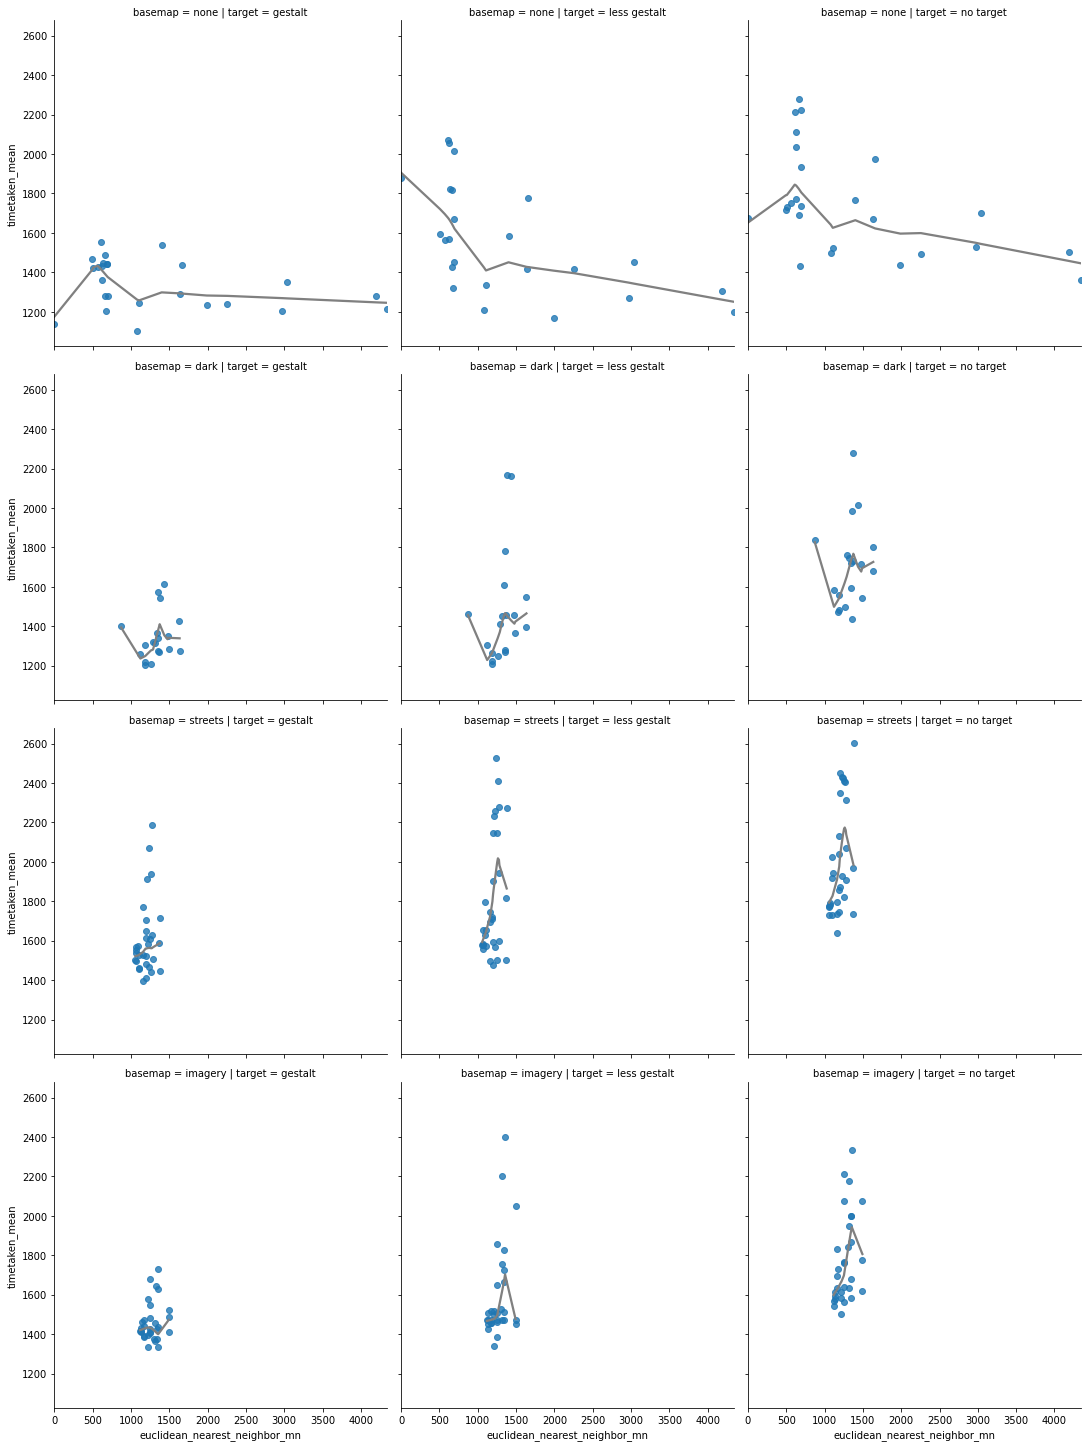

In [75]:
# slope, intercept, r_value, p_value, std_err = stats.linregress(grouped_single['contagionlog'],grouped_single['timetaken_mean'])

grouped_single = datadf.groupby(['euclidean_nearest_neighbor_mn', 'target','basemap']).agg({'timetaken': ['mean'],'correct': ['mean']})
grouped_single = grouped_single.reset_index()
grouped_single.columns = ['euclidean_nearest_neighbor_mn', 'target','basemap','timetaken_mean', 'correct_mean']
# grouped_single_limited = grouped_single.loc[grouped_single['euclidean_nearest_neighbor_mn'] > 0]
grouped_single_limited = grouped_single

sns.lmplot(x="euclidean_nearest_neighbor_mn", y="timetaken_mean",col="target",row="basemap",lowess=True, data=grouped_single,  line_kws={"color": 'grey'})



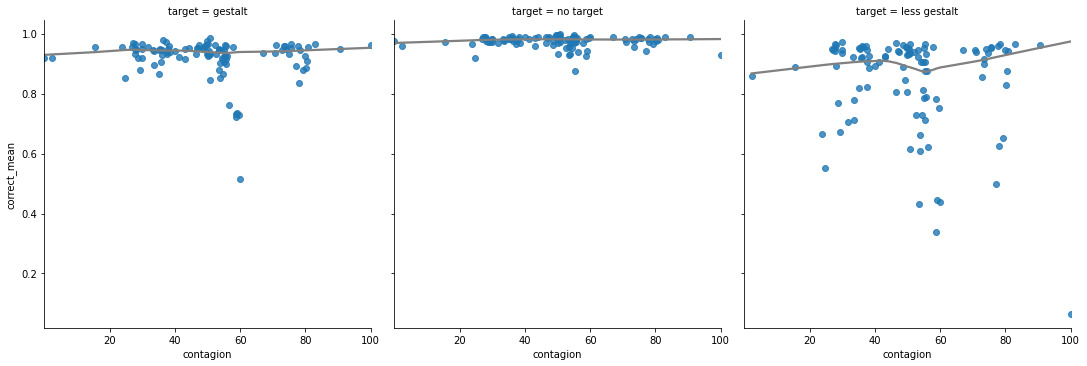

In [30]:
slope, intercept, r_value, p_value, std_err = stats.linregress(grouped_single['contagion'],grouped_single['correct_mean'])
sns.lmplot(x="contagion", y="correct_mean",col="target", lowess=True, data=grouped_single, line_kws={"color": 'grey'})


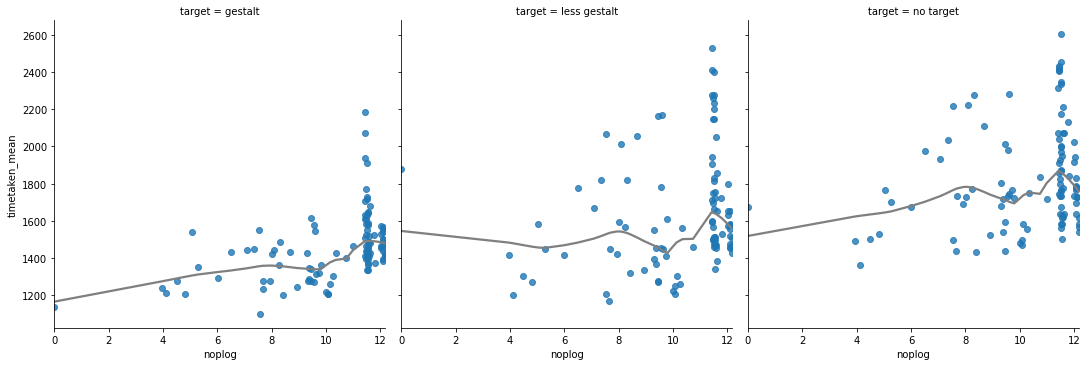

In [31]:
datadfLim = datadf.loc[datadf['noplog'] >= 0]
grouped_single = datadfLim.groupby(['noplog', 'target', 'basemap']).agg({'timetaken': ['mean'],'correct': ['mean']})
grouped_single = grouped_single.reset_index()
grouped_single.columns = ['noplog', 'target','timetaken_mean', 'correct_mean']
sns.lmplot(x="noplog", y="timetaken_mean",col="target", lowess=True, data=grouped_single, line_kws={"color": 'grey'})

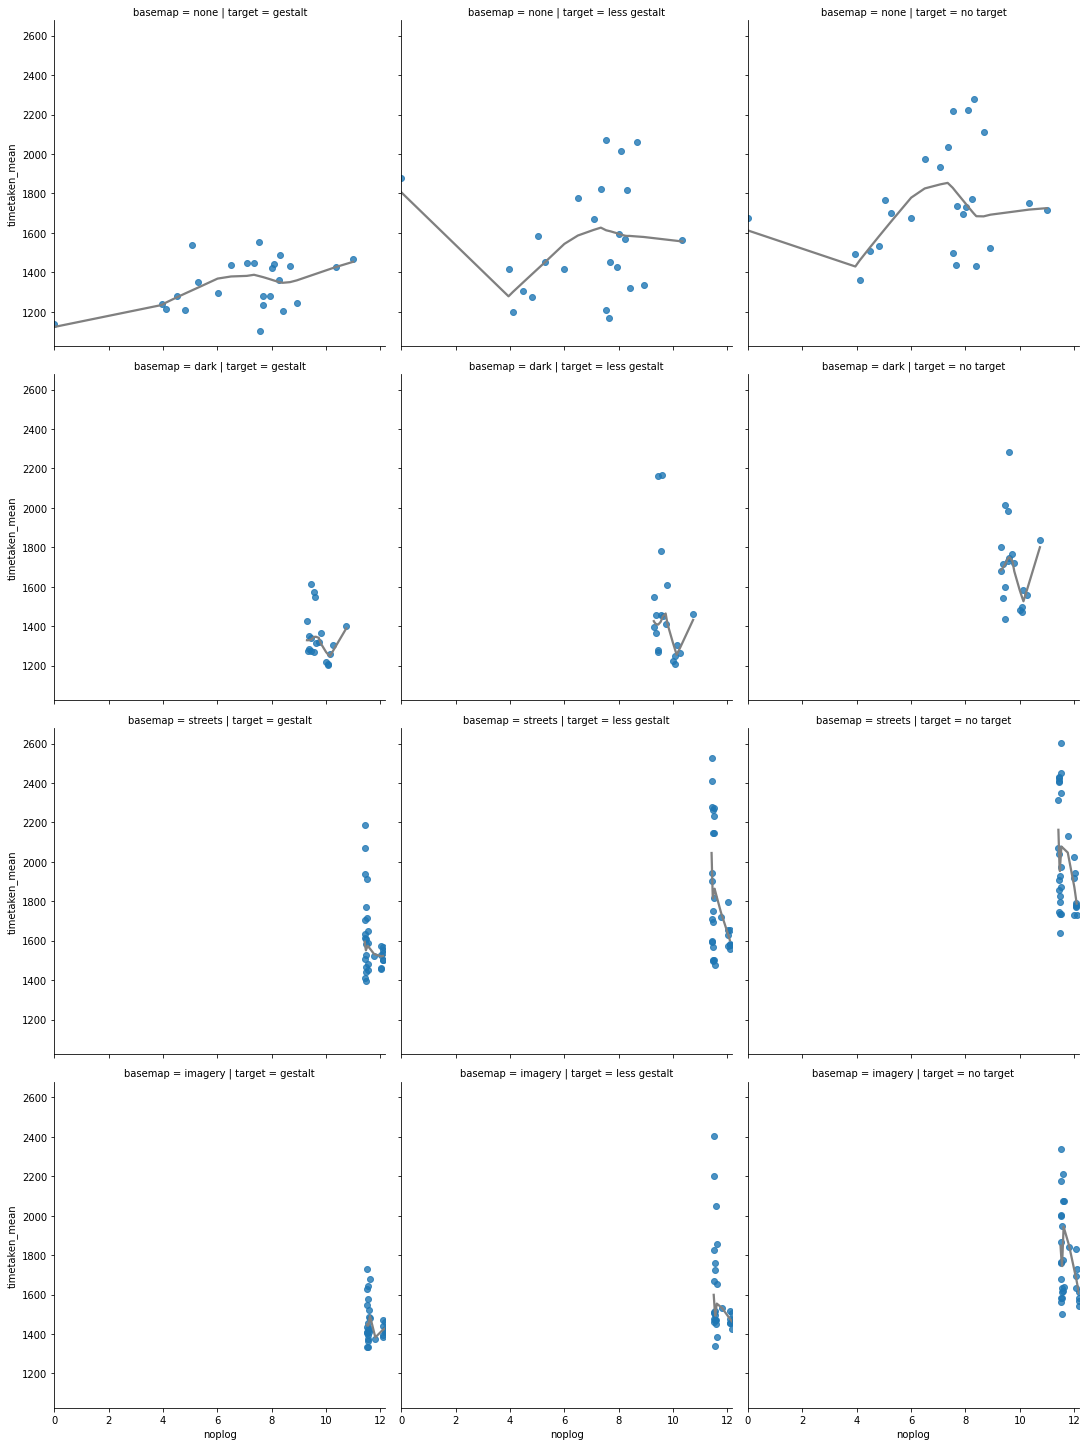

In [105]:
datadfLim = datadf.loc[datadf['noplog'] >= 0]
grouped_single = datadfLim.groupby(['noplog', 'target', 'basemap']).agg({'timetaken': ['mean'],'correct': ['mean']})
grouped_single = grouped_single.reset_index()
grouped_single.columns = ['noplog', 'target', 'basemap','timetaken_mean', 'correct_mean']
sns.lmplot(x="noplog", y="timetaken_mean",col="target", row="basemap", lowess=True, data=grouped_single, line_kws={"color": 'grey'})

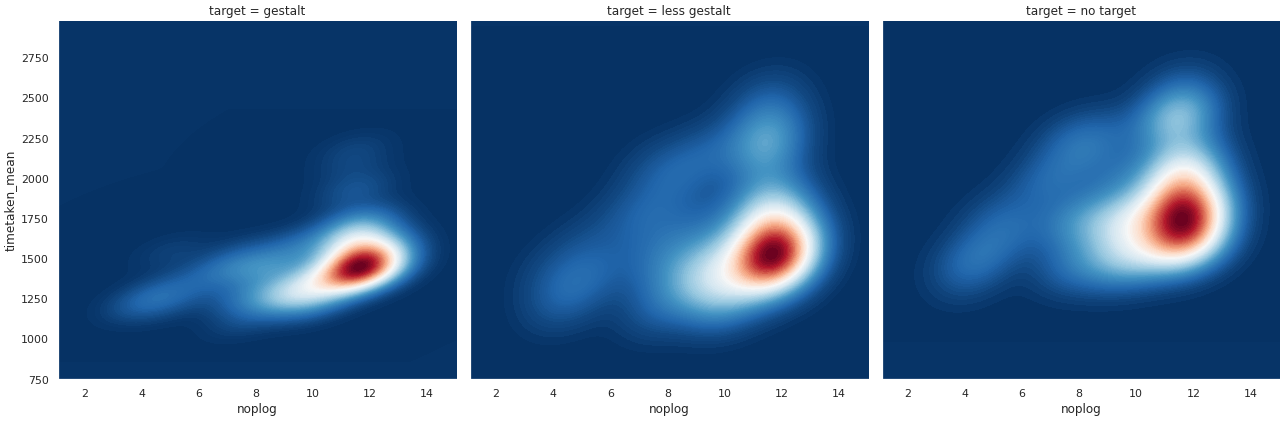

In [102]:
datadfLim = datadf.loc[datadf['noplog'] >= 1]

grouped_single = datadfLim.groupby(['noplog', 'target', 'basemap']).agg({'timetaken': ['mean'],'correct': ['mean']})
grouped_single = grouped_single.reset_index()
grouped_single.columns = ['noplog', 'target', 'basemap','timetaken_mean', 'correct_mean']

sns.reset_orig()
sns.set(rc={'axes.facecolor':'#073467', 'axes.grid' : False})
g = sns.FacetGrid(grouped_single, col="target", height=6)
g.map(sns.kdeplot, "noplog","timetaken_mean", fill=True, thresh=0, levels=100, cmap="RdBu_r" )
sns.reset_orig()



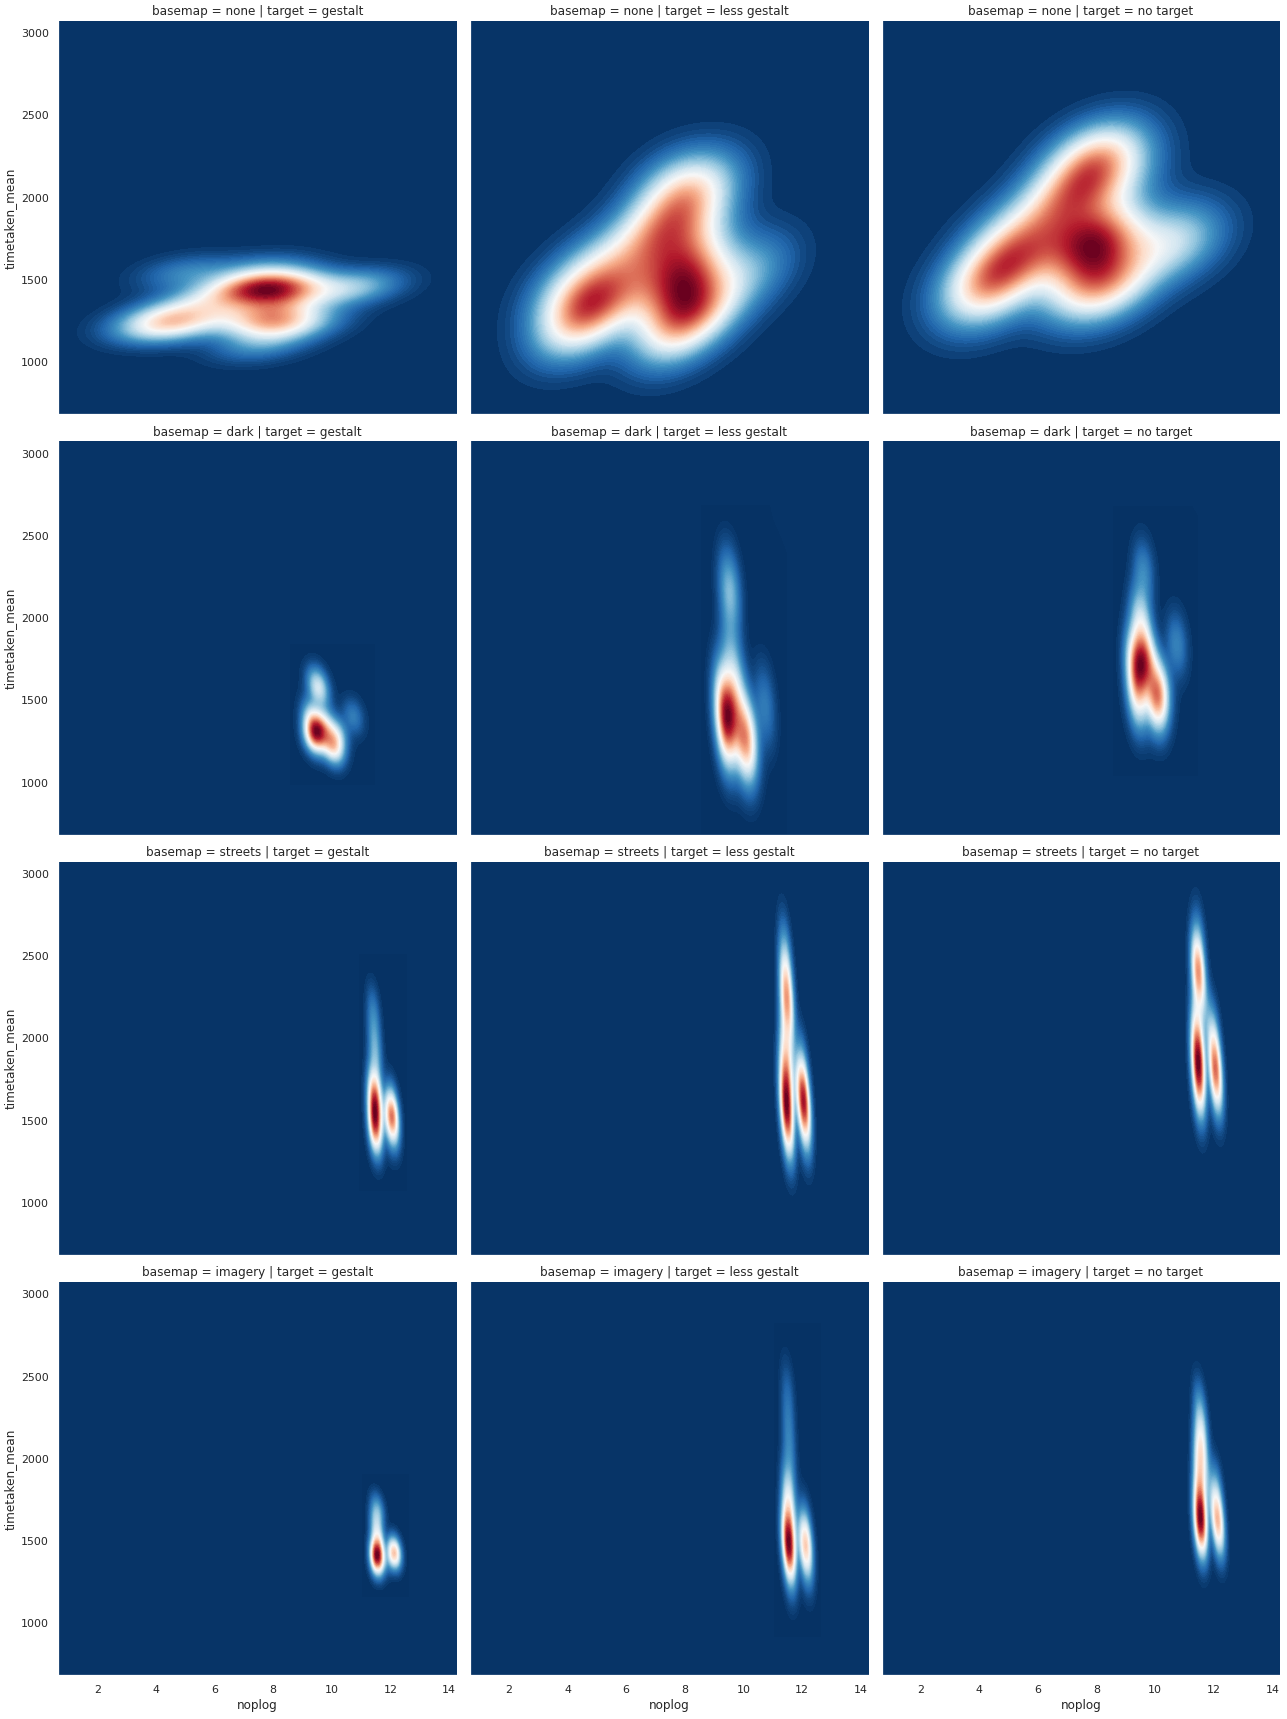

In [103]:
sns.reset_orig()
sns.set(rc={'axes.facecolor':'#073467', 'axes.grid' : False})
g = sns.FacetGrid(grouped_single, col="target", row="basemap", height=6)
g.map(sns.kdeplot, "noplog","timetaken_mean", fill=True, thresh=0, levels=100, cmap="RdBu_r" )
sns.reset_orig()

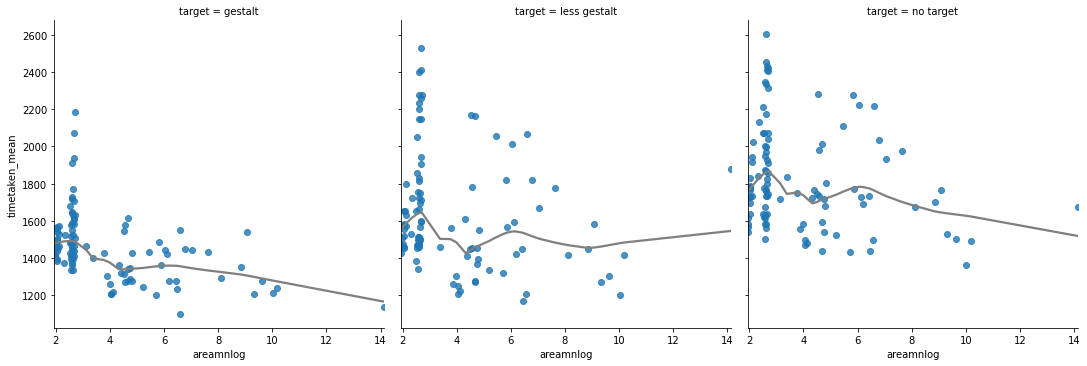

In [106]:
grouped_single = datadf.groupby(['areamnlog', 'target', 'basemap']).agg({'timetaken': ['mean'],'correct': ['mean']})
grouped_single = grouped_single.reset_index()
grouped_single.columns = ['areamnlog', 'target', 'basemap','timetaken_mean', 'correct_mean']
# grouped_single_limited = grouped_single.loc[grouped_single['target'] < 100]
sns.lmplot(x="areamnlog", y="timetaken_mean",col="target", lowess=True, data=grouped_single, line_kws={"color": 'grey'})



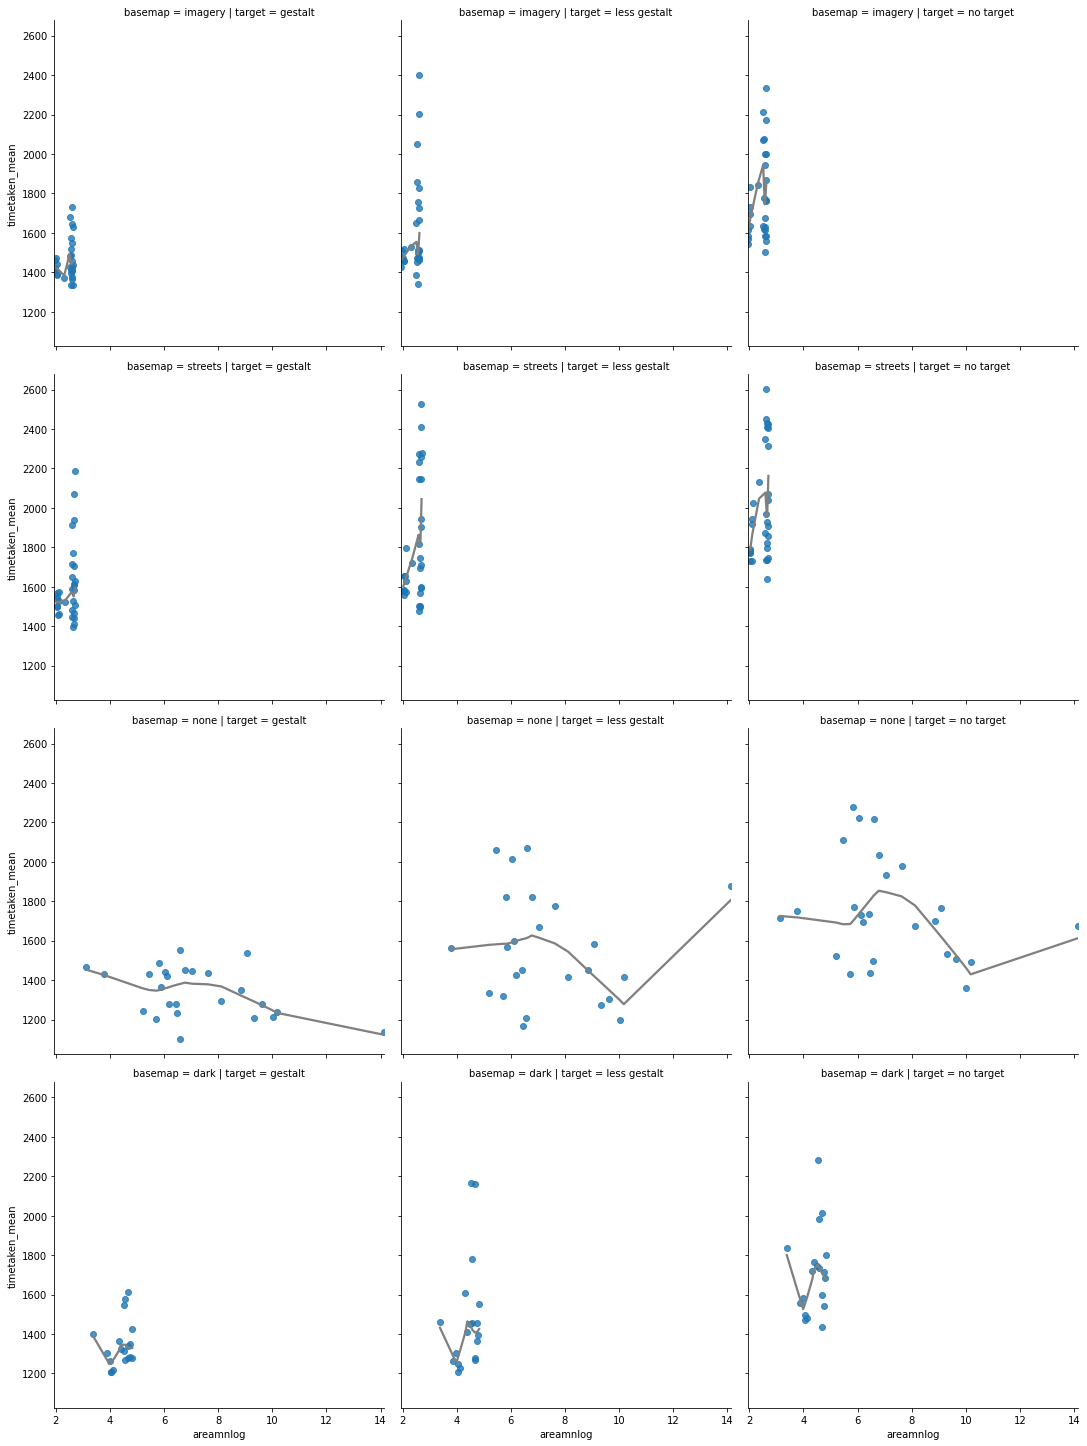

In [107]:
grouped_single = datadf.groupby(['areamnlog', 'target', 'basemap']).agg({'timetaken': ['mean'],'correct': ['mean']})
grouped_single = grouped_single.reset_index()
grouped_single.columns = ['areamnlog', 'target', 'basemap','timetaken_mean', 'correct_mean']
# grouped_single_limited = grouped_single.loc[grouped_single['target'] < 100]
sns.lmplot(x="areamnlog", y="timetaken_mean",col="target", row="basemap", lowess=True, data=grouped_single, line_kws={"color": 'grey'})



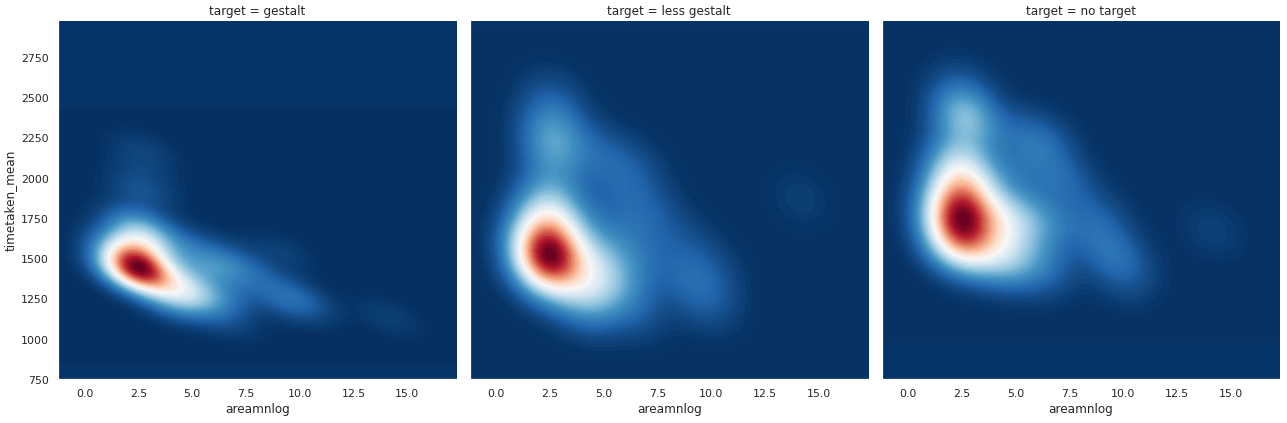

In [34]:
datadfLim = datadf.loc[datadf['areamnlog'] >= 0]

grouped_single = datadfLim.groupby(['areamnlog', 'target', 'basemap']).agg({'timetaken': ['mean'],'correct': ['mean']})
grouped_single = grouped_single.reset_index()
grouped_single.columns = ['areamnlog', 'target', 'basemap','timetaken_mean', 'correct_mean']

sns.reset_orig()
sns.set(rc={'axes.facecolor':'#073467', 'axes.grid' : False})
g = sns.FacetGrid(grouped_single, col="target", height=6)
g.map(sns.kdeplot, "areamnlog","timetaken_mean", fill=True, thresh=0, levels=100, cmap="RdBu_r" )
sns.reset_orig()

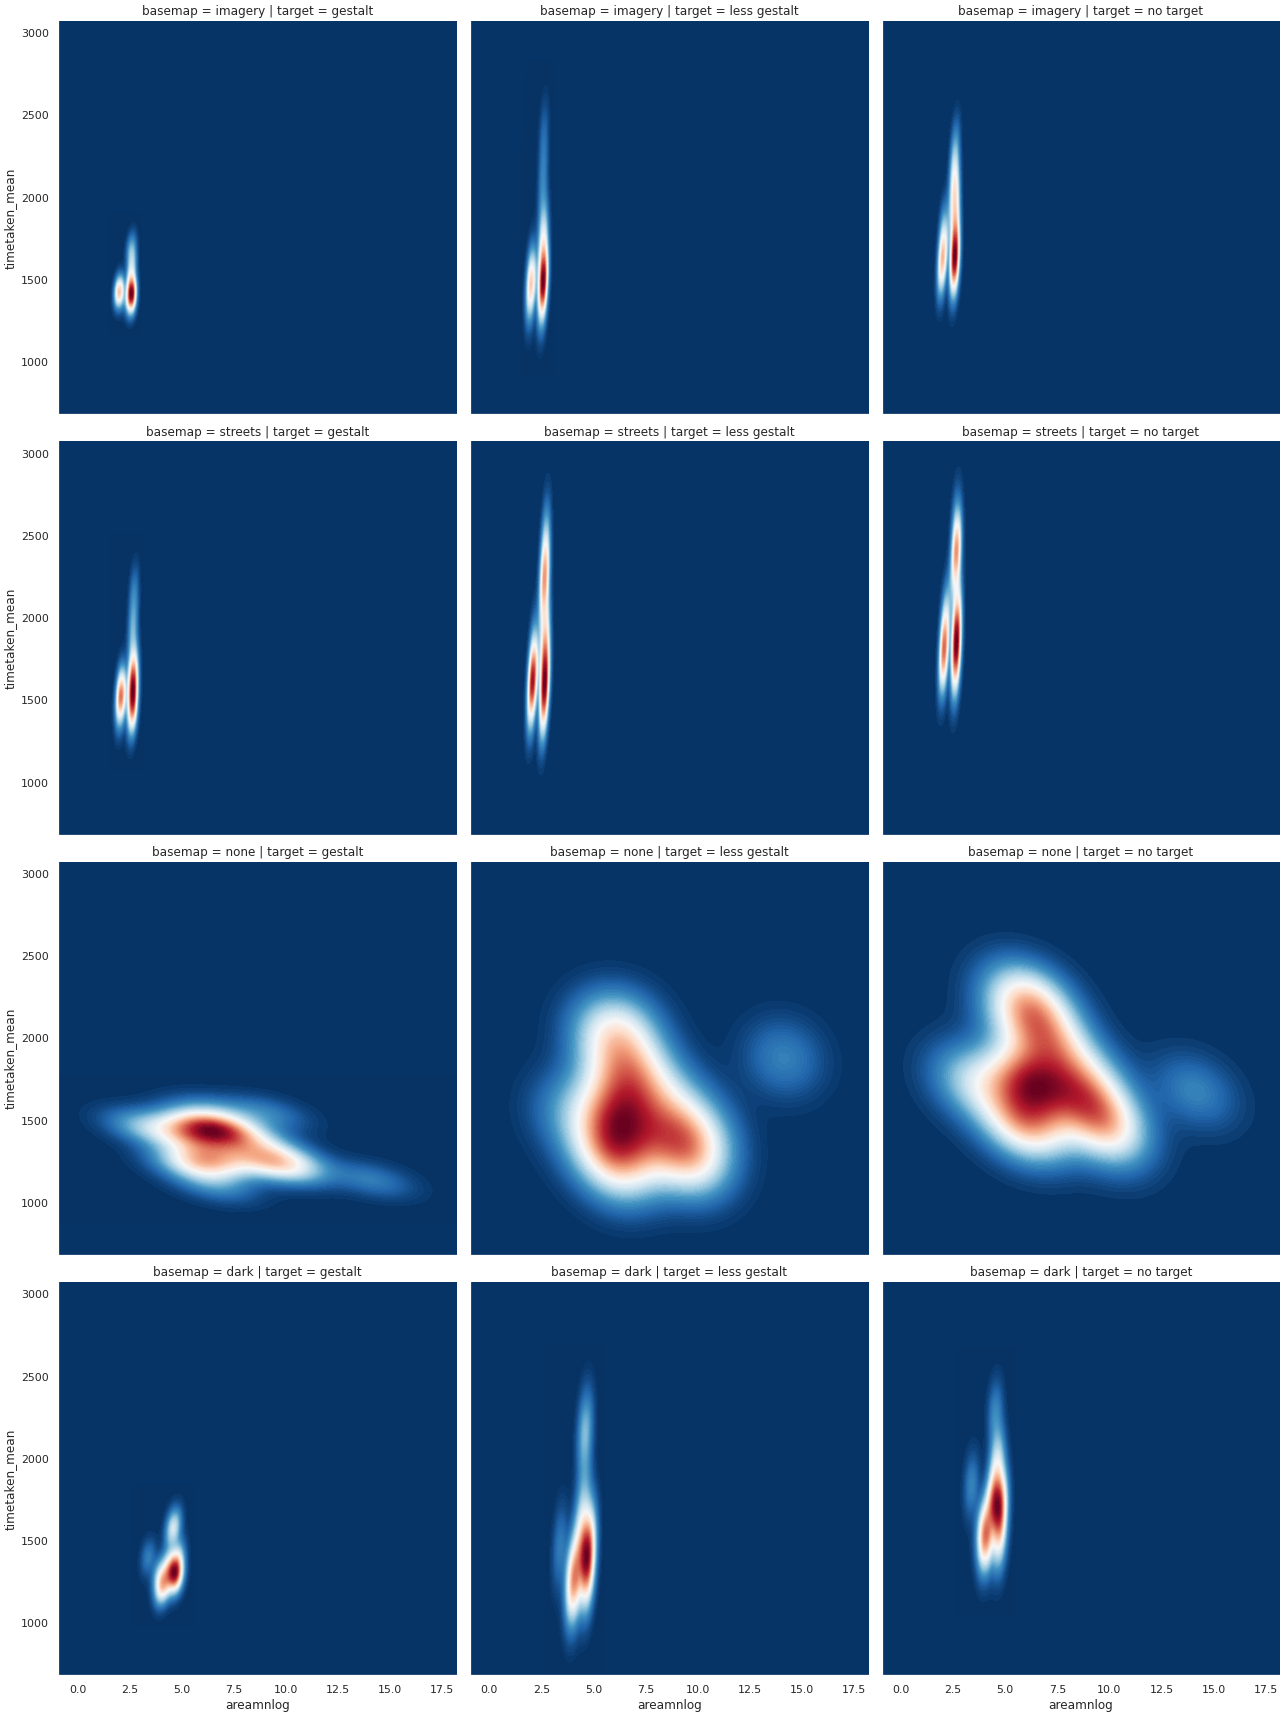

In [108]:
datadfLim = datadf.loc[datadf['areamnlog'] >= 0]

grouped_single = datadfLim.groupby(['areamnlog', 'target', 'basemap']).agg({'timetaken': ['mean'],'correct': ['mean']})
grouped_single = grouped_single.reset_index()
grouped_single.columns = ['areamnlog', 'target', 'basemap','timetaken_mean', 'correct_mean']

sns.reset_orig()
sns.set(rc={'axes.facecolor':'#073467', 'axes.grid' : False})
g = sns.FacetGrid(grouped_single, col="target", row="basemap", height=6)
g.map(sns.kdeplot, "areamnlog","timetaken_mean", fill=True, thresh=0, levels=100, cmap="RdBu_r" )
sns.reset_orig()

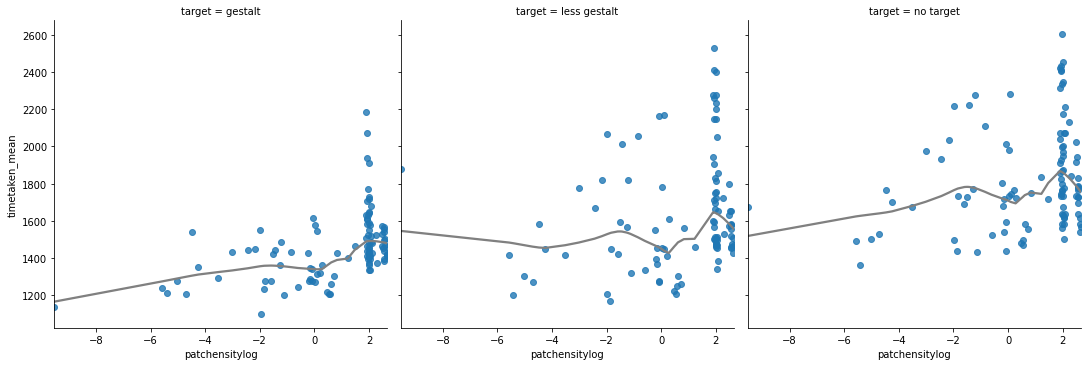

In [109]:
grouped_single = datadf.groupby(['patchensitylog', 'target', 'basemap']).agg({'timetaken': ['mean'],'correct': ['mean']})
grouped_single = grouped_single.reset_index()
grouped_single.columns = ['patchensitylog', 'target', 'basemap','timetaken_mean', 'correct_mean']
sns.lmplot(x="patchensitylog", y="timetaken_mean",col="target", lowess=True, data=grouped_single, line_kws={"color": 'grey'})



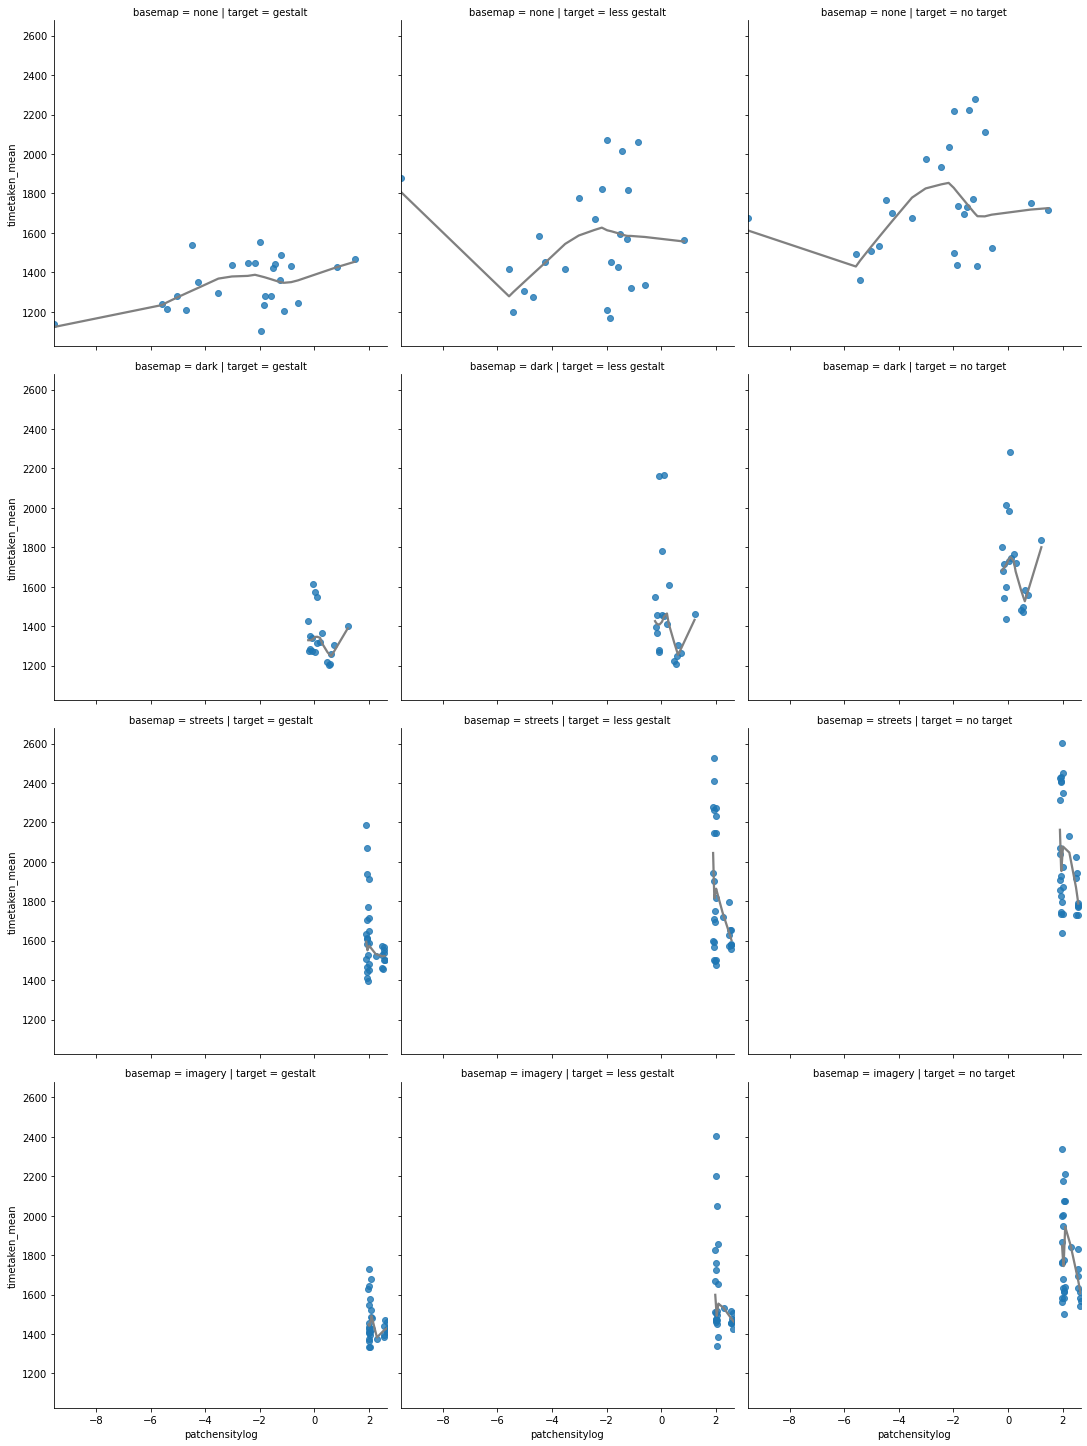

In [111]:
grouped_single = datadf.groupby(['patchensitylog', 'target', 'basemap']).agg({'timetaken': ['mean'],'correct': ['mean']})
grouped_single = grouped_single.reset_index()
grouped_single.columns = ['patchensitylog', 'target', 'basemap','timetaken_mean', 'correct_mean']
sns.lmplot(x="patchensitylog", y="timetaken_mean",col="target", row="basemap", lowess=True, data=grouped_single, line_kws={"color": 'grey'})



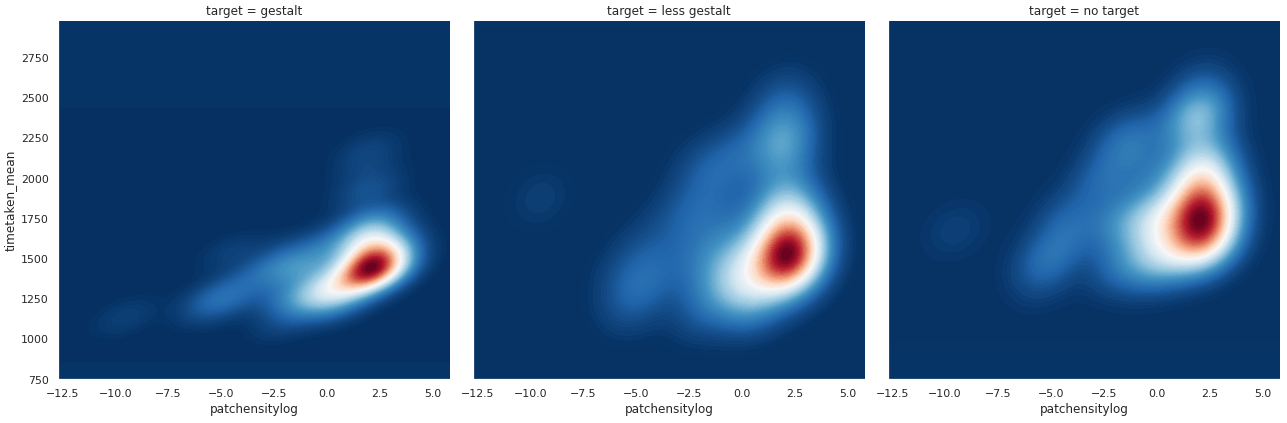

In [112]:
datadfLim = datadf.loc[datadf['patchensitylog'] >= -10]

grouped_single = datadfLim.groupby(['patchensitylog', 'target', 'basemap']).agg({'timetaken': ['mean'],'correct': ['mean']})
grouped_single = grouped_single.reset_index()
grouped_single.columns = ['patchensitylog', 'target', 'basemap','timetaken_mean', 'correct_mean']

sns.reset_orig()
sns.set(rc={'axes.facecolor':'#073467', 'axes.grid' : False})
g = sns.FacetGrid(grouped_single, col="target", height=6)
g.map(sns.kdeplot, "patchensitylog","timetaken_mean", fill=True, thresh=0, levels=100, cmap="RdBu_r" )
sns.reset_orig()

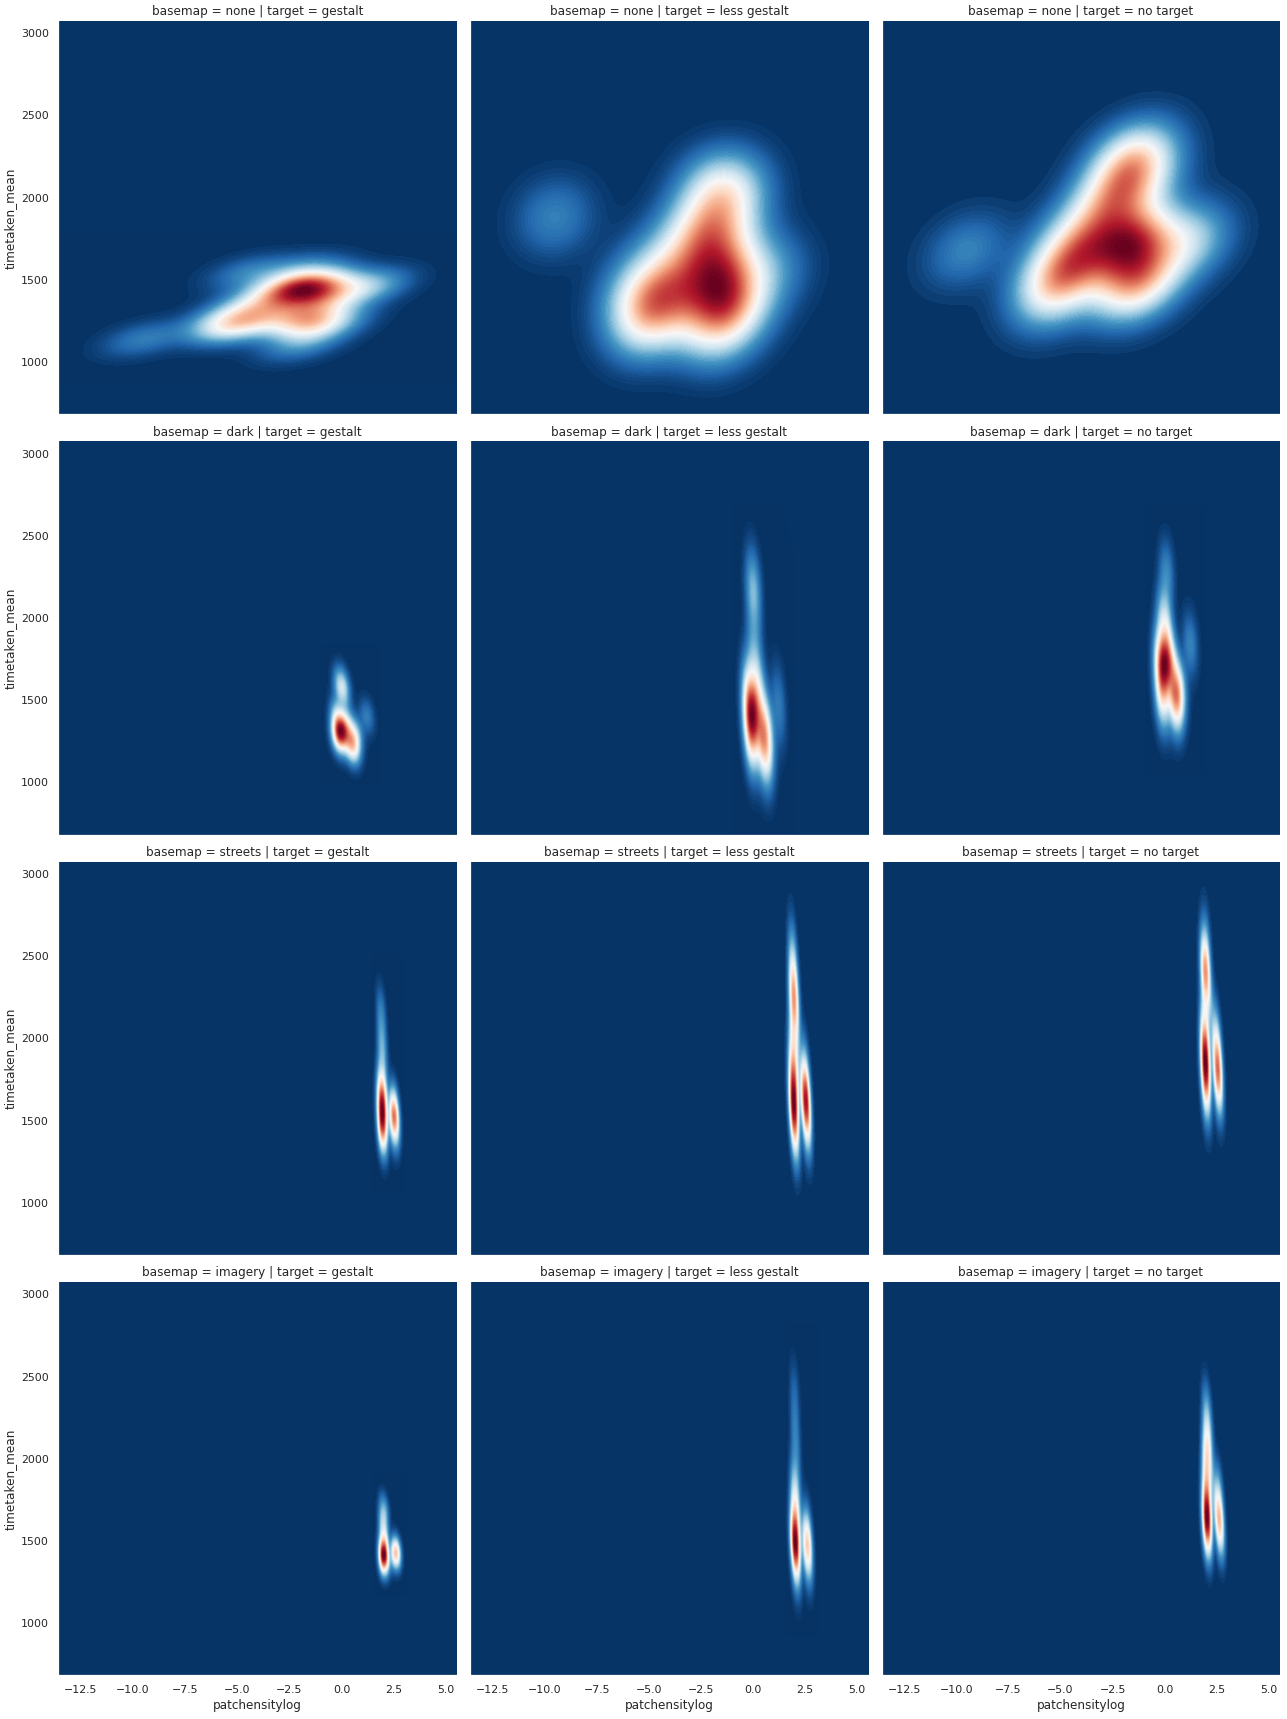

In [113]:
datadfLim = datadf.loc[datadf['patchensitylog'] >= -10]

grouped_single = datadfLim.groupby(['patchensitylog', 'target', 'basemap']).agg({'timetaken': ['mean'],'correct': ['mean']})
grouped_single = grouped_single.reset_index()
grouped_single.columns = ['patchensitylog', 'target', 'basemap','timetaken_mean', 'correct_mean']

sns.reset_orig()
sns.set(rc={'axes.facecolor':'#073467', 'axes.grid' : False})
g = sns.FacetGrid(grouped_single, col="target", row="basemap", height=6)
g.map(sns.kdeplot, "patchensitylog","timetaken_mean", fill=True, thresh=0, levels=100, cmap="RdBu_r" )
sns.reset_orig()

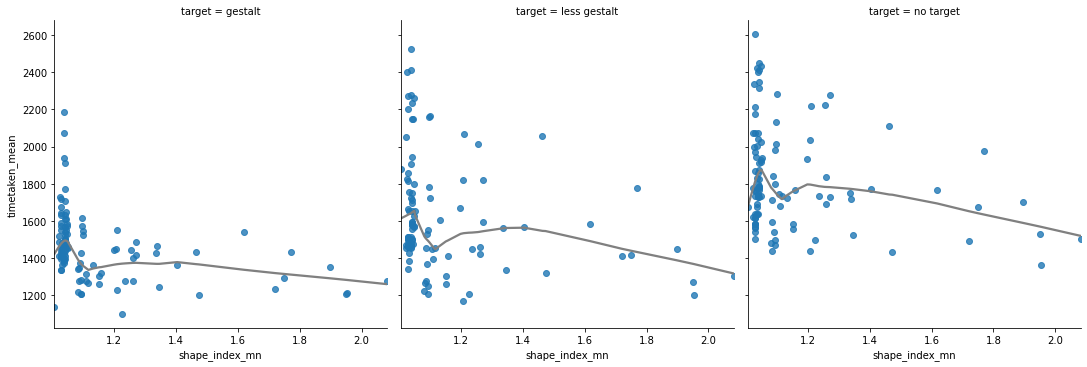

In [114]:
grouped_single = datadf.groupby(['shape_index_mn', 'target', 'basemap']).agg({'timetaken': ['mean'],'correct': ['mean']})
grouped_single = grouped_single.reset_index()
grouped_single.columns = ['shape_index_mn', 'target', 'basemap','timetaken_mean', 'correct_mean']
sns.lmplot(x="shape_index_mn", y="timetaken_mean",col="target", lowess=True, data=grouped_single, line_kws={"color": 'grey'})


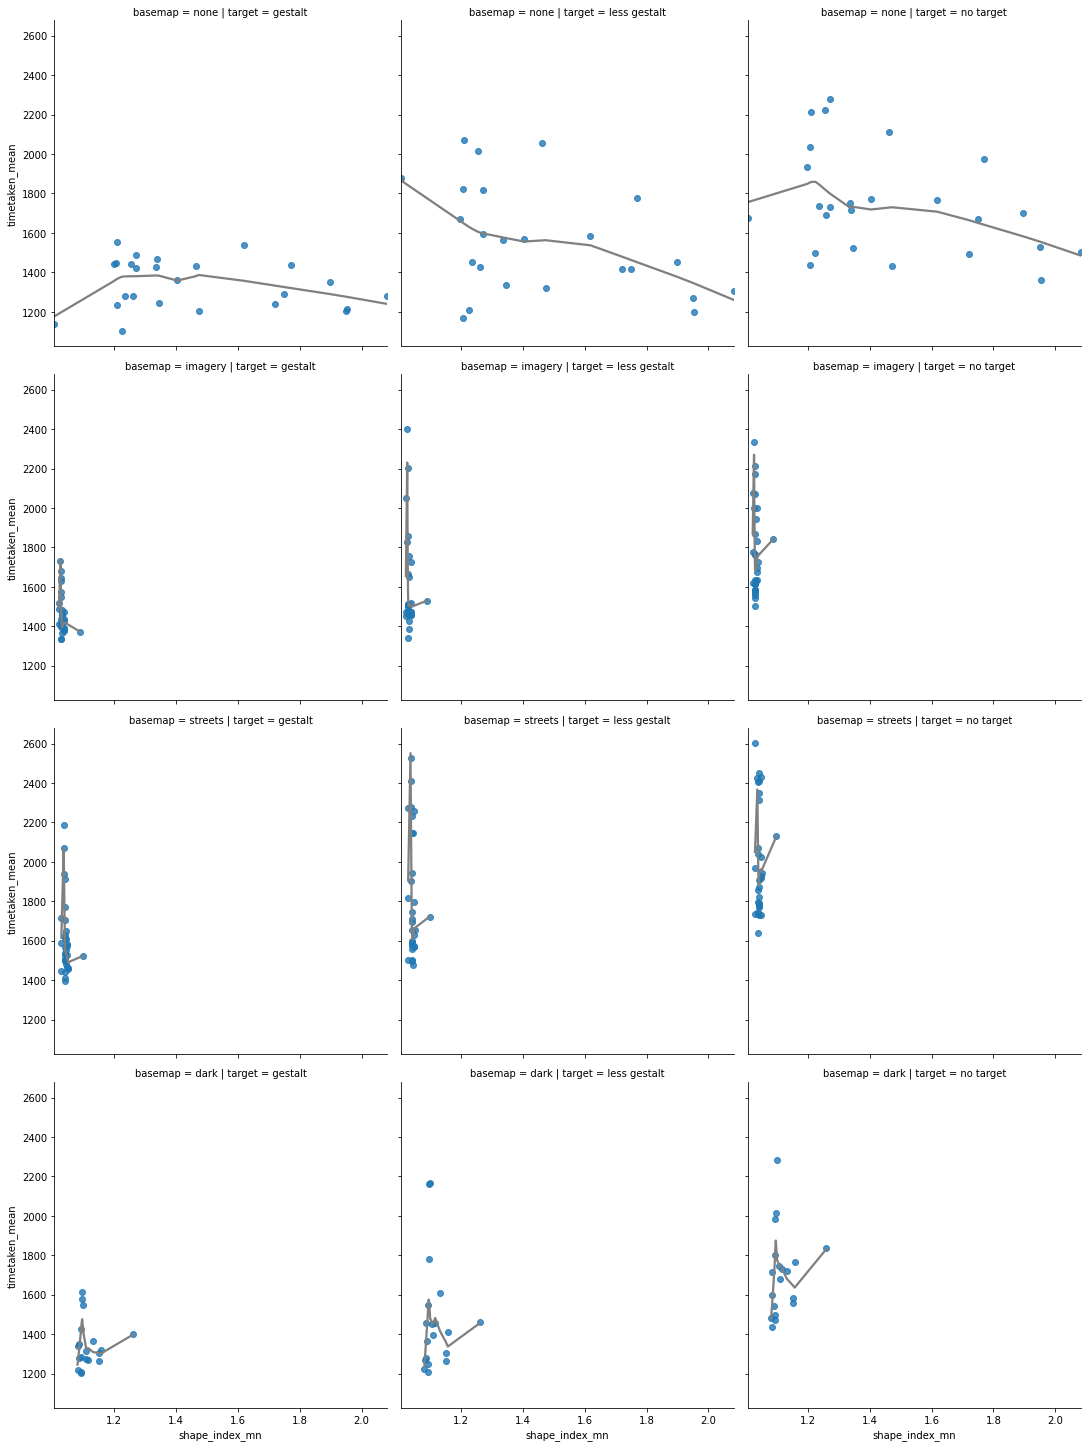

In [115]:
grouped_single = datadf.groupby(['shape_index_mn', 'target', 'basemap']).agg({'timetaken': ['mean'],'correct': ['mean']})
grouped_single = grouped_single.reset_index()
grouped_single.columns = ['shape_index_mn', 'target', 'basemap','timetaken_mean', 'correct_mean']
sns.lmplot(x="shape_index_mn", y="timetaken_mean",col="target", row="basemap", lowess=True, data=grouped_single, line_kws={"color": 'grey'})


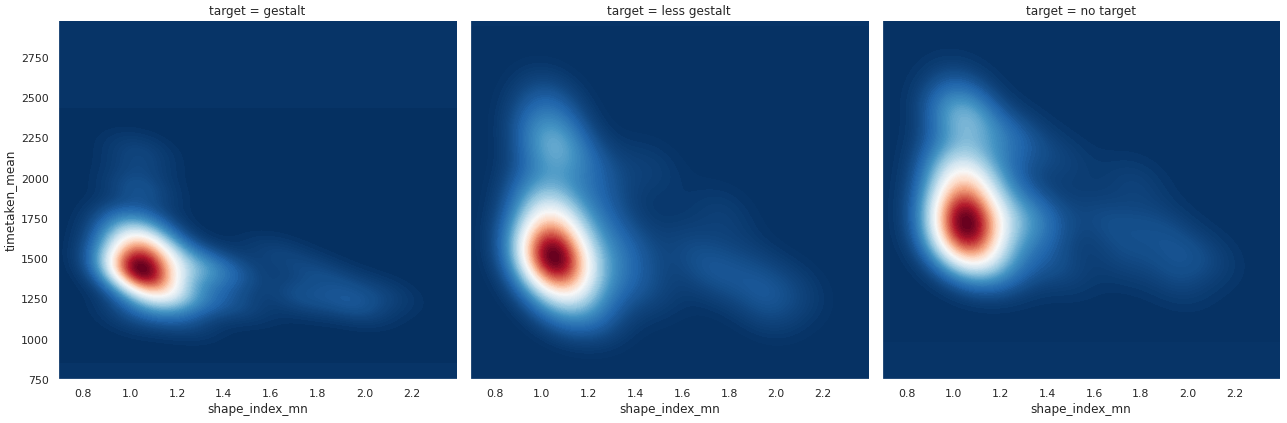

In [116]:
datadfLim = datadf # datadf.loc[datadf['shape_index_mn'] >= 5]

grouped_single = datadfLim.groupby(['shape_index_mn', 'target', 'basemap']).agg({'timetaken': ['mean'],'correct': ['mean']})
grouped_single = grouped_single.reset_index()
grouped_single.columns = ['shape_index_mn', 'target', 'basemap','timetaken_mean', 'correct_mean']

sns.reset_orig()
sns.set(rc={'axes.facecolor':'#073467', 'axes.grid' : False})
g = sns.FacetGrid(grouped_single, col="target", height=6)
g.map(sns.kdeplot, "shape_index_mn","timetaken_mean", fill=True, thresh=0, levels=100, cmap="RdBu_r" )
sns.reset_orig()

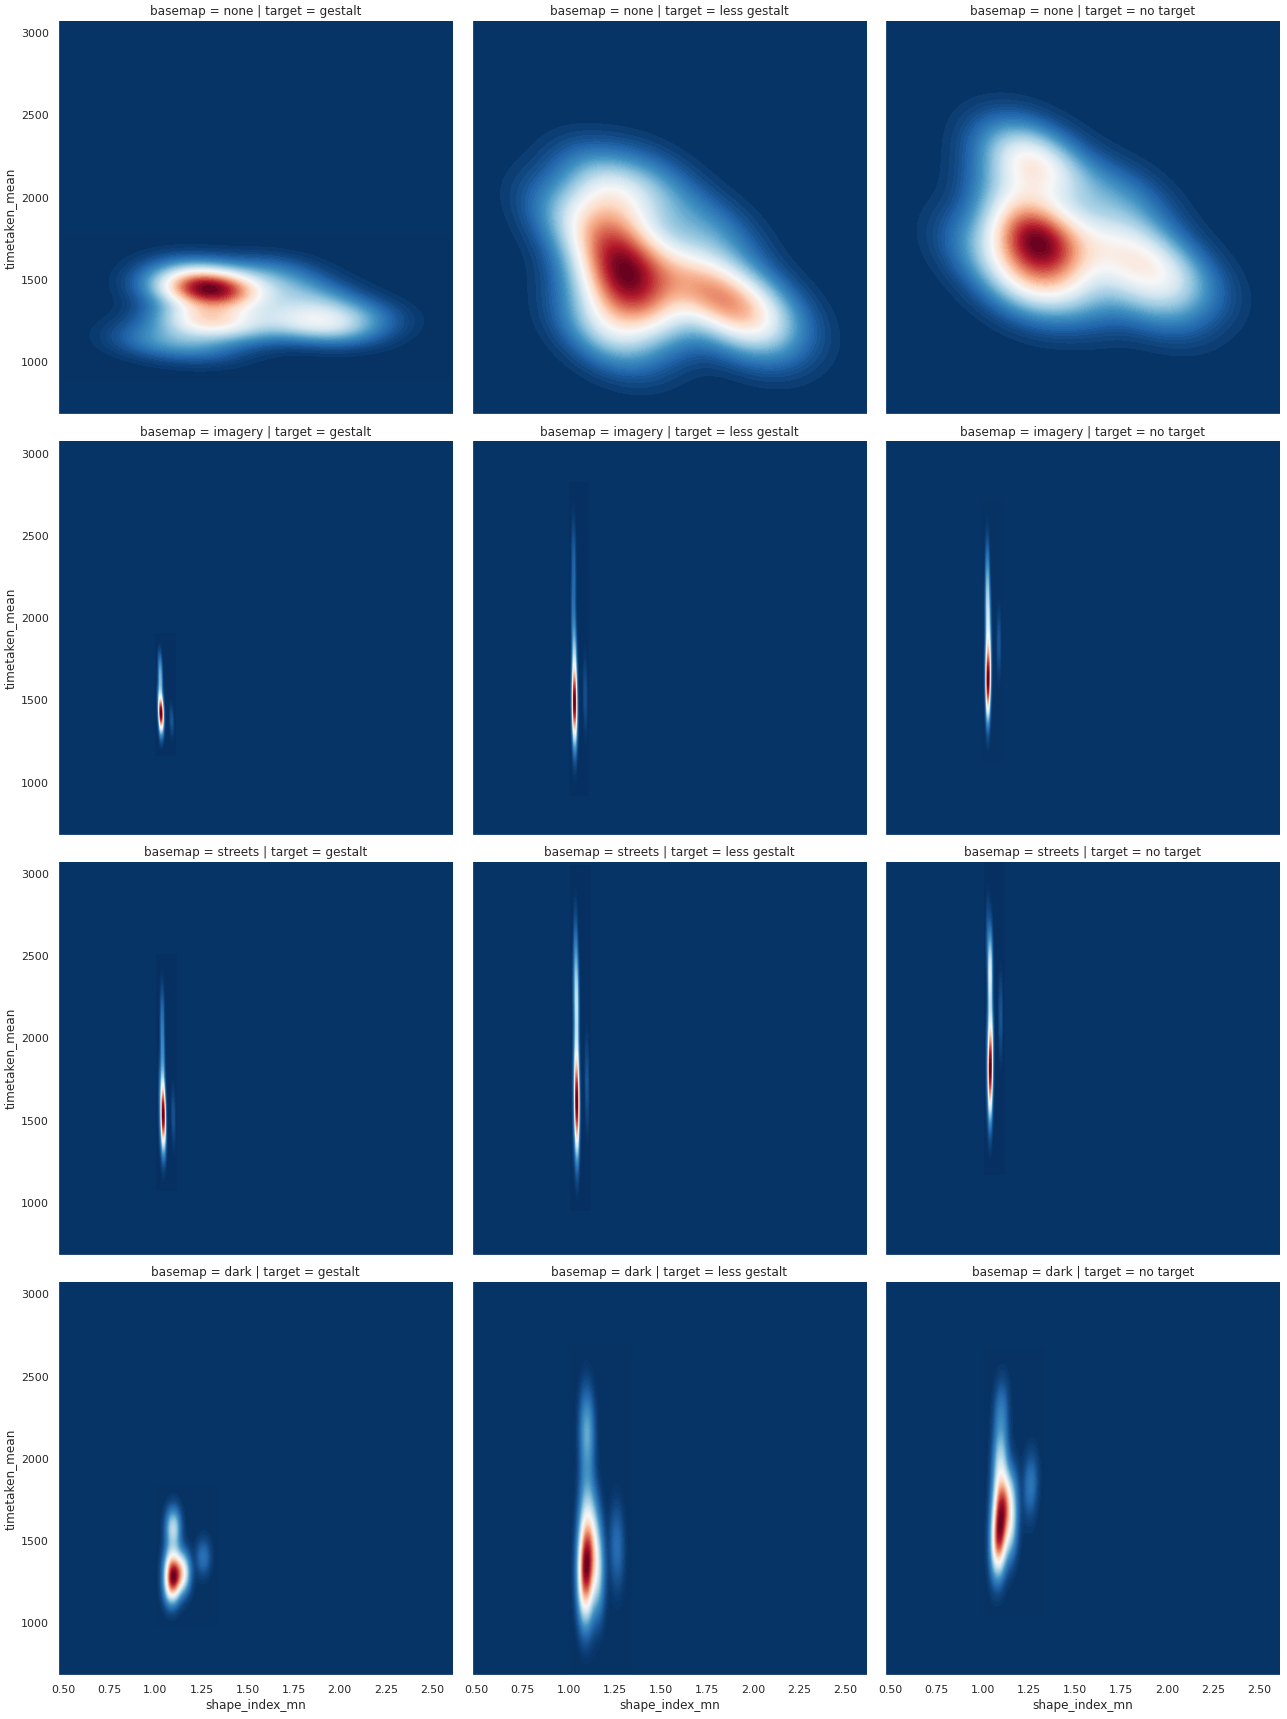

In [118]:
datadfLim = datadf # datadf.loc[datadf['shape_index_mn'] >= 5]

grouped_single = datadfLim.groupby(['shape_index_mn', 'target', 'basemap']).agg({'timetaken': ['mean'],'correct': ['mean']})
grouped_single = grouped_single.reset_index()
grouped_single.columns = ['shape_index_mn', 'target', 'basemap','timetaken_mean', 'correct_mean']

sns.reset_orig()
sns.set(rc={'axes.facecolor':'#073467', 'axes.grid' : False})
g = sns.FacetGrid(grouped_single, col="target", row="basemap", height=6)
g.map(sns.kdeplot, "shape_index_mn","timetaken_mean", fill=True, thresh=0, levels=100, cmap="RdBu_r" )
sns.reset_orig()

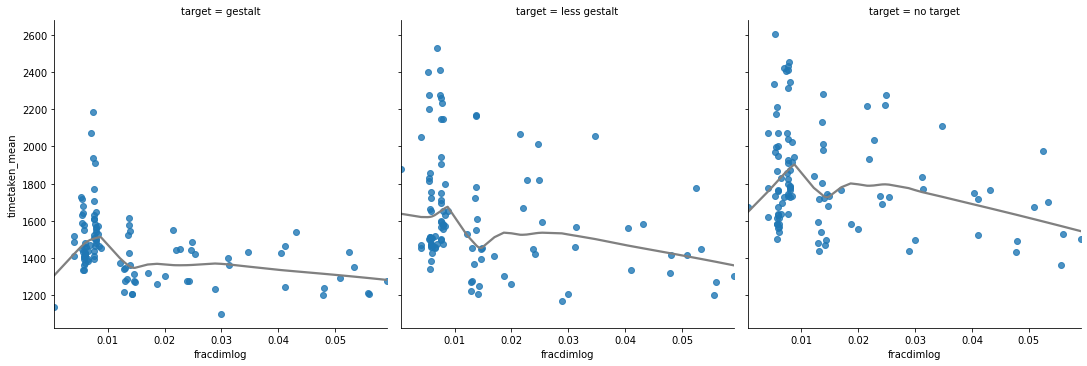

In [119]:
grouped_single = datadf.groupby(['fracdimlog', 'target', 'basemap']).agg({'timetaken': ['mean'],'correct': ['mean']})
grouped_single = grouped_single.reset_index()
grouped_single.columns = ['fracdimlog', 'target', 'basemap','timetaken_mean', 'correct_mean']
sns.lmplot(x="fracdimlog", y="timetaken_mean",col="target", lowess=True, data=grouped_single, line_kws={"color": 'grey'})


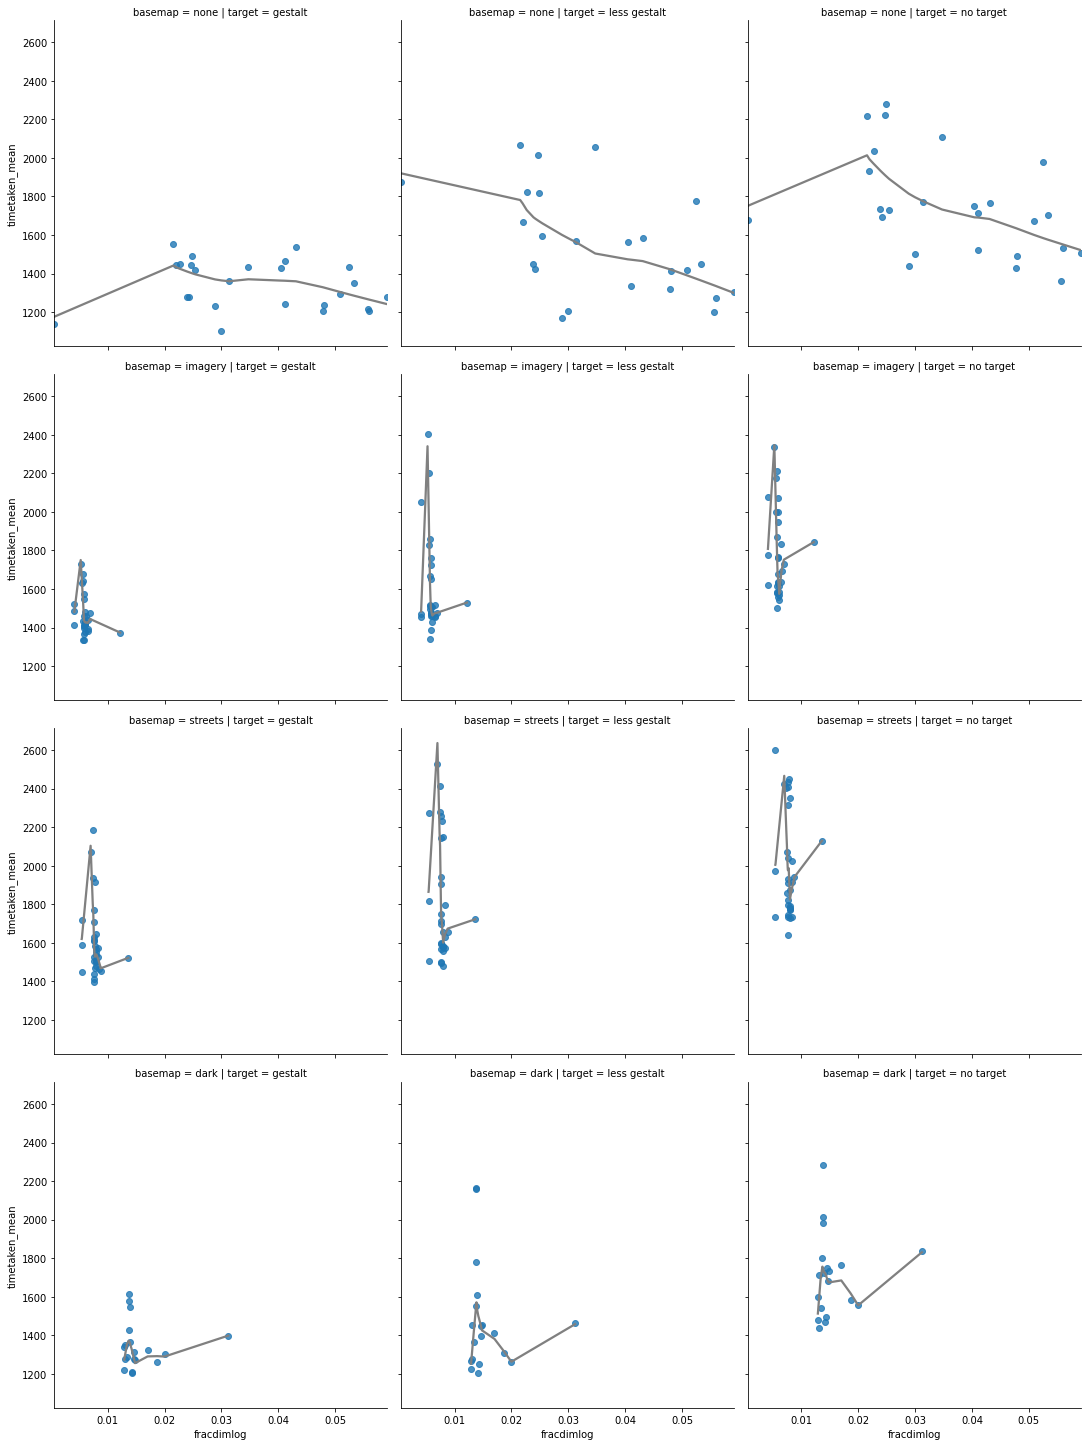

In [120]:
grouped_single = datadf.groupby(['fracdimlog', 'target', 'basemap']).agg({'timetaken': ['mean'],'correct': ['mean']})
grouped_single = grouped_single.reset_index()
grouped_single.columns = ['fracdimlog', 'target', 'basemap','timetaken_mean', 'correct_mean']
sns.lmplot(x="fracdimlog", y="timetaken_mean",col="target", row="basemap", lowess=True, data=grouped_single, line_kws={"color": 'grey'})


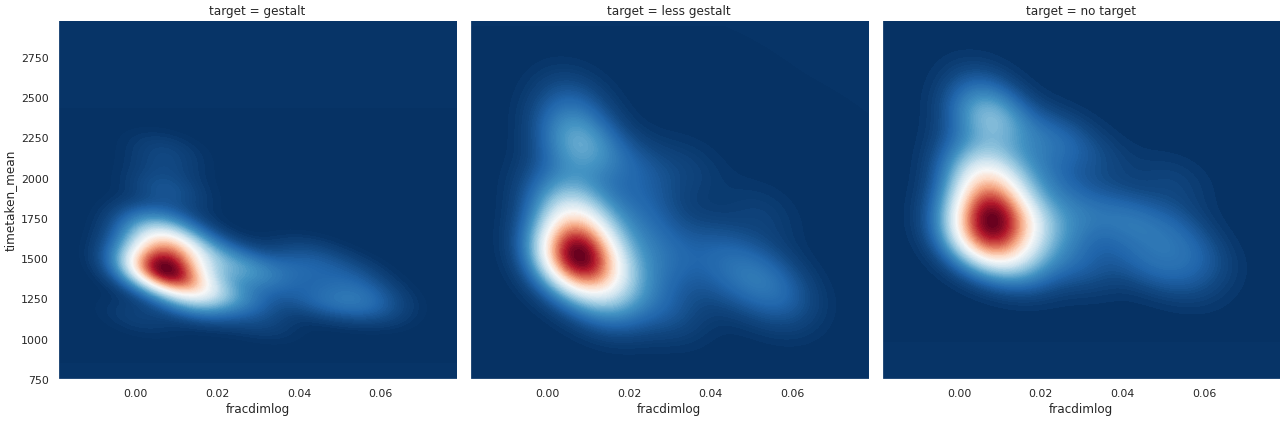

In [121]:
datadfLim = datadf # datadf.loc[datadf['shape_index_mn'] >= 5]

grouped_single = datadfLim.groupby(['fracdimlog', 'target', 'basemap']).agg({'timetaken': ['mean'],'correct': ['mean']})
grouped_single = grouped_single.reset_index()
grouped_single.columns = ['fracdimlog', 'target', 'basemap','timetaken_mean', 'correct_mean']

sns.reset_orig()
sns.set(rc={'axes.facecolor':'#073467', 'axes.grid' : False})
g = sns.FacetGrid(grouped_single, col="target", height=6)
g.map(sns.kdeplot, "fracdimlog","timetaken_mean", fill=True, thresh=0, levels=100, cmap="RdBu_r" )
sns.reset_orig()

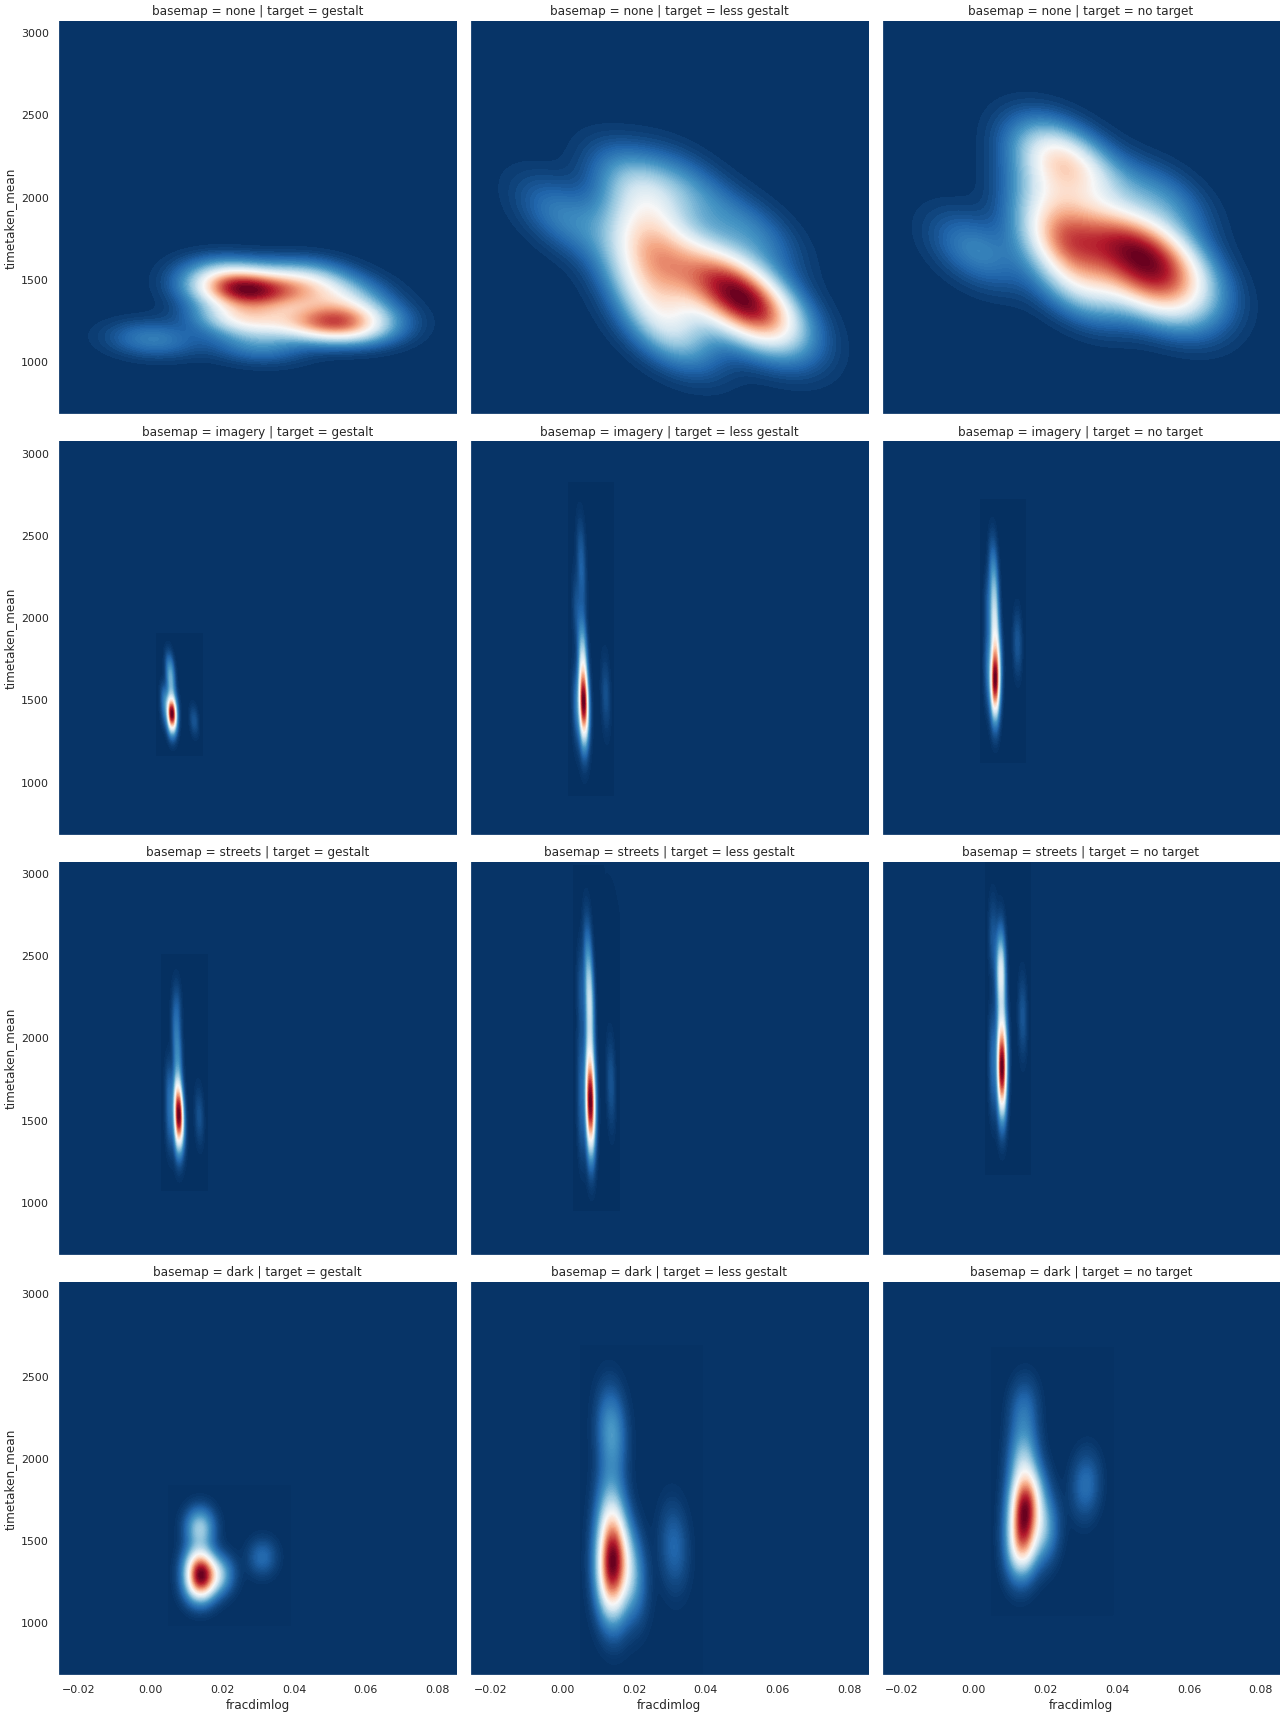

In [129]:
datadfLim = datadf # datadf.loc[datadf['shape_index_mn'] >= 5]

grouped_single = datadfLim.groupby(['fracdimlog', 'target', 'basemap']).agg({'timetaken': ['mean'],'correct': ['mean']})
grouped_single = grouped_single.reset_index()
grouped_single.columns = ['fracdimlog', 'target', 'basemap','timetaken_mean', 'correct_mean']

sns.reset_orig()
sns.set(rc={'axes.facecolor':'#073467', 'axes.grid' : False})
g = sns.FacetGrid(grouped_single, col="target", row="basemap", height=6)
g.map(sns.kdeplot, "fracdimlog","timetaken_mean", fill=True, thresh=0, levels=100, cmap="RdBu_r" )
sns.reset_orig()

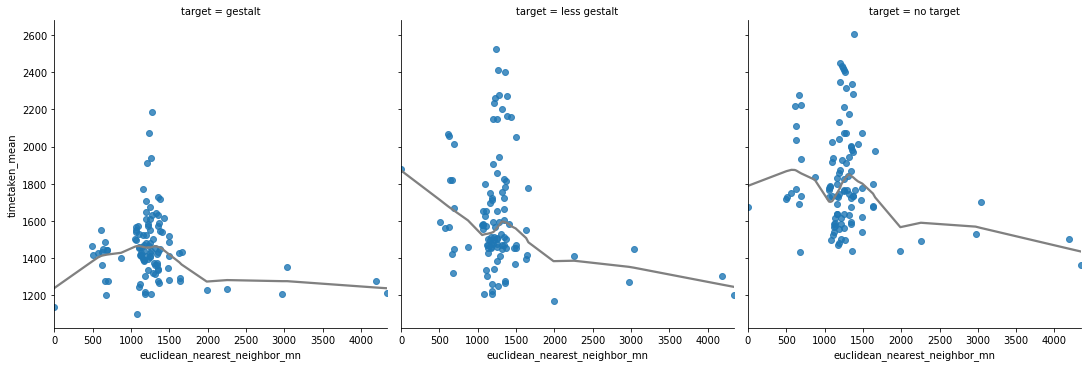

In [29]:

grouped_single = datadf.groupby(['euclidean_nearest_neighbor_mn', 'target', 'basemap']).agg({'timetaken': ['mean'],'correct': ['mean']})
grouped_single = grouped_single.reset_index()
grouped_single.columns = ['euclidean_nearest_neighbor_mn', 'target', 'basemap','timetaken_mean', 'correct_mean']
sns.lmplot(x="euclidean_nearest_neighbor_mn", y="timetaken_mean",col="target", lowess=True, data=grouped_single, line_kws={"color": 'grey'})


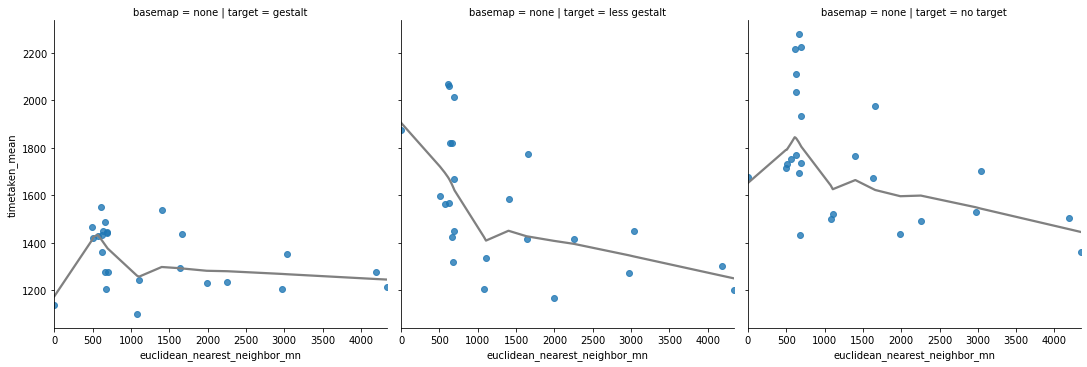

In [134]:
datadfLim = datadf
datadfLim = datadf.loc[datadf['basemap'] == 'none']

grouped_single = datadfLim.groupby(['euclidean_nearest_neighbor_mn', 'target', 'basemap']).agg({'timetaken': ['mean'],'correct': ['mean']})
grouped_single = grouped_single.reset_index()
grouped_single.columns = ['euclidean_nearest_neighbor_mn', 'target', 'basemap','timetaken_mean', 'correct_mean']
sns.lmplot(x="euclidean_nearest_neighbor_mn", y="timetaken_mean",col="target", row="basemap", lowess=True, data=grouped_single, line_kws={"color": 'grey'})


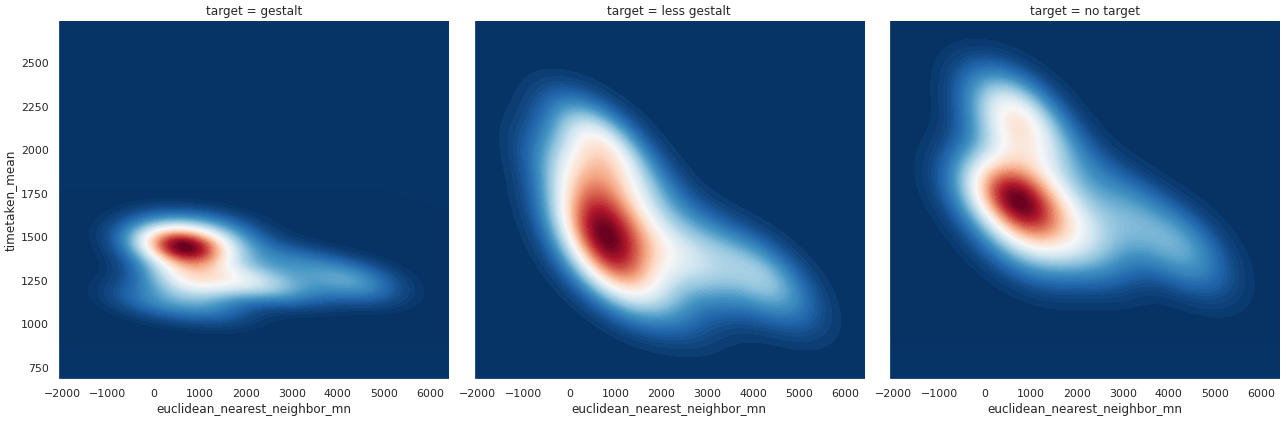

In [136]:
# datadfLim = datadf.loc[datadf['euclidean_nearest_neighbor_mn'] < 1700]
# datadfLim = datadfLim.loc[datadf['euclidean_nearest_neighbor_mn'] > 1]
datadfLim = datadf
datadfLim = datadf.loc[datadf['basemap'] == 'none']

grouped_single = datadfLim.groupby(['euclidean_nearest_neighbor_mn', 'target', 'basemap']).agg({'timetaken': ['mean'],'correct': ['mean']})
grouped_single = grouped_single.reset_index()
grouped_single.columns = ['euclidean_nearest_neighbor_mn', 'target', 'basemap','timetaken_mean', 'correct_mean']

sns.reset_orig()
sns.set(rc={'axes.facecolor':'#073467', 'axes.grid' : False})
g = sns.FacetGrid(grouped_single, col="target", height=6)
g.map(sns.kdeplot, "euclidean_nearest_neighbor_mn","timetaken_mean", fill=True, thresh=0, levels=100, cmap="RdBu_r" )
sns.reset_orig()

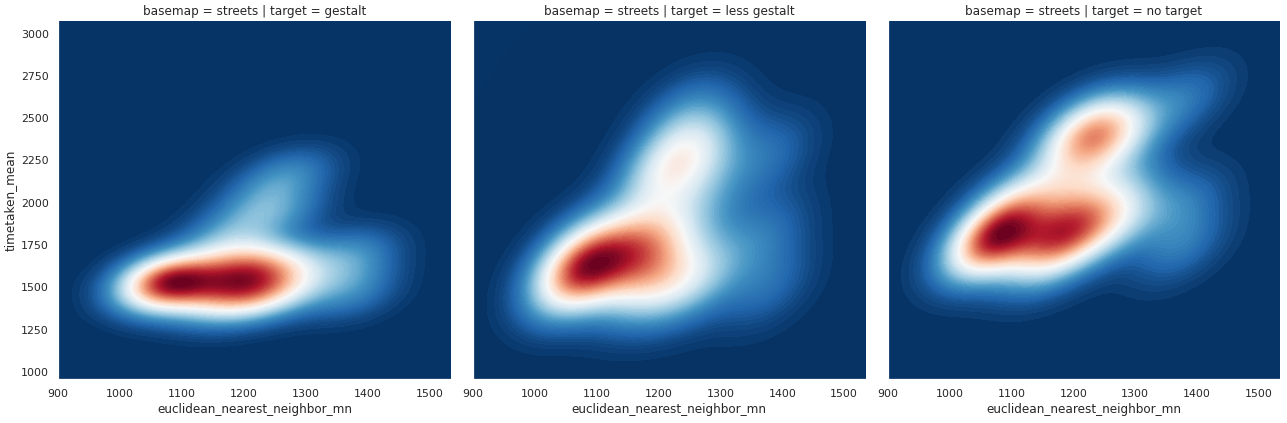

In [137]:
# datadfLim = datadf.loc[datadf['euclidean_nearest_neighbor_mn'] < 1700]
# datadfLim = datadfLim.loc[datadf['euclidean_nearest_neighbor_mn'] > 1]
datadfLim = datadf
datadfLim = datadf.loc[datadf['basemap'] == 'streets']
grouped_single = datadfLim.groupby(['euclidean_nearest_neighbor_mn', 'target', 'basemap']).agg({'timetaken': ['mean'],'correct': ['mean']})
grouped_single = grouped_single.reset_index()
grouped_single.columns = ['euclidean_nearest_neighbor_mn', 'target', 'basemap','timetaken_mean', 'correct_mean']

sns.reset_orig()
sns.set(rc={'axes.facecolor':'#073467', 'axes.grid' : False})
g = sns.FacetGrid(grouped_single, col="target", row="basemap", height=6)
g.map(sns.kdeplot, "euclidean_nearest_neighbor_mn","timetaken_mean", fill=True, thresh=0, levels=100, cmap="RdBu_r" )
sns.reset_orig()

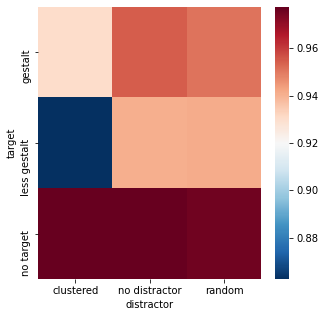

In [43]:
import matplotlib.pyplot as plt

# datadf = datadf.loc[datadf['target'] == 'gestalt']
grouped_single = datadf.groupby(['distractor','target','basemap']).agg({'timetaken': ['mean'],'correct': ['mean']})
grouped_single = grouped_single.reset_index()
grouped_single.columns = ['distractor','target', 'basemap', 'timetaken_mean', 'correct_mean']
grouped_single = grouped_single.loc[grouped_single['basemap'] == 'dark']
grouped_single = grouped_single.pivot("target", "distractor", "correct_mean")
grouped_single

plt.figure(figsize=(5,5))
ax = sns.heatmap(grouped_single, cmap="RdBu_r")
sns.reset_orig()

In [44]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score

def create_polynomial_regression_model(df, xcolumn, ycolumn, degree):
    #   "Creates a polynomial regression model for the given degree"

    #     X = pd.DataFrame(np.c_[dataframe[xcolumns], dataframe['RM']], dataframe = ['LSTAT','RM'])
    X = pd.DataFrame(df[xcolumn])
    Y = df[ycolumn]

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
    poly_features = PolynomialFeatures(degree=degree)

    # transforms the existing features to higher degree features.
    X_train_poly = poly_features.fit_transform(X_train)

    # fit the transformed features to Linear Regression
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, Y_train)

    # predicting on training data-set
    y_train_predicted = poly_model.predict(X_train_poly)

    # predicting on test data-set
    y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))

    # evaluating the model on training dataset
    rmse_train = np.sqrt(mean_squared_error(Y_train, y_train_predicted))
    r2_train = r2_score(Y_train, y_train_predicted)

    # evaluating the model on test dataset
    rmse_test = np.sqrt(mean_squared_error(Y_test, y_test_predict))
    r2_test = r2_score(Y_test, y_test_predict)

    print("The model performance for the training set")
    print("-------------------------------------------")
    print("RMSE of training set is {}".format(rmse_train))
    print("R2 score of training set is {}".format(r2_train))

    print("\n")

    print("The model performance for the test set")
    print("-------------------------------------------")
    print("RMSE of test set is {}".format(rmse_test))
    print("R2 score of test set is {}".format(r2_test))


In [45]:
datadflimit = datadf.loc[datadf['basemap'] == 'none']
datadflimit = datadflimit.loc[datadf['target'] == 'gestalt']

create_polynomial_regression_model(datadflimit, 'contagion', 'timetaken', 2)



The model performance for the training set
-------------------------------------------
RMSE of training set is 732.8583209428849
R2 score of training set is 0.018156391009176653


The model performance for the test set
-------------------------------------------
RMSE of test set is 711.2133858012081
R2 score of test set is 0.015894636635792825


Intercept: 
 2507.9898679550483
Coefficients: 
 [-4.49710492e+00 -5.02399408e-04  6.10236682e-02 -5.77700881e+02]
                            OLS Regression Results                            
Dep. Variable:              timetaken   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     210.8
Date:                Tue, 16 Mar 2021   Prob (F-statistic):          1.79e-180
Time:                        22:07:43   Log-Likelihood:            -8.8698e+05
No. Observations:              105165   AIC:                         1.774e+06
Df Residuals:                  105160   BIC:                         1.774e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975

<AxesSubplot:ylabel='timetaken'>

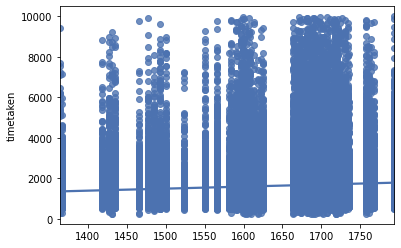

In [69]:
X = datadf[['contagion','number_of_patches','euclidean_nearest_neighbor_mn', 'shape_index_mn']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = datadf['timetaken']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# # prediction with sklearn
# New_Interest_Rate = 2.75
# New_Unemployment_Rate = 5.3
# print ('Predicted Stock Index Price: \n', regr.predict([[New_Interest_Rate ,New_Unemployment_Rate]]))

# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

sns.regplot(x=predictions, y=Y, ci=None, color="b")



In [46]:
rp.summary_cont(datadf['timetaken'].groupby(datadf['target']))


N       Mean         SD      SE  95% Conf.   Interval
target                                                                 
gestalt       26680  1418.3797   870.1573  5.3273  1407.9380  1428.8214
less gestalt  25912  1581.4471  1011.3222  6.2826  1569.1329  1593.7614
no target     52573  1783.2678  1250.8155  5.4552  1772.5755  1793.9600

In [47]:
rp.summary_cont(datadf['correct'].groupby(datadf['target']))

N    Mean      SD      SE  95% Conf.  Interval
target                                                          
gestalt       26680  0.9266  0.2607  0.0016     0.9235    0.9298
less gestalt  25912  0.8630  0.3438  0.0021     0.8589    0.8672
no target     52573  0.9753  0.1552  0.0007     0.9740    0.9766

In [48]:
rp.summary_cont(datadf['timetaken'].groupby(datadf['posthoccat']))


N       Mean         SD  \
posthoccat                                                               
clustered-large rough-blue-gestalt           823  1366.3937   870.5760   
clustered-large rough-blue-less_gestalt      805  1333.2584   605.9458   
clustered-large rough-blue-no_target        1622  1596.7127  1096.3014   
clustered-large rough-matches-gestalt        823  1655.2114  1041.6930   
clustered-large rough-matches-less_gestalt   800  1885.9875  1207.7902   
...                                          ...        ...        ...   
random-medium-mixed-less_gestalt             805  1431.5317   818.1336   
random-medium-mixed-no_target               1637  1689.6732  1253.3235   
random-medium-red-gestalt                    810  1353.0864   811.7480   
random-medium-red-less_gestalt               812  1489.2648   861.5286   
random-medium-red-no_target                 1611  1638.0540  1102.8055   

                                                 SE  95% Conf.   Interval  
posthoccat                                                                 
clustered-large rough-blue-gestalt          30.3464  1306.8282  1425.9592  
clustered-large rough-blue-less_gestalt     21.3568  1291.3368  1375.1800  
clustered-large rough-blue-no_target        27.2210  1543.3206  1650.1048  
clustered-large rough-matches-gestalt       36.3111  1583.9380  1726.4849  
clustered-large rough-matches-less_gestalt  42.7018  1802.1665  1969.8085  
...                                             ...        ...        ...  
random-medium-mixed-less_gestalt            28.8354  1374.9301  1488.1333  
random-medium-mixed-no_target               30.9770  1628.9145  1750.4319  
random-medium-red-gestalt                   28.5219  1297.1007  1409.0721  
random-medium-red-less_gestalt              30.2337  1429.9192  1548.6104  
random-medium-red-no_target                 27.4759  1584.1618  1691.9462  

[119 rows x 6 columns]

In [49]:
rp.summary_cont(datadf['correct'].groupby(datadf['posthoccat']))

N    Mean      SD      SE  \
posthoccat                                                                 
clustered-large rough-blue-gestalt           823  0.9538  0.2100  0.0073   
clustered-large rough-blue-less_gestalt      805  0.9590  0.1984  0.0070   
clustered-large rough-blue-no_target        1622  0.9821  0.1326  0.0033   
clustered-large rough-matches-gestalt        823  0.8348  0.3716  0.0130   
clustered-large rough-matches-less_gestalt   800  0.6425  0.4796  0.0170   
...                                          ...     ...     ...     ...   
random-medium-mixed-less_gestalt             805  0.9478  0.2225  0.0078   
random-medium-mixed-no_target               1637  0.9859  0.1177  0.0029   
random-medium-red-gestalt                    810  0.9543  0.2089  0.0073   
random-medium-red-less_gestalt               812  0.9224  0.2677  0.0094   
random-medium-red-no_target                 1611  0.9814  0.1352  0.0034   

                                            95% Conf.  Interval  
posthoccat                                                       
clustered-large rough-blue-gestalt             0.9395    0.9682  
clustered-large rough-blue-less_gestalt        0.9453    0.9727  
clustered-large rough-blue-no_target           0.9757    0.9886  
clustered-large rough-matches-gestalt          0.8093    0.8602  
clustered-large rough-matches-less_gestalt     0.6092    0.6758  
...                                               ...       ...  
random-medium-mixed-less_gestalt               0.9324    0.9632  
random-medium-mixed-no_target                  0.9802    0.9917  
random-medium-red-gestalt                      0.9399    0.9687  
random-medium-red-less_gestalt                 0.9040    0.9409  
random-medium-red-no_target                    0.9748    0.9880  

[119 rows x 6 columns]

In [50]:
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
import scikit_posthocs as sp


model = ols('timetaken ~ C(posthoccat2) + C(target) +  C(posthoccat2):C(target)', data=datadf).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print('ANOVA Table')
print(anova_table)
print('')



ANOVA Table
                                sum_sq        df            F        PR(>F)
C(posthoccat2)            4.926793e+09      40.0   104.607669  0.000000e+00
C(target)                 2.469626e+09       2.0  1048.721840  0.000000e+00
C(posthoccat2):C(target)  8.043156e+08      80.0     8.538777  1.217267e-92
Residual                  1.236859e+11  105046.0          NaN           NaN



/Users/daveism/.pyenv/versions/3.8.6/lib/python3.8/site-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 40, but rank is 36
  warnings.warn('covariance of constraints does not have full '
/Users/daveism/.pyenv/versions/3.8.6/lib/python3.8/site-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 80, but rank is 77
  warnings.warn('covariance of constraints does not have full '


In [51]:
tkhsd_results = pairwise_tukeyhsd(endog=datadf['timetaken'], groups=datadf['posthoccat'], alpha=0.05)
tkdf = pd.DataFrame(data=tkhsd_results._results_table.data[1:], columns=tkhsd_results._results_table.data[0])
tkdf.to_csv('data/tukey_adhoc.csv')
tkdf


group1  \
0     clustered-large rough-blue-gestalt   
1     clustered-large rough-blue-gestalt   
2     clustered-large rough-blue-gestalt   
3     clustered-large rough-blue-gestalt   
4     clustered-large rough-blue-gestalt   
...                                  ...   
7016       random-medium-mixed-no_target   
7017       random-medium-mixed-no_target   
7018           random-medium-red-gestalt   
7019           random-medium-red-gestalt   
7020      random-medium-red-less_gestalt   

                                          group2  meandiff   p-adj     lower  \
0        clustered-large rough-blue-less_gestalt  -33.1353  0.9000 -268.6669   
1           clustered-large rough-blue-no_target  230.3190  0.0040   26.9738   
2          clustered-large rough-matches-gestalt  288.8177  0.0010   54.5918   
3     clustered-large rough-matches-less_gestalt  519.5938  0.0010  283.6904   
4        clustered-large rough-matches-no_target  777.8451  0.0010  575.0815   
...                                          ...       ...     ...       ...   
7016              random-medium-red-less_gestalt -200.4084  0.0676 -404.3529   
7017                 random-medium-red-no_target  -51.6192  0.9000 -218.3653   
7018              random-medium-red-less_gestalt  136.1784  0.9000  -99.7743   
7019                 random-medium-red-no_target  284.9676  0.0010   80.3104   
7020                 random-medium-red-no_target  148.7892  0.8435  -55.7002   

         upper  reject  
0     202.3963   False  
1     433.6643    True  
2     523.0437    True  
3     755.4972    True  
4     980.6087    True  
...        ...     ...  
7016    3.5361   False  
7017  115.1270   False  
7018  372.1310   False  
7019  489.6248    True  
7020  353.2786   False  

[7021 rows x 7 columns]

In [52]:
posthoc = sp.posthoc_conover(datadf, val_col='timetaken', group_col='posthoccat', p_adjust = 'holm')
posthoc.to_csv('data/kruskal_adhoc.csv')
posthoc



clustered-large rough-blue-gestalt  \
clustered-large rough-blue-gestalt                                1.000000e+00   
clustered-large rough-blue-less_gestalt                           1.000000e+00   
clustered-large rough-blue-no_target                              4.381122e-05   
clustered-large rough-matches-gestalt                             2.279373e-13   
clustered-large rough-matches-less_gestalt                        2.632325e-32   
...                                                                        ...   
random-medium-mixed-less_gestalt                                  1.000000e+00   
random-medium-mixed-no_target                                     2.833842e-08   
random-medium-red-gestalt                                         1.000000e+00   
random-medium-red-less_gestalt                                    3.912120e-02   
random-medium-red-no_target                                       2.817416e-07   

                                            clustered-large rough-blue-less_gestalt  \
clustered-large rough-blue-gestalt                                     1.000000e+00   
clustered-large rough-blue-less_gestalt                                1.000000e+00   
clustered-large rough-blue-no_target                                   5.238760e-02   
clustered-large rough-matches-gestalt                                  3.456205e-09   
clustered-large rough-matches-less_gestalt                             7.627166e-26   
...                                                                             ...   
random-medium-mixed-less_gestalt                                       1.000000e+00   
random-medium-mixed-no_target                                          1.838212e-04   
random-medium-red-gestalt                                              1.000000e+00   
random-medium-red-less_gestalt                                         1.000000e+00   
random-medium-red-no_target                                            1.090797e-03   

                                            clustered-large rough-blue-no_target  \
clustered-large rough-blue-gestalt                                  4.381122e-05   
clustered-large rough-blue-less_gestalt                             5.238760e-02   
clustered-large rough-blue-no_target                                1.000000e+00   
clustered-large rough-matches-gestalt                               2.323871e-01   
clustered-large rough-matches-less_gestalt                          1.117285e-14   
...                                                                          ...   
random-medium-mixed-less_gestalt                                    1.000000e+00   
random-medium-mixed-no_target                                       1.000000e+00   
random-medium-red-gestalt                                           6.737782e-05   
random-medium-red-less_gestalt                                      1.000000e+00   
random-medium-red-no_target                                         1.000000e+00   

                                            clustered-large rough-matches-gestalt  \
clustered-large rough-blue-gestalt                                   2.279373e-13   
clustered-large rough-blue-less_gestalt                              3.456205e-09   
clustered-large rough-blue-no_target                                 2.323871e-01   
clustered-large rough-matches-gestalt                                1.000000e+00   
clustered-large rough-matches-less_gestalt                           8.577935e-02   
...                                                                           ...   
random-medium-mixed-less_gestalt                                     4.654535e-05   
random-medium-mixed-no_target                                        1.000000e+00   
random-medium-red-gestalt                                            4.181542e-13   
random-medium-red-less_gestalt                                       2.049077e-01   
random-medium-red-no_target                                          1

In [53]:
tkhsd_results = pairwise_tukeyhsd(endog=datadf['timetaken'], groups=datadf['target'], alpha=0.05)
tkdf = pd.DataFrame(data=tkhsd_results._results_table.data[1:], columns=tkhsd_results._results_table.data[0])
# tkdf.to_csv('data/tukey_adhoc_target.csv')
tkdf


group1        group2  meandiff  p-adj     lower     upper  reject
0       gestalt  less gestalt  163.0674  0.001  140.4308  185.7040    True
1       gestalt     no target  364.8881  0.001  345.3794  384.3968    True
2  less gestalt     no target  201.8206  0.001  182.1211  221.5202    True

In [54]:
tkhsd_results = pairwise_tukeyhsd(endog=datadf['timetaken'], groups=datadf['basemap'], alpha=0.05)
tkdf = pd.DataFrame(data=tkhsd_results._results_table.data[1:], columns=tkhsd_results._results_table.data[0])
# tkdf.to_csv('data/tukey_adhoc_target.csv')
tkdf


group1   group2  meandiff  p-adj     lower     upper  reject
0     dark  imagery  123.8426  0.001   98.4011  149.2841    True
1     dark     none   22.8542  0.076   -1.5477   47.2561   False
2     dark  streets  328.0910  0.001  302.6121  353.5700    True
3  imagery     none -100.9885  0.001 -125.4120  -76.5649    True
4  imagery  streets  204.2484  0.001  178.7487  229.7481    True
5     none  streets  305.2369  0.001  280.7743  329.6994    True

In [55]:
tkhsd_results = pairwise_tukeyhsd(endog=datadf['timetaken'], groups=datadf['distractor'], alpha=0.05)
tkdf = pd.DataFrame(data=tkhsd_results._results_table.data[1:], columns=tkhsd_results._results_table.data[0])
# tkdf.to_csv('data/tukey_adhoc_target.csv')
tkdf


group1         group2  meandiff   p-adj     lower    upper  reject
0      clustered  no distractor -197.6493  0.0010 -251.8806 -143.418    True
1      clustered         random -130.9739  0.0010 -147.6819 -114.266    True
2  no distractor         random   66.6753  0.0121   11.8947  121.456    True

In [56]:
tkhsd_results = pairwise_tukeyhsd(endog=datadf['timetaken'], groups=datadf['posthoccat3'], alpha=0.05)
tkdf = pd.DataFrame(data=tkhsd_results._results_table.data[1:], columns=tkhsd_results._results_table.data[0])
# tkdf.to_csv('data/tukey_adhoc_target.csv')
tkdf


group1                          group2  meandiff  \
0     clustered-blue-gestalt     clustered-blue-less_gestalt   45.2642   
1     clustered-blue-gestalt        clustered-blue-no_target  234.8541   
2     clustered-blue-gestalt       clustered-matches-gestalt  294.7705   
3     clustered-blue-gestalt  clustered-matches-less_gestalt  547.2940   
4     clustered-blue-gestalt     clustered-matches-no_target  659.1388   
..                       ...                             ...       ...   
346   random-mixed-no_target         random-red-less_gestalt -252.8746   
347   random-mixed-no_target            random-red-no_target  -84.7715   
348       random-red-gestalt         random-red-less_gestalt  103.9065   
349       random-red-gestalt            random-red-no_target  272.0096   
350  random-red-less_gestalt            random-red-no_target  168.1031   

      p-adj     lower     upper  reject  
0    0.9000  -36.7930  127.3214   False  
1    0.0010  164.0919  305.6164    True  
2    0.0010  212.1840  377.3570    True  
3    0.0010  464.1588  630.4293    True  
4    0.0010  587.8251  730.4524    True  
..      ...       ...       ...     ...  
346  0.0010 -352.8697 -152.8796    True  
347  0.0264 -165.5524   -3.9907    True  
348  0.1363  -10.0333  217.8462   False  
349  0.0010  174.4965  369.5226    True  
350  0.0010   67.9945  268.2117    True  

[351 rows x 7 columns]

In [57]:
pvRT = pd.pivot_table(datadf, values=['timetaken'], index=['uuid'], columns=['category','target'], aggfunc=np.mean)
pvRT.describe()

timetaken                            \
category clustered-blue-large rough-dark                             
target                           gestalt less gestalt    no target   
count                         205.000000   200.000000   240.000000   
mean                         1231.307317  1222.585000  1446.559028   
std                           565.015485   473.742708   746.391584   
min                           551.000000   598.000000   406.000000   
25%                           882.000000   902.250000   987.750000   
50%                          1137.000000  1104.000000  1228.500000   
75%                          1397.000000  1415.750000  1660.750000   
max                          4540.000000  3053.000000  5004.000000   

                                                                       \
category clustered-blue-large rough-imagery                             
target                              gestalt less gestalt    no target   
count                            203.000000   215.000000   243.000000   
mean                            1480.541872  1384.976744  1642.224280   
std                             1005.671128   676.944271   986.042263   
min                              564.000000   628.000000   486.500000   
25%                              949.500000   963.000000  1009.000000   
50%                             1230.000000  1225.000000  1400.000000   
75%                             1525.500000  1561.000000  1888.000000   
max                             8841.000000  6741.000000  7638.000000   

                                                                    \
category clustered-blue-large rough-none                             
target                           gestalt less gestalt    no target   
count                         207.000000   197.000000   241.000000   
mean                         1272.458937  1247.228426  1447.813278   
std                           877.725667   561.268183   849.463353   
min                           558.000000   586.000000   257.000000   
25%                           858.000000   885.000000   939.000000   
50%                          1087.000000  1163.000000  1209.000000   
75%                          1346.000000  1437.000000  1725.500000   
max                          8845.000000  5660.000000  7404.000000   

                                             ...                         \
category clustered-blue-large rough-streets  ... random-red-medium-dark   
target                              gestalt  ...              no target   
count                            208.000000  ...             241.000000   
mean                            1481.610577  ...            1670.470954   
std                              942.543269  ...            1156.577800   
min                              627.000000  ...             593.500000   
25%                              952.000000  ...            1019.500000   
50%                             1232.500000  ...            1285.500000   
75%                             1689.250000  ...            1814.500000   
max                             8577.000000  ...            8302.000000   

                                                              \
category random-red-medium-imagery                             
target                     gestalt less gestalt    no target   
count                   198.000000   204.000000   241.000000   
mean                   1392.984848  1458.348039  1656.406639   
std                     740.612132   888.674915   939.787538   
min                     601.000000   645.000000   580.000000   
25%                     932.500000   942.250000  1017.500000   
50%                    1186.000000  1269.500000  1399.000000   
75%                    1555.500000  1670.750000  1988.500000   
max                    5763.000000  9834.000000  5730.000000   

                                                           \
category random-red-medium-none                             
target                  gestalt 

In [58]:
pvCorrect = pd.pivot_table(datadf, values=['correct'], index=['uuid'], columns=['category','target'], aggfunc=np.mean)
pvCorrect.describe()

correct                           \
category clustered-blue-large rough-dark                            
target                           gestalt less gestalt   no target   
count                         205.000000   200.000000  240.000000   
mean                            0.970732     0.955000    0.983333   
std                             0.168970     0.207824    0.100902   
min                             0.000000     0.000000    0.000000   
25%                             1.000000     1.000000    1.000000   
50%                             1.000000     1.000000    1.000000   
75%                             1.000000     1.000000    1.000000   
max                             1.000000     1.000000    1.000000   

                                                                      \
category clustered-blue-large rough-imagery                            
target                              gestalt less gestalt   no target   
count                            203.000000   215.000000  243.000000   
mean                               0.950739     0.967442    0.989712   
std                                0.216948     0.177891    0.084410   
min                                0.000000     0.000000    0.000000   
25%                                1.000000     1.000000    1.000000   
50%                                1.000000     1.000000    1.000000   
75%                                1.000000     1.000000    1.000000   
max                                1.000000     1.000000    1.000000   

                                                                   \
category clustered-blue-large rough-none                            
target                           gestalt less gestalt   no target   
count                         207.000000   197.000000  241.000000   
mean                            0.932367     0.974619    0.977178   
std                             0.251724     0.157679    0.146123   
min                             0.000000     0.000000    0.000000   
25%                             1.000000     1.000000    1.000000   
50%                             1.000000     1.000000    1.000000   
75%                             1.000000     1.000000    1.000000   
max                             1.000000     1.000000    1.000000   

                                             ...                         \
category clustered-blue-large rough-streets  ... random-red-medium-dark   
target                              gestalt  ...              no target   
count                            208.000000  ...             241.000000   
mean                               0.961538  ...               0.983402   
std                                0.192772  ...               0.100698   
min                                0.000000  ...               0.000000   
25%                                1.000000  ...               1.000000   
50%                                1.000000  ...               1.000000   
75%                                1.000000  ...               1.000000   
max                                1.000000  ...               1.000000   

                                                             \
category random-red-medium-imagery                            
target                     gestalt less gestalt   no target   
count                   198.000000   204.000000  241.000000   
mean                      0.964646     0.970588    0.979253   
std                       0.185140     0.169373    0.127414   
min                       0.000000     0.000000    0.000000   
25%                       1.000000     1.000000    1.000000   
50%                       1.000000     1.000000    1.000000   
75%                       1.000000     1.000000    1.000000   
max                       1.000000     1.000000    1.000000   

                                                          \
category random-red-medium-none                            
target                  gestalt less gestalt   no target   
count               

In [59]:
pd.pivot_table(datadf, values=['timetaken'], index=['uuid'], columns=['category','target'], aggfunc=np.mean).plot

In [25]:
f = np.polyfit(datadf['timetaken'], datadf['contagion'], deg=1)
f[0]


-0.0006463144561143554